# This code is to compare the data collected from 2 different hardwares, 3080 and 4090

In [45]:
import os 
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

In [46]:
cur_dir = os.getcwd()
print(cur_dir)

parent_dir = os.path.dirname(cur_dir)
print(parent_dir)

file3080_dir = os.path.join(parent_dir, '3080', 'CNNModelsData')
file4090_dir = os.path.join(parent_dir, '4090', 'CNNModelsData')
# filea5000_dir = os.path.join(parent_dir, 'a5000')

print(file3080_dir)
print(file4090_dir)
# print(filea5000_dir)

/Users/dtjgp/Projects/GreenAI/Comparision_3080_4090
/Users/dtjgp/Projects/GreenAI
/Users/dtjgp/Projects/GreenAI/3080/CNNModelsData
/Users/dtjgp/Projects/GreenAI/4090/CNNModelsData


## Comparison of 3080 and 4090

In [47]:
def get_epoch_energy(npyfile):
    energy_consumption = np.zeros((npyfile.shape[0],1))
    for epoch in range(npyfile.shape[0]):
        energy_consumption[epoch] = 0 
        for batch in range(npyfile.shape[1]):
            energy_consumption[epoch] += (npyfile[epoch][batch][1] - npyfile[epoch][batch][0]) * npyfile[epoch][batch][2]
    return energy_consumption

In [48]:
# plot the energy data for the 3080 and 4090 models select the alexnet model, resnet18 model resnet34 model, googlenet_origin model and vgg11 model and mobilenetv1 model
dataset = ['fashion_mnist', 'cifar100']
model = ['alexnet', 'resnet18', 'resnet34', 'googlenet_origin', 'vgg11', 'vit']
sample_folder = 'E5_B128_R0_SR2'

# load each step energy consumption to sum up to get each epoch energy consumption in Training process
def readfiles(hardware, model, dataset, sample_folder, file_dir):
    file_dir = os.path.join(hardware, model, dataset, sample_folder)
    # read the energy consumption npy files from the directory
    to_device_energy = np.load(os.path.join(file_dir, 'to_device_energy.npy'), allow_pickle=True)
    forward_energy = np.load(os.path.join(file_dir, 'forward_energy.npy'), allow_pickle=True)
    loss_energy = np.load(os.path.join(file_dir, 'loss_energy.npy'), allow_pickle=True)
    backward_energy = np.load(os.path.join(file_dir, 'backward_energy.npy'), allow_pickle=True)
    optimize_energy = np.load(os.path.join(file_dir, 'optimize_energy.npy'), allow_pickle=True)
    # sum up the energy consumption for each step
    to_device_total_energy = get_epoch_energy(to_device_energy)
    forward_total_energy = get_epoch_energy(forward_energy)
    loss_total_energy = get_epoch_energy(loss_energy)
    backward_total_energy = get_epoch_energy(backward_energy)
    optimize_total_energy = get_epoch_energy(optimize_energy)
    # sum up the energy consumption for each epoch
    total_energy = to_device_total_energy + forward_total_energy + loss_total_energy + backward_total_energy + optimize_total_energy
    return total_energy


# 3080 alexnet
alexnet3080_f = pd.read_csv(os.path.join(file3080_dir, model[0], dataset[0], sample_folder, 'labeled_energy_data.csv'))
alexnet3080_f_train = readfiles(file3080_dir, model[0], dataset[0], sample_folder, file3080_dir)
alexnet3080_c = pd.read_csv(os.path.join(file3080_dir, model[0], dataset[1], sample_folder, 'labeled_energy_data.csv'))
alexnet3080_c_train = readfiles(file3080_dir, model[0], dataset[1], sample_folder, file3080_dir)

# 3080 resnet18
resnet183080_f = pd.read_csv(os.path.join(file3080_dir, model[1], dataset[0], sample_folder, 'labeled_energy_data.csv'))
resnet183080_f_train = readfiles(file3080_dir, model[1], dataset[0], sample_folder, file3080_dir)
resnet183080_c = pd.read_csv(os.path.join(file3080_dir, model[1], dataset[1], sample_folder, 'labeled_energy_data.csv'))
resnet183080_c_train = readfiles(file3080_dir, model[1], dataset[1], sample_folder, file3080_dir)

# 4090 alexnet
alexnet4090_f = pd.read_csv(os.path.join(file4090_dir, model[0], dataset[0], sample_folder, 'labeled_energy_data.csv'))
alexnet4090_f_train = readfiles(file4090_dir, model[0], dataset[0], sample_folder, file4090_dir)
alexnet4090_c = pd.read_csv(os.path.join(file4090_dir, model[0], dataset[1], sample_folder, 'labeled_energy_data.csv'))
alexnet4090_c_train = readfiles(file4090_dir, model[0], dataset[1], sample_folder, file4090_dir)

# 4090 resnet18
resnet184090_f = pd.read_csv(os.path.join(file4090_dir, model[1], dataset[0], sample_folder, 'labeled_energy_data.csv'))
resnet184090_f_train = readfiles(file4090_dir, model[1], dataset[0], sample_folder, file4090_dir)
resnet184090_c = pd.read_csv(os.path.join(file4090_dir, model[1], dataset[1], sample_folder, 'labeled_energy_data.csv'))
resnet184090_c_train = readfiles(file4090_dir, model[1], dataset[1], sample_folder, file4090_dir)

# 3080 resnet34
resnet343080_f = pd.read_csv(os.path.join(file3080_dir, model[2], dataset[0], sample_folder, 'labeled_energy_data.csv'))
resnet343080_f_train = readfiles(file3080_dir, model[2], dataset[0], sample_folder, file3080_dir)
resnet343080_c = pd.read_csv(os.path.join(file3080_dir, model[2], dataset[1], sample_folder, 'labeled_energy_data.csv'))
resnet343080_c_train = readfiles(file3080_dir, model[2], dataset[1], sample_folder, file3080_dir)

# 4090 resnet34
resnet344090_f = pd.read_csv(os.path.join(file4090_dir, model[2], dataset[0], sample_folder, 'labeled_energy_data.csv'))
resnet344090_f_train = readfiles(file4090_dir, model[2], dataset[0], sample_folder, file4090_dir)
resnet344090_c = pd.read_csv(os.path.join(file4090_dir, model[2], dataset[1], sample_folder, 'labeled_energy_data.csv'))
resnet344090_c_train = readfiles(file4090_dir, model[2], dataset[1], sample_folder, file4090_dir)

# 3080 googlenet_origin
googlenet_origin3080_f = pd.read_csv(os.path.join(file3080_dir, model[3], dataset[0], sample_folder, 'labeled_energy_data.csv'))
googlenet_origin3080_f_train = readfiles(file3080_dir, model[3], dataset[0], sample_folder, file3080_dir)
googlenet_origin3080_c = pd.read_csv(os.path.join(file3080_dir, model[3], dataset[1], sample_folder, 'labeled_energy_data.csv'))
googlenet_origin3080_c_train = readfiles(file3080_dir, model[3], dataset[1], sample_folder, file3080_dir)

# 4090 googlenet_origin
googlenet_origin4090_f = pd.read_csv(os.path.join(file4090_dir, model[3], dataset[0], sample_folder, 'labeled_energy_data.csv'))
googlenet_origin4090_f_train = readfiles(file4090_dir, model[3], dataset[0], sample_folder, file4090_dir)
googlenet_origin4090_c = pd.read_csv(os.path.join(file4090_dir, model[3], dataset[1], sample_folder, 'labeled_energy_data.csv'))
googlenet_origin4090_c_train = readfiles(file4090_dir, model[3], dataset[1], sample_folder, file4090_dir)

# 3080 vgg11
vgg113080_f = pd.read_csv(os.path.join(file3080_dir, model[4], dataset[0], sample_folder, 'labeled_energy_data.csv'))
vgg113080_f_train = readfiles(file3080_dir, model[4], dataset[0], sample_folder, file3080_dir)
vgg113080_c = pd.read_csv(os.path.join(file3080_dir, model[4], dataset[1], sample_folder, 'labeled_energy_data.csv'))
vgg113080_c_train = readfiles(file3080_dir, model[4], dataset[1], sample_folder, file3080_dir)

# 4090 vgg11
vgg114090_f = pd.read_csv(os.path.join(file4090_dir, model[4], dataset[0], sample_folder, 'labeled_energy_data.csv'))
vgg114090_f_train = readfiles(file4090_dir, model[4], dataset[0], sample_folder, file4090_dir)
vgg114090_c = pd.read_csv(os.path.join(file4090_dir, model[4], dataset[1], sample_folder, 'labeled_energy_data.csv'))
vgg114090_c_train = readfiles(file4090_dir, model[4], dataset[1], sample_folder, file4090_dir)

# 3080 vit
vit3080_f = pd.read_csv(os.path.join(file3080_dir, model[5], dataset[0], sample_folder, 'labeled_energy_data.csv'))
vit3080_f_train = readfiles(file3080_dir, model[5], dataset[0], sample_folder, file3080_dir)
vit3080_c = pd.read_csv(os.path.join(file3080_dir, model[5], dataset[1], sample_folder, 'labeled_energy_data.csv'))
vit3080_c_train = readfiles(file3080_dir, model[5], dataset[1], sample_folder, file3080_dir)

# 4090 vit
vit4090_f = pd.read_csv(os.path.join(file4090_dir, model[5], dataset[0], sample_folder, 'labeled_energy_data.csv'))
vit4090_f_train = readfiles(file4090_dir, model[5], dataset[0], sample_folder, file4090_dir)
vit4090_c = pd.read_csv(os.path.join(file4090_dir, model[5], dataset[1], sample_folder, 'labeled_energy_data.csv'))
vit4090_c_train = readfiles(file4090_dir, model[5], dataset[1], sample_folder, file4090_dir)

In [49]:
# Create a color map and marker map for the steps
step_colors = {
    'idle': 'gray',
    'to_device': 'blue',
    'forward': 'green',
    'loss': 'red',
    'backward': 'purple',
    'optimize': 'orange'
}
step_markers = {
    'idle': 'o',
    'to_device': 's',
    'forward': '^',
    'loss': 'D',
    'backward': 'x',
    'optimize': 'P'
}

In [50]:
# def plot_energy_data(labeled_energy_data, step_colors, step_markers, model_name, plot_folder):
#     # Plot the data with a larger figure size
#     fig, ax = plt.subplots(figsize=(12, 6))

#     # Plot each step with a different marker
#     for step in step_colors.keys():
#         step_data = labeled_energy_data[labeled_energy_data['step'] == step]
#         if step != 'idle':
#             ax.scatter(step_data['timestamp'], step_data['power_in_watts'], color=step_colors[step], label=step, s=5, marker=step_markers[step])

#     ax.set_xlabel(f'Timestamp Across All Samples in {model_name}')
#     ax.set_ylabel('Power in Watts')
#     ax.set_title(f'Energy Data of Each Sample in {model_name}')
#     ax.legend()
#     plt.show()
#     # save the figure, to a specific directory
#     plt.savefig(os.path.join(plot_folder, f'energy_data of {model_name}.png'))

In [51]:
# change the time value in the timestamp to start at 0 for all datasets
def change_timestamp_to_index(labeled_energy_data):
    # Subtract the minimum timestamp across all datasets to align them
    min_timestamp = labeled_energy_data['timestamp'].min()
    labeled_energy_data['timestamp'] = labeled_energy_data['timestamp'] - min_timestamp
    return labeled_energy_data

# remove the idle step in the energy data
def remove_idle_step(labeled_energy_data):
    labeled_energy_data = labeled_energy_data[labeled_energy_data['step'] != 'idle']
    return labeled_energy_data

# clean and process the energy data for each model
def cleandata(labeled_energy_data, model_name):
    # first normalize timestamps to start at 0
    labeled_energy_data = change_timestamp_to_index(labeled_energy_data)

    # remove the idle step
    labeled_energy_data = remove_idle_step(labeled_energy_data)

    # reset the index of the data
    labeled_energy_data = labeled_energy_data.reset_index(drop=True)

    return labeled_energy_data
    # # Plot the data with a larger figure size
    # fig, ax = plt.subplots(figsize=(12, 6))
    
    # # Plot each step in different color
    # for step in step_colors.keys():
    #     step_data = labeled_energy_data[labeled_energy_data['step'] == step]
    #     plt.scatter(step_data['timestamp'], step_data['power_in_watts'], alpha=0.7)

    # ax.set_xlabel(f'Time Step in {model_name}')
    # ax.set_ylabel('Power in Watts')
    # ax.set_title(f'Energy Data of Each Sample in {model_name}')
    # ax.legend()
    # plt.show()


# clean the data for each model
alexnet3080_f = cleandata(alexnet3080_f, 'alexnet3080_f')
alexnet3080_c = cleandata(alexnet3080_c, 'alexnet3080_c')
resnet183080_f = cleandata(resnet183080_f, 'resnet183080_f')
resnet183080_c = cleandata(resnet183080_c, 'resnet183080_c')
alexnet4090_f = cleandata(alexnet4090_f, 'alexnet4090_f')
alexnet4090_c = cleandata(alexnet4090_c, 'alexnet4090_c')
resnet184090_f = cleandata(resnet184090_f, 'resnet184090_f')
resnet184090_c = cleandata(resnet184090_c, 'resnet184090_c')
resnet343080_f = cleandata(resnet343080_f, 'resnet343080_f')
resnet343080_c = cleandata(resnet343080_c, 'resnet343080_c')
resnet344090_f = cleandata(resnet344090_f, 'resnet344090_f')
resnet344090_c = cleandata(resnet344090_c, 'resnet344090_c')
googlenet_origin3080_f = cleandata(googlenet_origin3080_f, 'googlenet_origin3080_f')
googlenet_origin3080_c = cleandata(googlenet_origin3080_c, 'googlenet_origin3080_c')
googlenet_origin4090_f = cleandata(googlenet_origin4090_f, 'googlenet_origin4090_f')
googlenet_origin4090_c = cleandata(googlenet_origin4090_c, 'googlenet_origin4090_c')
vgg113080_f = cleandata(vgg113080_f, 'vgg113080_f')
vgg113080_c = cleandata(vgg113080_c, 'vgg113080_c')
vgg114090_f = cleandata(vgg114090_f, 'vgg114090_f')
vgg114090_c = cleandata(vgg114090_c, 'vgg114090_c')
vit3080_f = cleandata(vit3080_f, 'vit3080_f')
vit3080_c = cleandata(vit3080_c, 'vit3080_c')
vit4090_f = cleandata(vit4090_f, 'vit4090_f')
vit4090_c = cleandata(vit4090_c, 'vit4090_c')



In [52]:
# Create a figure
# plt.figure(figsize=(15,12))
# Set the style for a professional look
plt.style.use('seaborn-v0_8-paper')
# Set all fonts to serif
plt.rcParams['font.family'] = 'serif'
plt.rcParams['font.serif'] = ['Times New Roman']  # Specify Times New Roman as the serif font
plt.rcParams['font.size'] = 25
plt.rcParams['axes.labelsize'] = 25 
plt.rcParams['axes.titlesize'] = 30
plt.rcParams['legend.fontsize'] = 18
plt.rcParams['xtick.labelsize'] = 25
plt.rcParams['ytick.labelsize'] = 25

# Professional color palette
colors = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', 
         '#9467bd', '#8c564b', '#e377c2', '#7f7f7f']

In [53]:
# # Create a figure
# plt.figure(figsize=(15, 8))

# for step in step_colors.keys():
#     step_data1 = alexnet3080_f[alexnet3080_f['step'] == step]
#     if step != 'idle':
#         plt.scatter(step_data1['timestamp'], step_data1['power_in_watts'], color=step_colors[step], label=step, s=5)
    
#     # step_data2 = alexnet3080_c[alexnet3080_c['step'] == step]
#     # # if step != 'idle':
#     # plt.scatter(step_data2['timestamp'], step_data2['power_in_watts'], color=step_colors[step], label=step, s=5, marker=step_markers[step])

# plt.xlabel('Timestamp Across All Samples in Alexnet')
# plt.ylabel('Power in Watts')
# plt.title('Energy Data of Each Sample in Alexnet')
# plt.legend()
# plt.show()

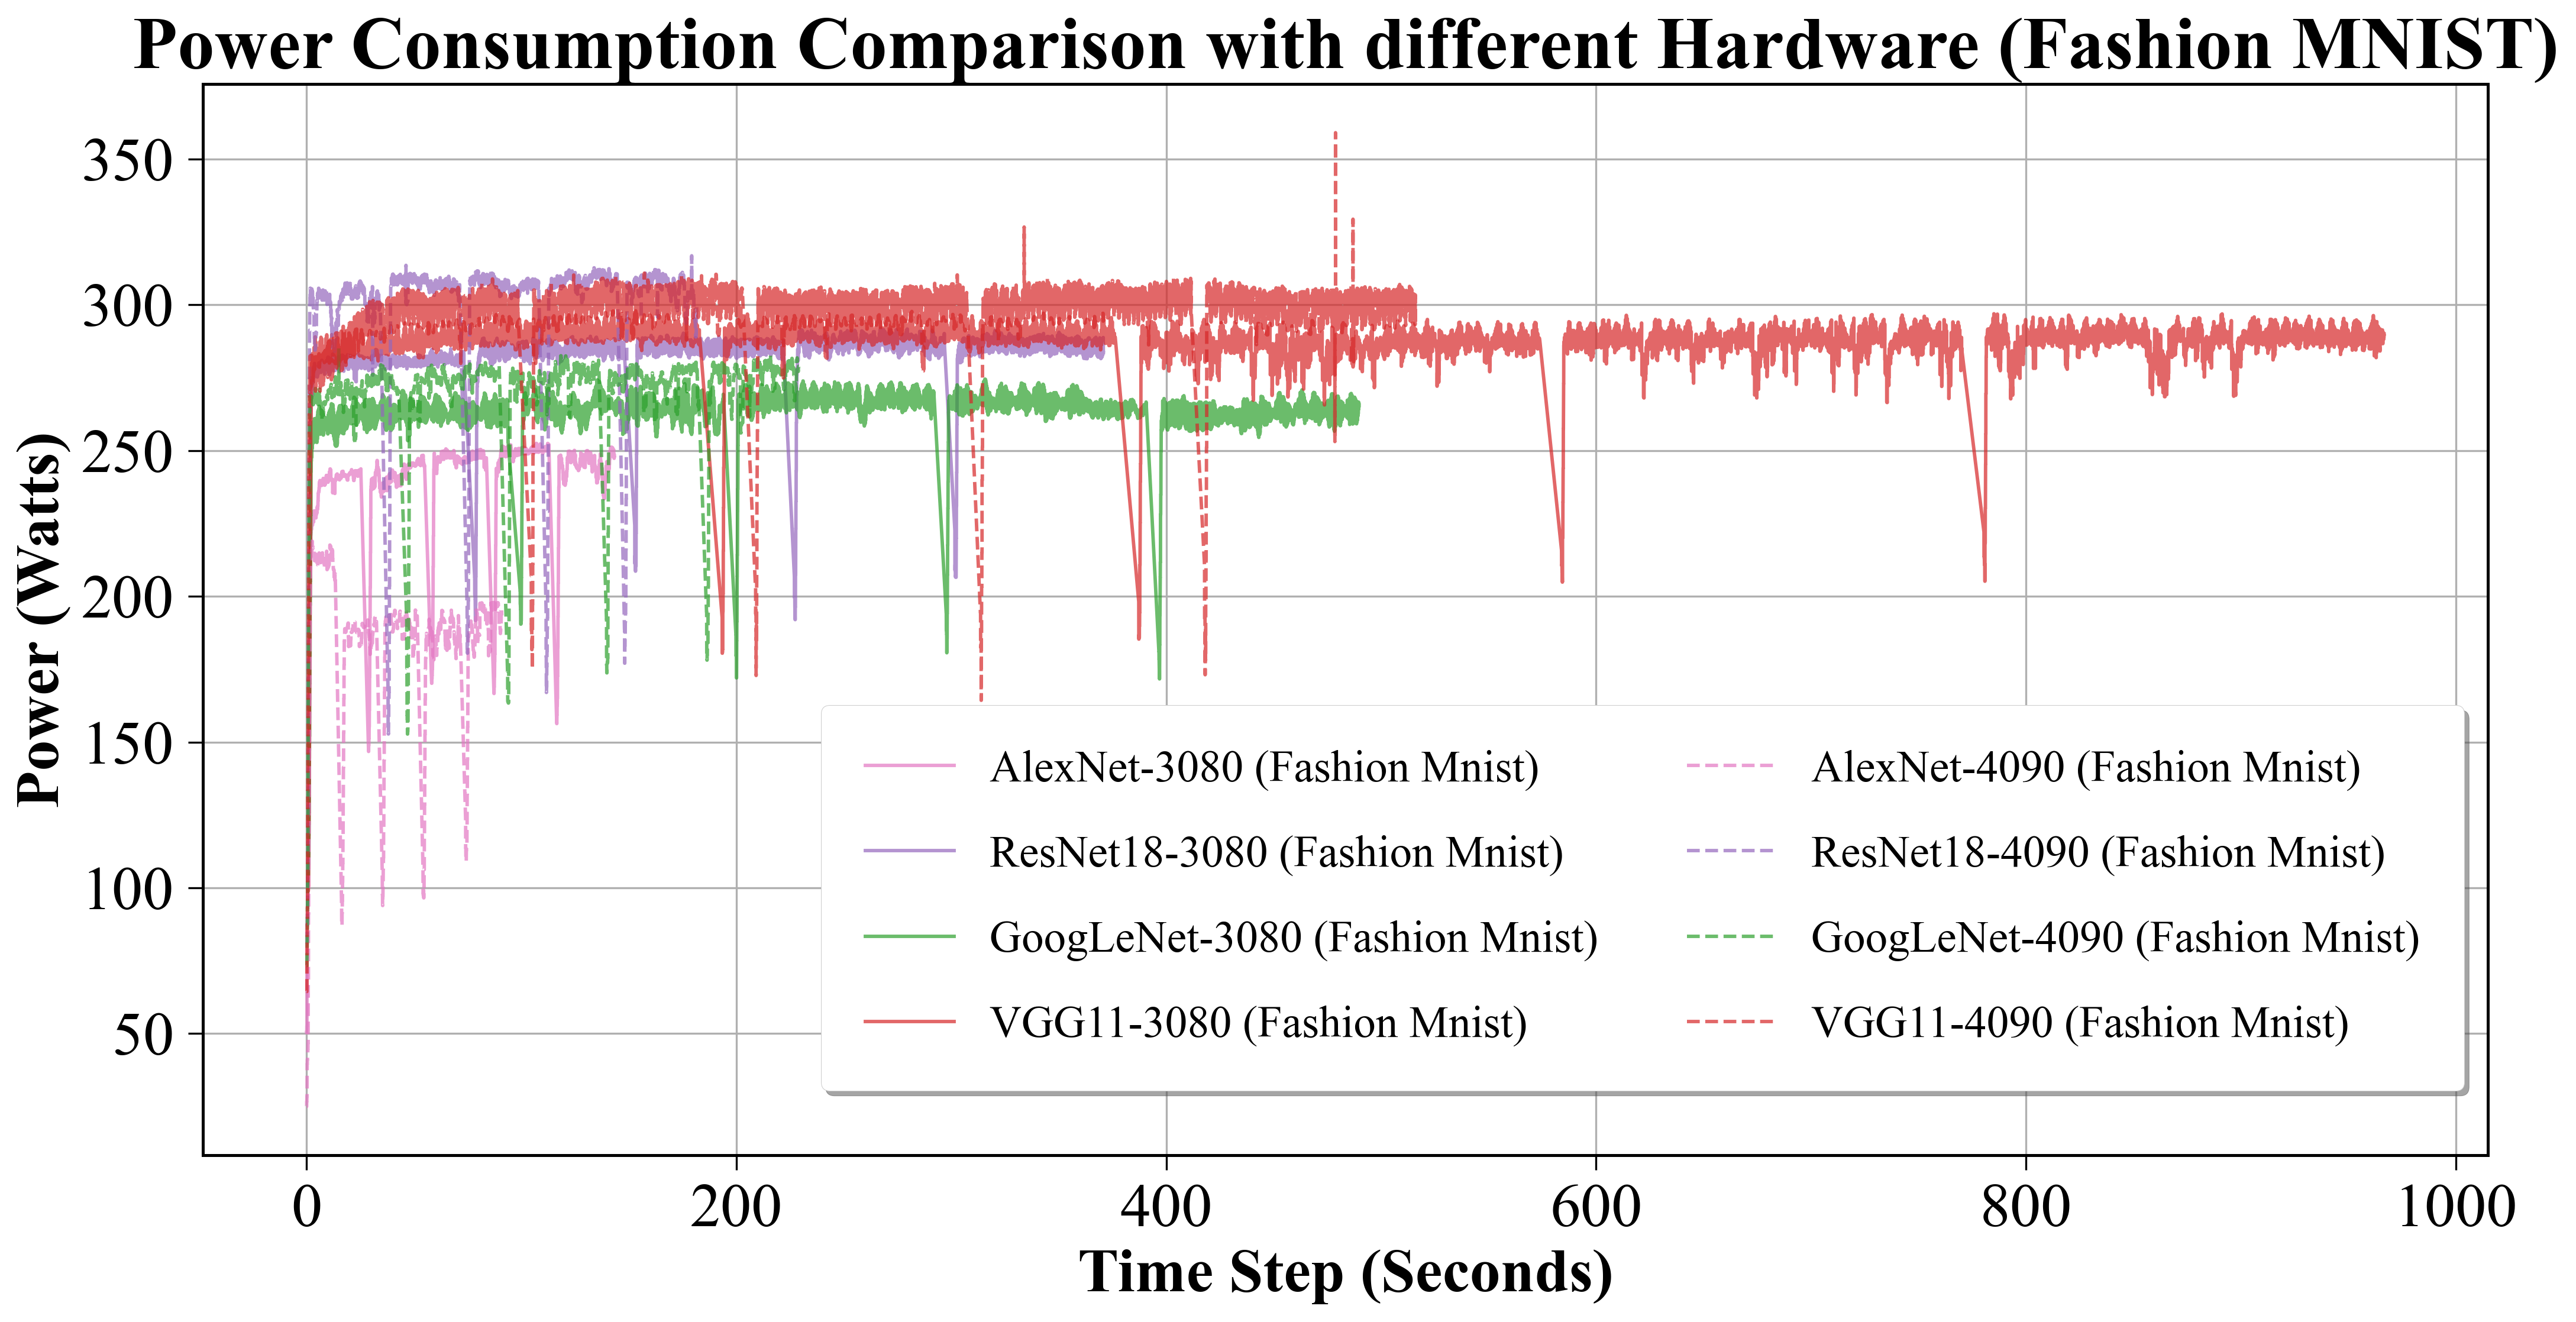

In [54]:
# # Fig 1
# # ================== IEEE 图表样式配置 ==================
# plt.rcParams.update({
#     'font.family': 'serif',        # IEEE推荐衬线字体
#     'font.serif': 'Times New Roman',
#     'font.size': 14,               
#     'axes.labelsize': 16,          # 坐标轴标签
#     'axes.titlesize': 18,          # 标题
#     'xtick.labelsize': 14,         
#     'ytick.labelsize': 14,         
#     'legend.fontsize': 12,         
#     'legend.framealpha': 0.8,      
#     'axes.linewidth': 1.2,         
#     'lines.linewidth': 1.8,        
#     'lines.markersize': 9,         
#     'xtick.major.size': 6,         
#     'xtick.major.width': 1.2,      
#     'ytick.major.size': 6,         
#     'ytick.major.width': 1.2,     
#     'figure.dpi': 300              # 高分辨率
# })
# Create a figure
plt.figure(figsize=(15, 8), dpi=300)

# Plot data for 3080 models
plt.plot(alexnet3080_f['timestamp'] - alexnet3080_f['timestamp'].min(), alexnet3080_f['power_in_watts'], label='AlexNet-3080 (Fashion Mnist)', alpha=0.7, color=colors[6])
plt.plot(resnet183080_f['timestamp'], resnet183080_f['power_in_watts'], label='ResNet18-3080 (Fashion Mnist)', alpha=0.7, color=colors[4])
plt.plot(googlenet_origin3080_f['timestamp'], googlenet_origin3080_f['power_in_watts'], label='GoogLeNet-3080 (Fashion Mnist)', alpha=0.7, color=colors[2])
plt.plot(vgg113080_f['timestamp'], vgg113080_f['power_in_watts'], label='VGG11-3080 (Fashion Mnist)', alpha=0.7, color=colors[3])
# plt.plot(vit3080_f['timestamp'], vit3080_f['power_in_watts'], label='ViT-3080 (Fashion Mnist)', alpha=0.7, color=colors[7])
# Plot data for 4090 models with dashed lines
plt.plot(alexnet4090_f['timestamp'] - alexnet4090_f['timestamp'].min(), alexnet4090_f['power_in_watts'][:], label='AlexNet-4090 (Fashion Mnist)', alpha=0.7, linestyle='--', color=colors[6])
# plt.plot(alexnet4090_c['power_in_watts'][:50000], label='alexnet4090_cifar100', alpha=0.7, linestyle='--')
plt.plot(resnet184090_f['timestamp'] - resnet184090_f['timestamp'].min(), resnet184090_f['power_in_watts'][:], label='ResNet18-4090 (Fashion Mnist)', alpha=0.7, linestyle='--', color=colors[4])
plt.plot(googlenet_origin4090_f['timestamp'] - googlenet_origin4090_f['timestamp'].min(), googlenet_origin4090_f['power_in_watts'][:], label='GoogLeNet-4090 (Fashion Mnist)', alpha=0.7, linestyle='--', color=colors[2])
plt.plot(vgg114090_f['timestamp'] - vgg114090_f['timestamp'].min(), vgg114090_f['power_in_watts'][:], label='VGG11-4090 (Fashion Mnist)', alpha=0.7, linestyle='--', color=colors[3])
# plt.plot(vit4090_f['timestamp'] - vit4090_f['timestamp'].min(), vit4090_f['power_in_watts'][:], label='ViT-4090 (Fashion Mnist)', alpha=0.7, linestyle='--', color=colors[7])

# Customize the plot with professional styling
plt.xlabel('Time Steps', fontfamily='serif', fontweight='bold')
plt.ylabel('Power Consumption (Watts)', fontfamily='serif', fontweight='bold')

# Customize the plot
plt.xlabel('Time Step (Seconds)', fontfamily='serif')
plt.ylabel('Power (Watts)', fontfamily='serif')
plt.title('Power Consumption Comparison with different Hardware (Fashion MNIST)', fontfamily='serif', fontweight='bold')
# Customize legend - moved to bottom center
plt.legend(loc='center', bbox_to_anchor=(0.63, 0.24),
          frameon=True, fancybox=True, shadow=True,
          borderpad=1, labelspacing=1, ncol=2, prop={'family': 'serif'})
plt.grid(True)

plt.tight_layout()


# save the figure to pdf file
plt.savefig('power_consumption_comparison_fashion_mnist.pdf', format='pdf', dpi=300, bbox_inches='tight')
plt.show()

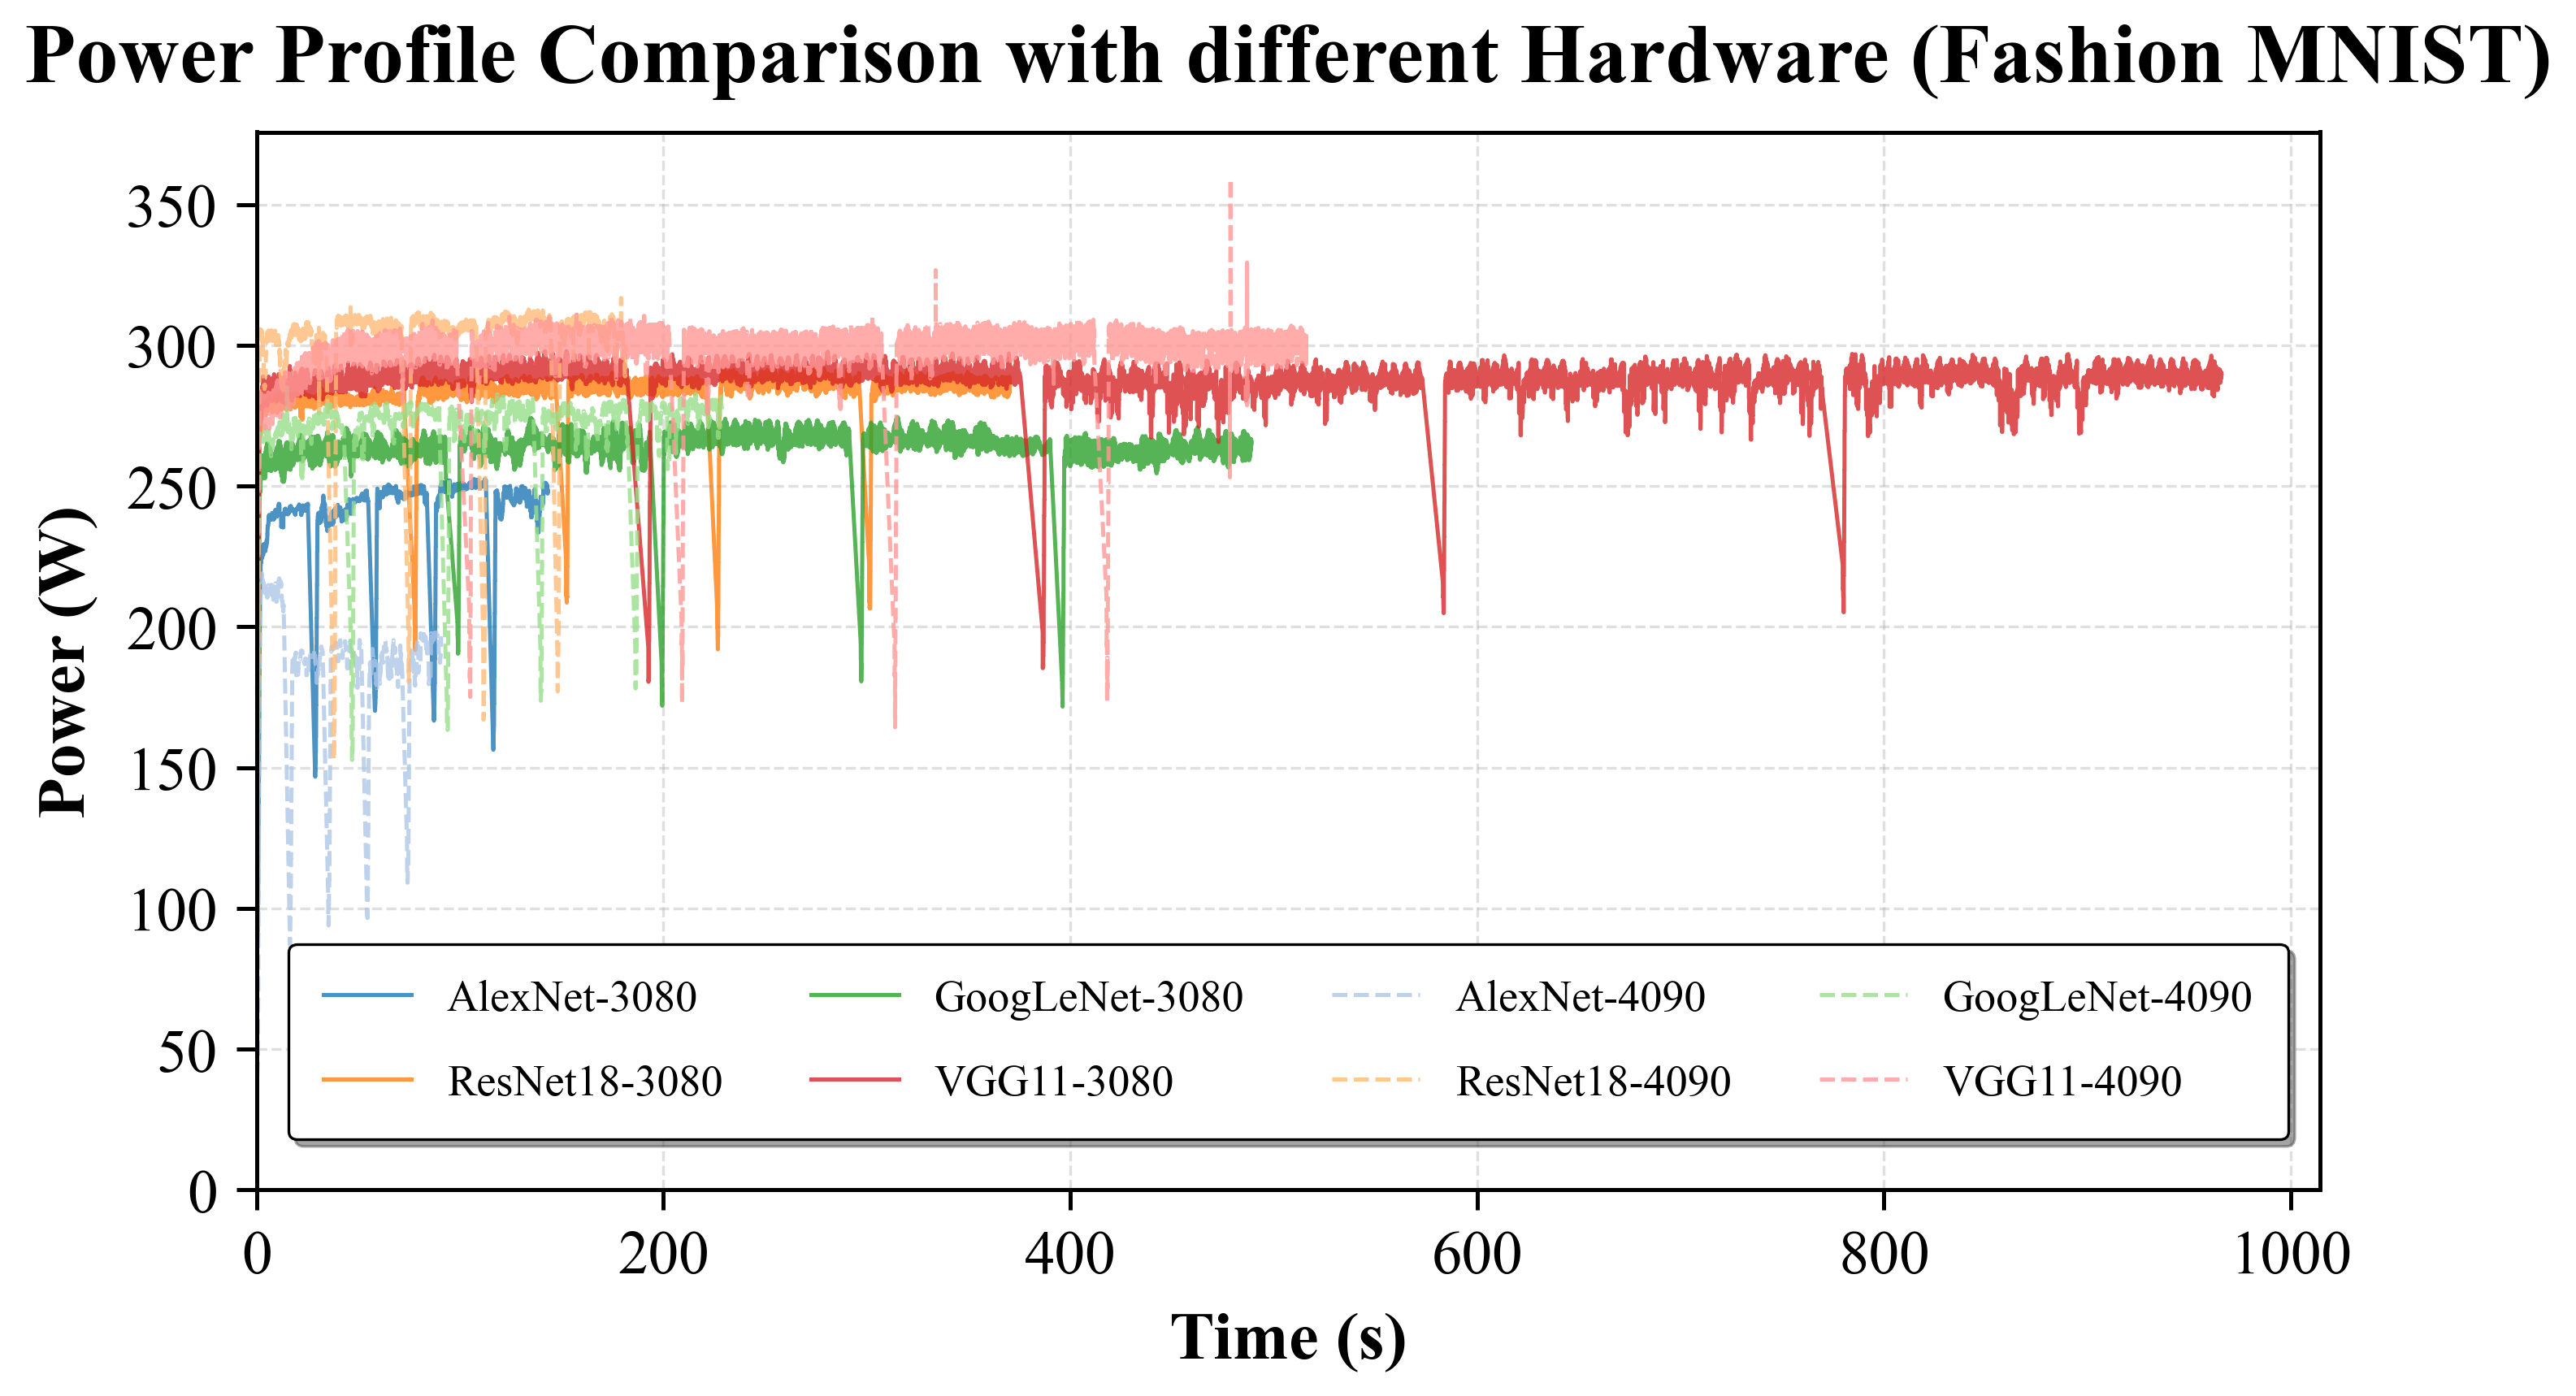

In [55]:
plt.rcParams.update({
    'font.family': 'serif',        # IEEE推荐衬线字体
    'font.serif': 'Times New Roman',
    'font.size': 14,               
    'axes.labelsize': 20,          # 坐标轴标签
    'axes.titlesize': 25,          # 标题
    'xtick.labelsize': 18,         
    'ytick.labelsize': 18,         
    'legend.fontsize': 13,         
    'legend.framealpha': 0.8,      
    'axes.linewidth': 1.2,         
    'lines.linewidth': 1.8,        
    'lines.markersize': 9,         
    'xtick.major.size': 6,         
    'xtick.major.width': 1.2,      
    'ytick.major.size': 6,         
    'ytick.major.width': 1.2,     
    'figure.dpi': 300              # 高分辨率
})

# ================== 硬件颜色映射 ==================
hardware_styles = {
    '3080': {
        'color_map': {
            'AlexNet': '#1f77b4',   # 标准蓝色
            'ResNet18': '#ff7f0e',  # 橙色
            'GoogLeNet': '#2ca02c', # 绿色
            'VGG11': '#d62728'      # 红色
        },
        'linestyle': '-'           # 实线
    },
    '4090': {
        'color_map': {
            'AlexNet': '#aec7e8',   # 浅蓝
            'ResNet18': '#ffbb78',  # 浅橙
            'GoogLeNet': '#98df8a', # 浅绿
            'VGG11': '#ff9896'      # 浅红
        },
        'linestyle': '--'         # 虚线
    }
}

# ================== 创建标准化图表 ==================
plt.figure(figsize=(10, 7))  # IEEE双栏兼容尺寸 (7英寸宽)

# ================== 数据绘制 ==================
def plot_power_curve(df, model_name, hardware_type):
    """标准化绘图函数"""
    style = hardware_styles[hardware_type]
    time = df['timestamp'] - df['timestamp'].min()  # 时间归零处理
    plt.plot(
        time,
        df['power_in_watts'],
        label=f'{model_name}-{hardware_type}',
        color=style['color_map'][model_name],
        linestyle=style['linestyle'],
        alpha=0.8,
        linewidth=1.2
    )

# 绘制3080系列
plot_power_curve(alexnet3080_f, 'AlexNet', '3080')
plot_power_curve(resnet183080_f, 'ResNet18', '3080')
plot_power_curve(googlenet_origin3080_f, 'GoogLeNet', '3080')
plot_power_curve(vgg113080_f, 'VGG11', '3080')

# 绘制4090系列
plot_power_curve(alexnet4090_f, 'AlexNet', '4090')
plot_power_curve(resnet184090_f, 'ResNet18', '4090')
plot_power_curve(googlenet_origin4090_f, 'GoogLeNet', '4090')
plot_power_curve(vgg114090_f, 'VGG11', '4090')

# ================== 图表装饰 ==================
# 坐标轴设置
plt.xlabel('Time (s)', fontweight='bold', labelpad=8)
plt.ylabel('Power (W)', fontweight='bold', labelpad=8)
plt.title('Power Profile Comparison with different Hardware (Fashion MNIST)', 
         fontweight='bold', pad=15)

# 网格设置
plt.grid(True, which='both', linestyle='--', alpha=0.4, linewidth=0.8)

# 坐标轴范围优化
plt.xlim(left=0)  # 时间从0开始
plt.ylim(bottom=0)  # 功率非负

# ================== 专业图例布局 ==================
legend = plt.legend(
    loc='center',
    bbox_to_anchor=(0.5, 0.14),
    ncol=4,
    frameon=True,
    fancybox=True,
    shadow=True,
    borderpad=0.8,
    labelspacing=1, prop={'family': 'serif'}
)

legend.get_frame().set_edgecolor('k')  # 黑色边框
legend.get_frame().set_linewidth(0.8)

# ================== 输出设置 ==================
plt.tight_layout(rect=[0, 0.15, 1, 1])  # 调整布局适应图例

# 保存多格式文件
filename = 'power_comparison_fashion_mnist'
plt.savefig(f'{filename}.pdf', bbox_inches='tight')  # 矢量格式
# plt.savefig(f'{filename}.png', dpi=600, bbox_inches='tight')  # 高分辨率位图
plt.show()  # 显式关闭图形

In [56]:
# # Fig 2
# # Create a figure
# plt.figure(figsize=(15, 8), dpi=300)

# # Plot data for 3080 models
# plt.plot(alexnet3080_f['power_in_watts'][:], label='AlexNet-3080 (Fashion Mnist)', alpha=0.7, color=colors[0])
# # plt.plot(alexnet3080_c['power_in_watts'][:], label='alexnet3080_cifar100', alpha=0.7)
# plt.plot(resnet343080_f['power_in_watts'][:], label='ResNet34-3080 (Fashion Mnist)', alpha=0.7, color=colors[1])
# plt.plot(googlenet_origin3080_f['power_in_watts'][:], label='GoogLeNet-3080 (Fashion Mnist)', alpha=0.7, color=colors[2])
# plt.plot(vit3080_f['power_in_watts'][:], label='ViT-3080 (Fashion Mnist)', alpha=0.7, color=colors[3])


# # Plot data for 4090 models with dashed lines
# # plt.plot(alexnet4090_f['power_in_watts'][:], label='AlexNet-4090 (Fashion Mnist)', alpha=0.7, linestyle='--', color=colors[3])
# # # plt.plot(alexnet4090_c['power_in_watts'][:50000], label='alexnet4090_cifar100', alpha=0.7, linestyle='--')
# # plt.plot(resnet184090_f['power_in_watts'][:], label='ResNet18-4090 (Fashion Mnist)', alpha=0.7, linestyle='--', color=colors[4])
# # plt.plot(googlenet_origin4090_f['power_in_watts'][:], label='GoogLeNet-4090 (Fashion Mnist)', alpha=0.7, linestyle='--', color=colors[5])

# # Customize the plot with professional styling
# plt.xlabel('Time Steps', fontfamily='serif', fontweight='bold')
# plt.ylabel('Power Consumption (Watts)', fontfamily='serif', fontweight='bold')

# # Customize the plot
# plt.xlabel('Time Step', fontfamily='serif')
# plt.ylabel('Power (Watts)', fontfamily='serif')
# plt.title('Power Consumption Comparison with different Models (Fashion MNIST)', fontfamily='serif')
# # Customize legend - moved to bottom center
# plt.legend(loc='center', bbox_to_anchor=(0.58, 0.24),
#           frameon=True, fancybox=True, shadow=True,
#           borderpad=1, labelspacing=1, ncol=2, prop={'family': 'serif'})
# plt.grid(True)

# plt.tight_layout()
# plt.show()


In [57]:
# # Create a figure
# plt.figure(figsize=(15, 8))

# # Plot data for 3080 models
# plt.plot(alexnet3080_f['power_in_watts'][:], label='alexnet_3080_fashionmnist', alpha=0.7)
# # plt.plot(alexnet3080_c['power_in_watts'][:], label='alexnet3080_cifar100', alpha=0.7)
# plt.plot(resnet183080_f['power_in_watts'][:], label='resnet18_3080_fashionmnist', alpha=0.7)
# plt.plot(googlenet_origin3080_f['power_in_watts'][:], label='googlenet_3080_fashionmnist', alpha=0.7)

# # Plot data for 4090 models with dashed lines
# plt.plot(alexnet4090_f['power_in_watts'][:], label='alexnet_4090_fashionmnist', alpha=0.7, linestyle='--')
# # plt.plot(alexnet4090_c['power_in_watts'][:50000], label='alexnet4090_cifar100', alpha=0.7, linestyle='--')
# plt.plot(resnet184090_f['power_in_watts'][:], label='resnet18_4090_fashionmnist', alpha=0.7, linestyle='--')
# plt.plot(googlenet_origin4090_f['power_in_watts'][:], label='googlenet_4090_fashionmnist', alpha=0.7, linestyle='--')


# # Customize the plot
# plt.xlabel('Time Step')
# plt.ylabel('Power (Watts)')
# plt.title('Power Consumption Comparison - All Models (Fashion MNIST)')
# plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
# plt.grid(True)

# plt.tight_layout()
# plt.show()


In [58]:
# # # Create a figure
# # # plt.figure(figsize=(15,12))
# # # Set the style for a professional look
# # plt.style.use('seaborn-v0_8-paper')
# # # Set all fonts to serif
# # plt.rcParams['font.family'] = 'serif'
# # plt.rcParams['font.serif'] = ['Times New Roman']  # Specify Times New Roman as the serif font
# # plt.rcParams['font.size'] = 25
# # plt.rcParams['axes.labelsize'] = 25 
# # plt.rcParams['axes.titlesize'] = 25
# # plt.rcParams['legend.fontsize'] = 18
# # plt.rcParams['xtick.labelsize'] = 25
# # plt.rcParams['ytick.labelsize'] = 25

# # Create a figure with higher DPI for better quality
# plt.figure(figsize=(15, 8), dpi=300)

# # Plot data for 3080 models with improved styling
# plt.plot(alexnet3080_f['power_in_watts'][:], label='AlexNet-3080 (FashionMNIST)', 
#          color=colors[0], linewidth=2, alpha=0.9)
# plt.plot(alexnet3080_c['power_in_watts'][:], label='AlexNet-3080 (CIFAR100)', 
#          color=colors[1], linewidth=2, alpha=0.9)
# plt.plot(resnet343080_f['power_in_watts'][:], label='ResNet18-3080 (FashionMNIST)', 
#          color=colors[2], linewidth=2, alpha=0.9)
# plt.plot(resnet343080_c['power_in_watts'][:], label='ResNet18-3080 (CIFAR100)', 
#          color=colors[3], linewidth=2, alpha=0.9)
# plt.plot(googlenet_origin3080_f['power_in_watts'][:], label='GoogLeNet-3080 (FashionMNIST)', 
#          color=colors[4], linewidth=2, alpha=0.9)
# plt.plot(googlenet_origin3080_c['power_in_watts'][:], label='GoogLeNet-3080 (CIFAR100)', 
#          color=colors[5], linewidth=2, alpha=0.9)
# plt.plot(vgg113080_f['power_in_watts'][:], label='VGG11-3080 (FashionMNIST)', 
#          color=colors[6], linewidth=2, alpha=0.9)
# plt.plot(vgg113080_c['power_in_watts'][:], label='VGG11-3080 (CIFAR100)', 
#          color=colors[7], linewidth=2, alpha=0.9)

# # Customize the plot with professional styling
# plt.xlabel('Time Steps', fontweight='bold')
# plt.ylabel('Power Consumption (Watts)', fontweight='bold')
# plt.title('Power Consumption Comparison', 
#           fontweight='bold', pad=20)

# # Add grid with subtle styling
# plt.grid(True, linestyle='--', alpha=0.7)

# # Customize legend - moved to bottom center
# plt.legend(loc='center', bbox_to_anchor=(0.58, 0.24),
#           frameon=True, fancybox=True, shadow=True,
#           borderpad=1, labelspacing=1, ncol=2)

# # Adjust layout to prevent text cutoff
# plt.tight_layout()

# # Save the figure with high DPI
# # plt.savefig('power_consumption_comparison.pdf', format='pdf', dpi=300, bbox_inches='tight')
# # plt.savefig('power_consumption_comparison.png', format='png', dpi=300, bbox_inches='tight')

# plt.show()


In [59]:
# plt.figure(figsize=(15, 8))

# # Plot data for 3080 models
# plt.plot(alexnet3080_f['power_in_watts'][:], label='alexnet3080_fashionmnist', alpha=0.7)
# plt.plot(alexnet3080_c['power_in_watts'][:], label='alexnet3080_cifar100', alpha=0.7)
# plt.plot(resnet343080_f['power_in_watts'][:], label='resnet18_3080_fashionmnist', alpha=0.7)
# plt.plot(resnet343080_c['power_in_watts'][:], label='resnet18_3080_cifar100', alpha=0.7)
# plt.plot(googlenet_origin3080_f['power_in_watts'][:], label='googlenet_3080_fashionmnist', alpha=0.7)
# plt.plot(googlenet_origin3080_c['power_in_watts'][:], label='googlenet_3080_cifar100', alpha=0.7)
# plt.plot(vgg113080_f['power_in_watts'][:], label='vgg11_3080_fashionmnist', alpha=0.7)
# plt.plot(vgg113080_c['power_in_watts'][:], label='vgg11_3080_cifar100', alpha=0.7)
# # plt.plot(mobilenetv23080_f['power_in_watts'][:], label='mobilenetv2_3080_fashionmnist', alpha=0.7)

# # # Plot data for 4090 models with dashed lines
# # plt.plot(alexnet4090_f['power_in_watts'][:41500], label='alexnet4090_fashionmnist', alpha=0.7, linestyle='--')
# # plt.plot(alexnet4090_c['power_in_watts'][:50000], label='alexnet4090_cifar100', alpha=0.7, linestyle='--')


# # Customize the plot
# plt.xlabel('Time Step')
# plt.ylabel('Power (Watts)')
# plt.title('Power Consumption Comparison (Fashion MNIST & CIFAR100)')
# plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
# plt.grid(True)

# plt.tight_layout() 
# plt.show()

In [60]:
# # Create a figure
# plt.figure(figsize=(15, 8))

# # Plot data for 3080 models
# plt.plot(resnet183080_f['power_in_watts'][:], label='resnet18_3080_fashionmnist', alpha=0.7)
# plt.plot(resnet183080_c['power_in_watts'][:], label='resnet18_3080_cifar100', alpha=0.7)

# # Plot data for 4090 models with dashed lines
# plt.plot(resnet184090_f['power_in_watts'][:], label='resnet18_4090_fashionmnist', alpha=0.7, linestyle='--')
# plt.plot(resnet184090_c['power_in_watts'][:], label='resnet18_4090_cifar100', alpha=0.7, linestyle='--')

# # Customize the plot
# plt.xlabel('Time Step ')
# plt.ylabel('Power (Watts)')
# plt.title('Power Consumption Comparison - ResNet18 Models')
# plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
# plt.grid(True)

# plt.tight_layout()
# plt.show()


In [61]:
# # Create a figure
# plt.figure(figsize=(15, 8))

# # Plot data for 3080 models
# plt.plot(googlenet_origin3080_f['power_in_watts'][:], label='googlenet_3080_fashionmnist', alpha=0.7)
# plt.plot(googlenet_origin3080_c['power_in_watts'][:], label='googlenet_3080_cifar100', alpha=0.7)

# # Plot data for 4090 models with dashed lines
# plt.plot(googlenet_origin4090_f['power_in_watts'][:], label='googlenet_4090_fashionmnist', alpha=0.7, linestyle='--')
# plt.plot(googlenet_origin4090_c['power_in_watts'][:], label='googlenet_4090_cifar100', alpha=0.7, linestyle='--')

# # Customize the plot
# plt.xlabel('Time Step')
# plt.ylabel('Power (Watts)')
# plt.title('Power Consumption Comparison - GoogleNet Models')
# plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
# plt.grid(True)

# plt.tight_layout()
# plt.show()


In [62]:
# # Create a figure
# plt.figure(figsize=(15, 8))

# # Plot data for 3080 models
# plt.plot(vit3080_f['power_in_watts'][:], label='vit_3080_fashionmnist', alpha=0.7)
# plt.plot(resnet183080_f['power_in_watts'][:], label='resnet18_3080_fashionmnist', alpha=0.7)

# # Plot data for 4090 models with dashed lines
# plt.plot(vit4090_f['power_in_watts'][:], label='vit_4090_fashionmnist', alpha=0.7, linestyle='--')
# plt.plot(vit4090_c['power_in_watts'][:], label='vit_4090_cifar100', alpha=0.7, linestyle='--')

# # Customize the plot
# plt.xlabel('Time Step')
# plt.ylabel('Power (Watts)')
# plt.title('Power Consumption Comparison - mobilenetv2 Models')
# plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
# plt.grid(True)

# plt.tight_layout()
# plt.show()

In [63]:
# # Create a figure
# # Fig 2 
# plt.figure(figsize=(15, 8))

# # Plot data for 3080 models
# plt.plot(alexnet3080_f['power_in_watts'][:], label='alexnet3080_fashionmnist', alpha=0.7)
# plt.plot(resnet343080_f['power_in_watts'][:], label='resnet34_3080_fashionmnist', alpha=0.7)
# plt.plot(googlenet_origin3080_f['power_in_watts'][:], label='googlenet_3080_fashionmnist', alpha=0.7)
# plt.plot(vit3080_f['power_in_watts'][:], label='vit_3080_fashionmnist', alpha=0.7)

# # Customize the plot
# plt.xlabel('Time Step')
# plt.ylabel('Power (Watts)')
# plt.title('Power Consumption Comparison with Different Models(Fashion MNIST)')
# # Customize legend - moved to bottom center
# plt.legend(loc='center', bbox_to_anchor=(0.58, 0.24),
#           frameon=True, fancybox=True, shadow=True,
#           borderpad=1, labelspacing=1, ncol=2)
# plt.grid(True)

# plt.tight_layout()
# plt.show()


## Comparison of all the energy consumption data collected from 3080 and 4090

In [64]:
def calculate_totalenergy(npyfile):
    energy = 0
    for epoch in range(npyfile.shape[0]):
        for batch in range(npyfile.shape[1]):
            energy += (npyfile[epoch][batch][1] - npyfile[epoch][batch][0]) * npyfile[epoch][batch][2]
    return energy


In [65]:
# find all the data in the file3080_dir
modelslist = os.listdir(file3080_dir)
# create a dictionary to store the total energy for each model
total_energy_dict_f_3080 = {}
for model in modelslist:
    # get the data folder for each model
    datafolder = os.path.join(file3080_dir, model, dataset[0], sample_folder)
    # print(datafolder)
    # get the to_device_energy.npy, forward_energy.npy, loss_energy.npy, backward_energy.npy, optimize_energy.npy
    to_device_energy = np.load(os.path.join(datafolder, 'to_device_energy.npy'), allow_pickle=True)
    forward_energy = np.load(os.path.join(datafolder, 'forward_energy.npy'), allow_pickle=True)
    loss_energy = np.load(os.path.join(datafolder, 'loss_energy.npy'), allow_pickle=True)
    backward_energy = np.load(os.path.join(datafolder, 'backward_energy.npy'), allow_pickle=True)
    optimize_energy = np.load(os.path.join(datafolder, 'optimize_energy.npy'), allow_pickle=True)

    # calculate the total energy for each step, the shape is (5, 469, 3)
    to_device_totalenergy = calculate_totalenergy(to_device_energy)
    forward_totalenergy = calculate_totalenergy(forward_energy)
    loss_totalenergy = calculate_totalenergy(loss_energy)
    backward_totalenergy = calculate_totalenergy(backward_energy)
    optimize_totalenergy = calculate_totalenergy(optimize_energy)

    # total consumption energy
    total_energy = to_device_totalenergy + forward_totalenergy + loss_totalenergy + backward_totalenergy + optimize_totalenergy

    # store the total energy for each model
    total_energy_dict_f_3080[model] = total_energy

print(total_energy_dict_f_3080)

{'googlenet_origin': 6369.781229416533, 'resnet50': 10581.744209791215, 'resnet34': 15642.585051412809, 'mobilenetv2': 9095.863585598378, 'vgg13': 189606.95335206322, 'googlenet_mod7': 11311.688135393806, 'googlenet_mod9': 612.8297170117277, 'googlenet_mod8': 20239.913846635816, 'googlenet_mod1': 4203.496031620222, 'googlenet_mod6': 5485.586579400379, 'resnet18': 4995.363282606904, 'mobilenetv1': 1815.9795224899408, 'vit': 5866.942955963818, 'vgg16': 287872.58915847685, 'vgg11': 43143.818687905245, 'vgg19': 283542.6861115376, 'googlenet_mod3': 4198.589761037991, 'googlenet_mod4': 4165.539260468766, 'googlenet_mod5': 2236.4643704451178, 'googlenet_mod2': 1967.6826250417273, 'alexnet': 295.97153643742}


In [66]:
# find all the data in the file3080_dir
modelslist = os.listdir(file3080_dir)
# create a dictionary to store the total energy for each model
total_energy_dict_c_3080 = {}
for model in modelslist:
    # get the data folder for each model
    datafolder = os.path.join(file3080_dir, model, dataset[1], sample_folder)
    # print(datafolder)
    # get the to_device_energy.npy, forward_energy.npy, loss_energy.npy, backward_energy.npy, optimize_energy.npy
    to_device_energy = np.load(os.path.join(datafolder, 'to_device_energy.npy'), allow_pickle=True)
    forward_energy = np.load(os.path.join(datafolder, 'forward_energy.npy'), allow_pickle=True)
    loss_energy = np.load(os.path.join(datafolder, 'loss_energy.npy'), allow_pickle=True)
    backward_energy = np.load(os.path.join(datafolder, 'backward_energy.npy'), allow_pickle=True)
    optimize_energy = np.load(os.path.join(datafolder, 'optimize_energy.npy'), allow_pickle=True)

    # calculate the total energy for each step, the shape is (5, 469, 3)
    to_device_totalenergy = calculate_totalenergy(to_device_energy)
    forward_totalenergy = calculate_totalenergy(forward_energy)
    loss_totalenergy = calculate_totalenergy(loss_energy)
    backward_totalenergy = calculate_totalenergy(backward_energy)
    optimize_totalenergy = calculate_totalenergy(optimize_energy)

    # total consumption energy
    total_energy = to_device_totalenergy + forward_totalenergy + loss_totalenergy + backward_totalenergy + optimize_totalenergy

    # store the total energy for each model
    total_energy_dict_c_3080[model] = total_energy

print(total_energy_dict_c_3080)

{'googlenet_origin': 5891.637167761389, 'resnet50': 9451.735848029926, 'resnet34': 13619.78180653549, 'mobilenetv2': 16754.398666789246, 'vgg13': 171429.3962756959, 'googlenet_mod7': 9860.901478997079, 'googlenet_mod9': 705.4852040518023, 'googlenet_mod8': 17325.43437565124, 'googlenet_mod1': 3969.9795914654223, 'googlenet_mod6': 4963.2246856042875, 'resnet18': 4515.226129508075, 'mobilenetv1': 1490.349492291362, 'vit': 5148.808979352324, 'vgg16': 243172.3573257249, 'vgg11': 41048.05634844155, 'vgg19': 313777.1684361614, 'googlenet_mod3': 3924.785779313404, 'googlenet_mod4': 3810.0770148649563, 'googlenet_mod5': 2145.46847033542, 'googlenet_mod2': 1961.5040928073824, 'alexnet': 370.34955116671995}


In [67]:
# find all the data in the file3080_dir
modelslist = os.listdir(file4090_dir)
# create a dictionary to store the total energy for each model
total_energy_dict_f_4090 = {}
for model in modelslist:
    # get the data folder for each model
    datafolder = os.path.join(file4090_dir, model, dataset[0], sample_folder)
    # print(datafolder)
    # get the to_device_energy.npy, forward_energy.npy, loss_energy.npy, backward_energy.npy, optimize_energy.npy
    to_device_energy = np.load(os.path.join(datafolder, 'to_device_energy.npy'), allow_pickle=True)
    forward_energy = np.load(os.path.join(datafolder, 'forward_energy.npy'), allow_pickle=True)
    loss_energy = np.load(os.path.join(datafolder, 'loss_energy.npy'), allow_pickle=True)
    backward_energy = np.load(os.path.join(datafolder, 'backward_energy.npy'), allow_pickle=True)
    optimize_energy = np.load(os.path.join(datafolder, 'optimize_energy.npy'), allow_pickle=True)

    # calculate the total energy for each step, the shape is (5, 469, 3)
    to_device_totalenergy = calculate_totalenergy(to_device_energy)
    forward_totalenergy = calculate_totalenergy(forward_energy)
    loss_totalenergy = calculate_totalenergy(loss_energy)
    backward_totalenergy = calculate_totalenergy(backward_energy)
    optimize_totalenergy = calculate_totalenergy(optimize_energy)

    # total consumption energy
    total_energy = to_device_totalenergy + forward_totalenergy + loss_totalenergy + backward_totalenergy + optimize_totalenergy

    # store the total energy for each model
    total_energy_dict_f_4090[model] = total_energy

print(total_energy_dict_f_4090)

{'googlenet_origin': 1786.501458015134, 'resnet50': 3058.2385294083792, 'resnet34': 4234.080178224608, 'mobilenetv2': 2948.092238449492, 'vgg13': 32433.906223080536, 'googlenet_mod7': 2796.824799310735, 'googlenet_mod9': 173.60946316787167, 'googlenet_mod8': 4572.93484351415, 'googlenet_mod1': 1171.2336304644773, 'googlenet_mod6': 1329.591261897074, 'resnet18': 1429.3394767059735, 'mobilenetv1': 555.7766452651066, 'vit': 1163.5128534140645, 'vgg16': 50345.313649015945, 'vgg11': 9887.892249310278, 'vgg19': 59745.5231118886, 'googlenet_mod3': 1198.6234969822397, 'googlenet_mod4': 1153.3612960539313, 'googlenet_mod5': 535.9058753698843, 'googlenet_mod2': 649.6154270198858, 'alexnet': 66.24352419913328}


In [68]:
# find all the data in the file3080_dir
modelslist = os.listdir(file4090_dir)
# create a dictionary to store the total energy for each model
total_energy_dict_c_4090 = {}
for model in modelslist:
    # get the data folder for each model
    datafolder = os.path.join(file4090_dir, model, dataset[1], sample_folder)
    # print(datafolder)
    # get the to_device_energy.npy, forward_energy.npy, loss_energy.npy, backward_energy.npy, optimize_energy.npy
    to_device_energy = np.load(os.path.join(datafolder, 'to_device_energy.npy'), allow_pickle=True)
    forward_energy = np.load(os.path.join(datafolder, 'forward_energy.npy'), allow_pickle=True)
    loss_energy = np.load(os.path.join(datafolder, 'loss_energy.npy'), allow_pickle=True)
    backward_energy = np.load(os.path.join(datafolder, 'backward_energy.npy'), allow_pickle=True)
    optimize_energy = np.load(os.path.join(datafolder, 'optimize_energy.npy'), allow_pickle=True)

    # calculate the total energy for each step, the shape is (5, 469, 3)
    to_device_totalenergy = calculate_totalenergy(to_device_energy)
    forward_totalenergy = calculate_totalenergy(forward_energy)
    loss_totalenergy = calculate_totalenergy(loss_energy)
    backward_totalenergy = calculate_totalenergy(backward_energy)
    optimize_totalenergy = calculate_totalenergy(optimize_energy)

    # total consumption energy
    total_energy = to_device_totalenergy + forward_totalenergy + loss_totalenergy + backward_totalenergy + optimize_totalenergy

    # store the total energy for each model
    total_energy_dict_c_4090[model] = total_energy

print(total_energy_dict_c_4090)

{'googlenet_origin': 1350.2128178635114, 'resnet50': 2392.143157262473, 'resnet34': 3260.289973299544, 'mobilenetv2': 2274.633282849414, 'vgg13': 44078.43957339062, 'googlenet_mod7': 2045.5489968704414, 'googlenet_mod9': 181.72837657140346, 'googlenet_mod8': 3590.082349936043, 'googlenet_mod1': 919.8978980630071, 'googlenet_mod6': 1034.2835041557291, 'resnet18': 1104.3546886345705, 'mobilenetv1': 429.7022264748654, 'vit': 1011.8942107834763, 'vgg16': 60785.606590462456, 'vgg11': 8162.5227758551155, 'vgg19': 46198.656971650846, 'googlenet_mod3': 874.8121883690416, 'googlenet_mod4': 883.2345503629475, 'googlenet_mod5': 442.9260471863092, 'googlenet_mod2': 532.8277489602089, 'alexnet': 86.74792351007186}


In [69]:
total_energy_dict_c_4090.pop('mobilenetv2', None)
total_energy_dict_f_4090.pop('mobilenetv2', None)
total_energy_dict_c_3080.pop('mobilenetv2', None)
total_energy_dict_f_3080.pop('mobilenetv2', None)
total_energy_dict_c_4090.pop('mobilenetv1', None)
total_energy_dict_f_4090.pop('mobilenetv1', None)
total_energy_dict_c_3080.pop('mobilenetv1', None)
total_energy_dict_f_3080.pop('mobilenetv1', None)

1815.9795224899408

In [70]:
total_energy_dict_f_3080_df = pd.DataFrame(list(total_energy_dict_f_3080.items()), columns=['Model', 'Energy'])
total_energy_dict_f_3080_df['Model'] = total_energy_dict_f_3080_df['Model'].replace('googlenet_origin', 'googlenet')

total_energy_dict_c_3080_df = pd.DataFrame(list(total_energy_dict_c_3080.items()), columns=['Model', 'Energy'])
total_energy_dict_c_3080_df['Model'] = total_energy_dict_c_3080_df['Model'].replace('googlenet_origin', 'googlenet')

total_energy_dict_f_4090_df = pd.DataFrame(list(total_energy_dict_f_4090.items()), columns=['Model', 'Energy'])
total_energy_dict_f_4090_df['Model'] = total_energy_dict_f_4090_df['Model'].replace('googlenet_origin', 'googlenet')

total_energy_dict_c_4090_df = pd.DataFrame(list(total_energy_dict_c_4090.items()), columns=['Model', 'Energy'])
total_energy_dict_c_4090_df['Model'] = total_energy_dict_c_4090_df['Model'].replace('googlenet_origin', 'googlenet')

total_energy_dict_c_3080_df

Model         Energy
0        googlenet    5891.637168
1         resnet50    9451.735848
2         resnet34   13619.781807
3            vgg13  171429.396276
4   googlenet_mod7    9860.901479
5   googlenet_mod9     705.485204
6   googlenet_mod8   17325.434376
7   googlenet_mod1    3969.979591
8   googlenet_mod6    4963.224686
9         resnet18    4515.226130
10             vit    5148.808979
11           vgg16  243172.357326
12           vgg11   41048.056348
13           vgg19  313777.168436
14  googlenet_mod3    3924.785779
15  googlenet_mod4    3810.077015
16  googlenet_mod5    2145.468470
17  googlenet_mod2    1961.504093
18         alexnet     370.349551

In [71]:
# read the macs_paras.csv file for each model
macs_paras = pd.read_csv(os.path.join(parent_dir, '3080/macs_paras.csv'))
print(macs_paras)
macs_models = macs_paras['Model']
macs_paras_fashionmnist = macs_paras['MACs_f']
macs_paras_cifar100 = macs_paras['MACs_c100']
model_macs_fashionmnist = []
for i in macs_paras_fashionmnist:
    unit = i.split(' ')[1][0]
    value = float(i.split(' ')[0])
    if unit == 'M':
        macs_paras_fashionmnist[i] = value * 1e6
    elif unit == 'G':
        macs_paras_fashionmnist[i] = value * 1e9
    model_macs_fashionmnist.append(macs_paras_fashionmnist[i])

model_macs_cifar100 = []
for i in macs_paras_cifar100:
    unit = i.split(' ')[1][0]
    value = float(i.split(' ')[0])
    if unit == 'M':
        macs_paras_cifar100[i] = value * 1e6
    elif unit == 'G':
        macs_paras_cifar100[i] = value * 1e9
    model_macs_cifar100.append(macs_paras_cifar100[i])

print(model_macs_fashionmnist, model_macs_cifar100)

             Model       MACs_f Parameters_f    MACs_c100 Parameters_c100  \
0          alexnet  666.41 MMac      57.03 M  713.63 MMac         57.41 M   
1         resnet18    1.75 GMac      11.18 M    1.83 GMac         11.23 M   
2         resnet34    3.61 GMac      21.29 M    3.68 GMac         21.34 M   
3         resnet50    2.32 GMac      13.87 M     2.4 GMac         13.92 M   
4            vgg11     7.6 GMac     128.81 M    7.65 GMac        129.18 M   
5            vgg13   11.31 GMac     128.99 M   11.37 GMac        129.36 M   
6            vgg16   15.48 GMac      134.3 M   15.54 GMac        134.67 M   
7            vgg19   19.63 GMac     139.61 M   19.69 GMac        139.98 M   
8        googlenet    1.52 GMac       5.98 M     1.6 GMac          6.08 M   
9   googlenet_mod1    1.32 GMac       4.61 M     1.4 GMac          4.67 M   
10  googlenet_mod2  682.58 MMac       5.03 M  761.31 MMac          5.09 M   
11  googlenet_mod3    1.32 GMac       4.94 M     1.4 GMac          5.03 M   

In [72]:
fashion_mnist_3080 = pd.DataFrame({'Model': macs_models, 'MACs_f': model_macs_fashionmnist})
cifar100_3080 = pd.DataFrame({'Model': macs_models, 'MACs_c100': model_macs_cifar100})
fashion_mnist_4090 = pd.DataFrame({'Model': macs_models, 'MACs_f': model_macs_fashionmnist})
cifar100_4090 = pd.DataFrame({'Model': macs_models, 'MACs_c100': model_macs_cifar100})

fashion_mnist_3080 = pd.merge(fashion_mnist_3080, total_energy_dict_f_3080_df, on='Model', how='left')
cifar100_3080 = pd.merge(cifar100_3080, total_energy_dict_c_3080_df, on='Model', how='left')
fashion_mnist_4090 = pd.merge(fashion_mnist_4090, total_energy_dict_f_4090_df, on='Model', how='left')
cifar100_4090 = pd.merge(cifar100_4090, total_energy_dict_c_4090_df, on='Model', how='left')

In [73]:
fashion_mnist_3080

Model        MACs_f         Energy
0          alexnet  6.664100e+08     295.971536
1         resnet18  1.750000e+09    4995.363283
2         resnet34  3.610000e+09   15642.585051
3         resnet50  2.320000e+09   10581.744210
4            vgg11  7.600000e+09   43143.818688
5            vgg13  1.131000e+10  189606.953352
6            vgg16  1.548000e+10  287872.589158
7            vgg19  1.963000e+10  283542.686112
8        googlenet  1.520000e+09    6369.781229
9   googlenet_mod1  1.320000e+09    4203.496032
10  googlenet_mod2  6.825800e+08    1967.682625
11  googlenet_mod3  1.320000e+09    4198.589761
12  googlenet_mod4  1.420000e+09    4165.539260
13  googlenet_mod5  1.090000e+09    2236.464370
14  googlenet_mod6  1.870000e+09    5485.586579
15  googlenet_mod7  2.750000e+09   11311.688135
16  googlenet_mod8  3.720000e+09   20239.913847
17  googlenet_mod9  4.100900e+08     612.829717
18             vit  2.600000e+09    5866.942956

In [74]:
cifar100_4090

Model     MACs_c100        Energy
0          alexnet  7.136300e+08     86.747924
1         resnet18  1.830000e+09   1104.354689
2         resnet34  3.680000e+09   3260.289973
3         resnet50  2.400000e+09   2392.143157
4            vgg11  7.650000e+09   8162.522776
5            vgg13  1.137000e+10  44078.439573
6            vgg16  1.554000e+10  60785.606590
7            vgg19  1.969000e+10  46198.656972
8        googlenet  1.600000e+09   1350.212818
9   googlenet_mod1  1.400000e+09    919.897898
10  googlenet_mod2  7.613100e+08    532.827749
11  googlenet_mod3  1.400000e+09    874.812188
12  googlenet_mod4  1.500000e+09    883.234550
13  googlenet_mod5  1.170000e+09    442.926047
14  googlenet_mod6  1.950000e+09   1034.283504
15  googlenet_mod7  2.830000e+09   2045.548997
16  googlenet_mod8  3.800000e+09   3590.082350
17  googlenet_mod9  4.887800e+08    181.728377
18             vit  2.710000e+09   1011.894211

In [75]:
fashion_mnist_3080_test = fashion_mnist_3080.iloc[[1,4,6,11,15,17]]
fashion_mnist_3080_train = fashion_mnist_3080.iloc[[0,2,3,5,7,8,9,10,12,13,14,16,18]]

fashion_mnist_4090_test = fashion_mnist_4090.iloc[[1,4,6,11,15,17]]
fashion_mnist_4090_train = fashion_mnist_4090.iloc[[0,2,3,5,7,8,9,10,12,13,14,16,18]]

cifar100_3080_test = cifar100_3080.iloc[[1,4,6,11,15,17]]
cifar100_3080_train = cifar100_3080.iloc[[0,2,3,5,7,8,9,10,12,13,14,16,18]]

cifar100_4090_test = cifar100_4090.iloc[[1,4,6,11,15,17]]
cifar100_4090_train = cifar100_4090.iloc[[0,2,3,5,7,8,9,10,12,13,14,16,18]]

In [76]:
macs_train_f_3080 = np.array(fashion_mnist_3080_train['MACs_f']).reshape(-1,1)
macs_train_c_3080 = np.array(cifar100_3080_train['MACs_c100']).reshape(-1,1)
macs_train_f_4090 = np.array(fashion_mnist_4090_train['MACs_f']).reshape(-1,1)
macs_train_c_4090 = np.array(cifar100_4090_train['MACs_c100']).reshape(-1,1)

macs_test_f_3080 = np.array(fashion_mnist_3080_test['MACs_f']).reshape(-1,1)
macs_test_c_3080 = np.array(cifar100_3080_test['MACs_c100']).reshape(-1,1)
macs_test_f_4090 = np.array(fashion_mnist_4090_test['MACs_f']).reshape(-1,1)
macs_test_c_4090 = np.array(cifar100_4090_test['MACs_c100']).reshape(-1,1)

energy_train_f_3080 = np.array(fashion_mnist_3080_train['Energy']).reshape(-1,1)
energy_train_c_3080 = np.array(cifar100_3080_train['Energy']).reshape(-1,1)
energy_train_f_4090 = np.array(fashion_mnist_4090_train['Energy']).reshape(-1,1)
energy_train_c_4090 = np.array(cifar100_4090_train['Energy']).reshape(-1,1)

energy_test_f_3080 = np.array(fashion_mnist_3080_test['Energy']).reshape(-1,1)
energy_test_c_3080 = np.array(cifar100_3080_test['Energy']).reshape(-1,1)
energy_test_f_4090 = np.array(fashion_mnist_4090_test['Energy']).reshape(-1,1)
energy_test_c_4090 = np.array(cifar100_4090_test['Energy']).reshape(-1,1)


In [77]:
macs_test_f_3080

array([[1.7500e+09],
       [7.6000e+09],
       [1.5480e+10],
       [1.3200e+09],
       [2.7500e+09],
       [4.1009e+08]])

In [78]:
model_f_3080 = LinearRegression()
model_f_3080.fit(np.log10(macs_train_f_3080), np.log10(energy_train_f_3080))
pred_f_3080 = model_f_3080.predict(np.log10(macs_test_f_3080))
r2_f_3080 = model_f_3080.score(np.log10(macs_test_f_3080), np.log10(energy_test_f_3080))
# print(f'The prediction of energy for 3080 on fashion mnist is {pred_f_3080}')
print(f'The r2 score for 3080 on fashion mnist is {r2_f_3080}')

model_c_3080 = LinearRegression()
model_c_3080.fit(np.log10(macs_train_c_3080), np.log10(energy_train_c_3080))
pred_c_3080 = model_c_3080.predict(np.log10(macs_test_c_3080))
r2_c_3080 = model_c_3080.score(np.log10(macs_test_c_3080), np.log10(energy_test_c_3080))
# print(f'The prediction of energy for 3080 on cifar100 is {pred_c_3080}')
print(f'The r2 score for 3080 on cifar100 is {r2_c_3080}')

model_f_4090 = LinearRegression()
model_f_4090.fit(np.log10(macs_train_f_4090), np.log10(energy_train_f_4090))
pred_f_4090 = model_f_4090.predict(np.log10(macs_test_f_4090))
r2_f_4090 = model_f_4090.score(np.log10(macs_test_f_4090), np.log10(energy_test_f_4090))
# print(f'The prediction of energy for 4090 on fashion mnist is {pred_f_4090}')
print(f'The r2 score for 4090 on fashion mnist is {r2_f_4090}')

model_c_4090 = LinearRegression()
model_c_4090.fit(np.log10(macs_train_c_4090), np.log10(energy_train_c_4090))
pred_c_4090 = model_c_4090.predict(np.log10(macs_test_c_4090))
r2_c_4090 = model_c_4090.score(np.log10(macs_test_c_4090), np.log10(energy_test_c_4090))
# print(f'The prediction of energy for 4090 on cifar100 is {pred_c_4090}')
print(f'The r2 score for 4090 on cifar100 is {r2_c_4090}')


The r2 score for 3080 on fashion mnist is 0.9768482417988931
The r2 score for 3080 on cifar100 is 0.97724334146691
The r2 score for 4090 on fashion mnist is 0.9754890864077926
The r2 score for 4090 on cifar100 is 0.9703104114441713


In [79]:
print(f'Slope for Fashion MNIST 3080: {model_f_3080.coef_[0][0]}')
print(f'Slope for CIFAR-100 3080: {model_c_3080.coef_[0][0]}')
print(f'Slope for Fashion MNIST 4090: {model_f_4090.coef_[0][0]}')
print(f'Slope for CIFAR-100 4090: {model_c_4090.coef_[0][0]}')

Slope for Fashion MNIST 3080: 1.7629802154517928
Slope for CIFAR-100 3080: 1.795212986375891
Slope for Fashion MNIST 4090: 1.6511260347464842
Slope for CIFAR-100 4090: 1.7120854553848661


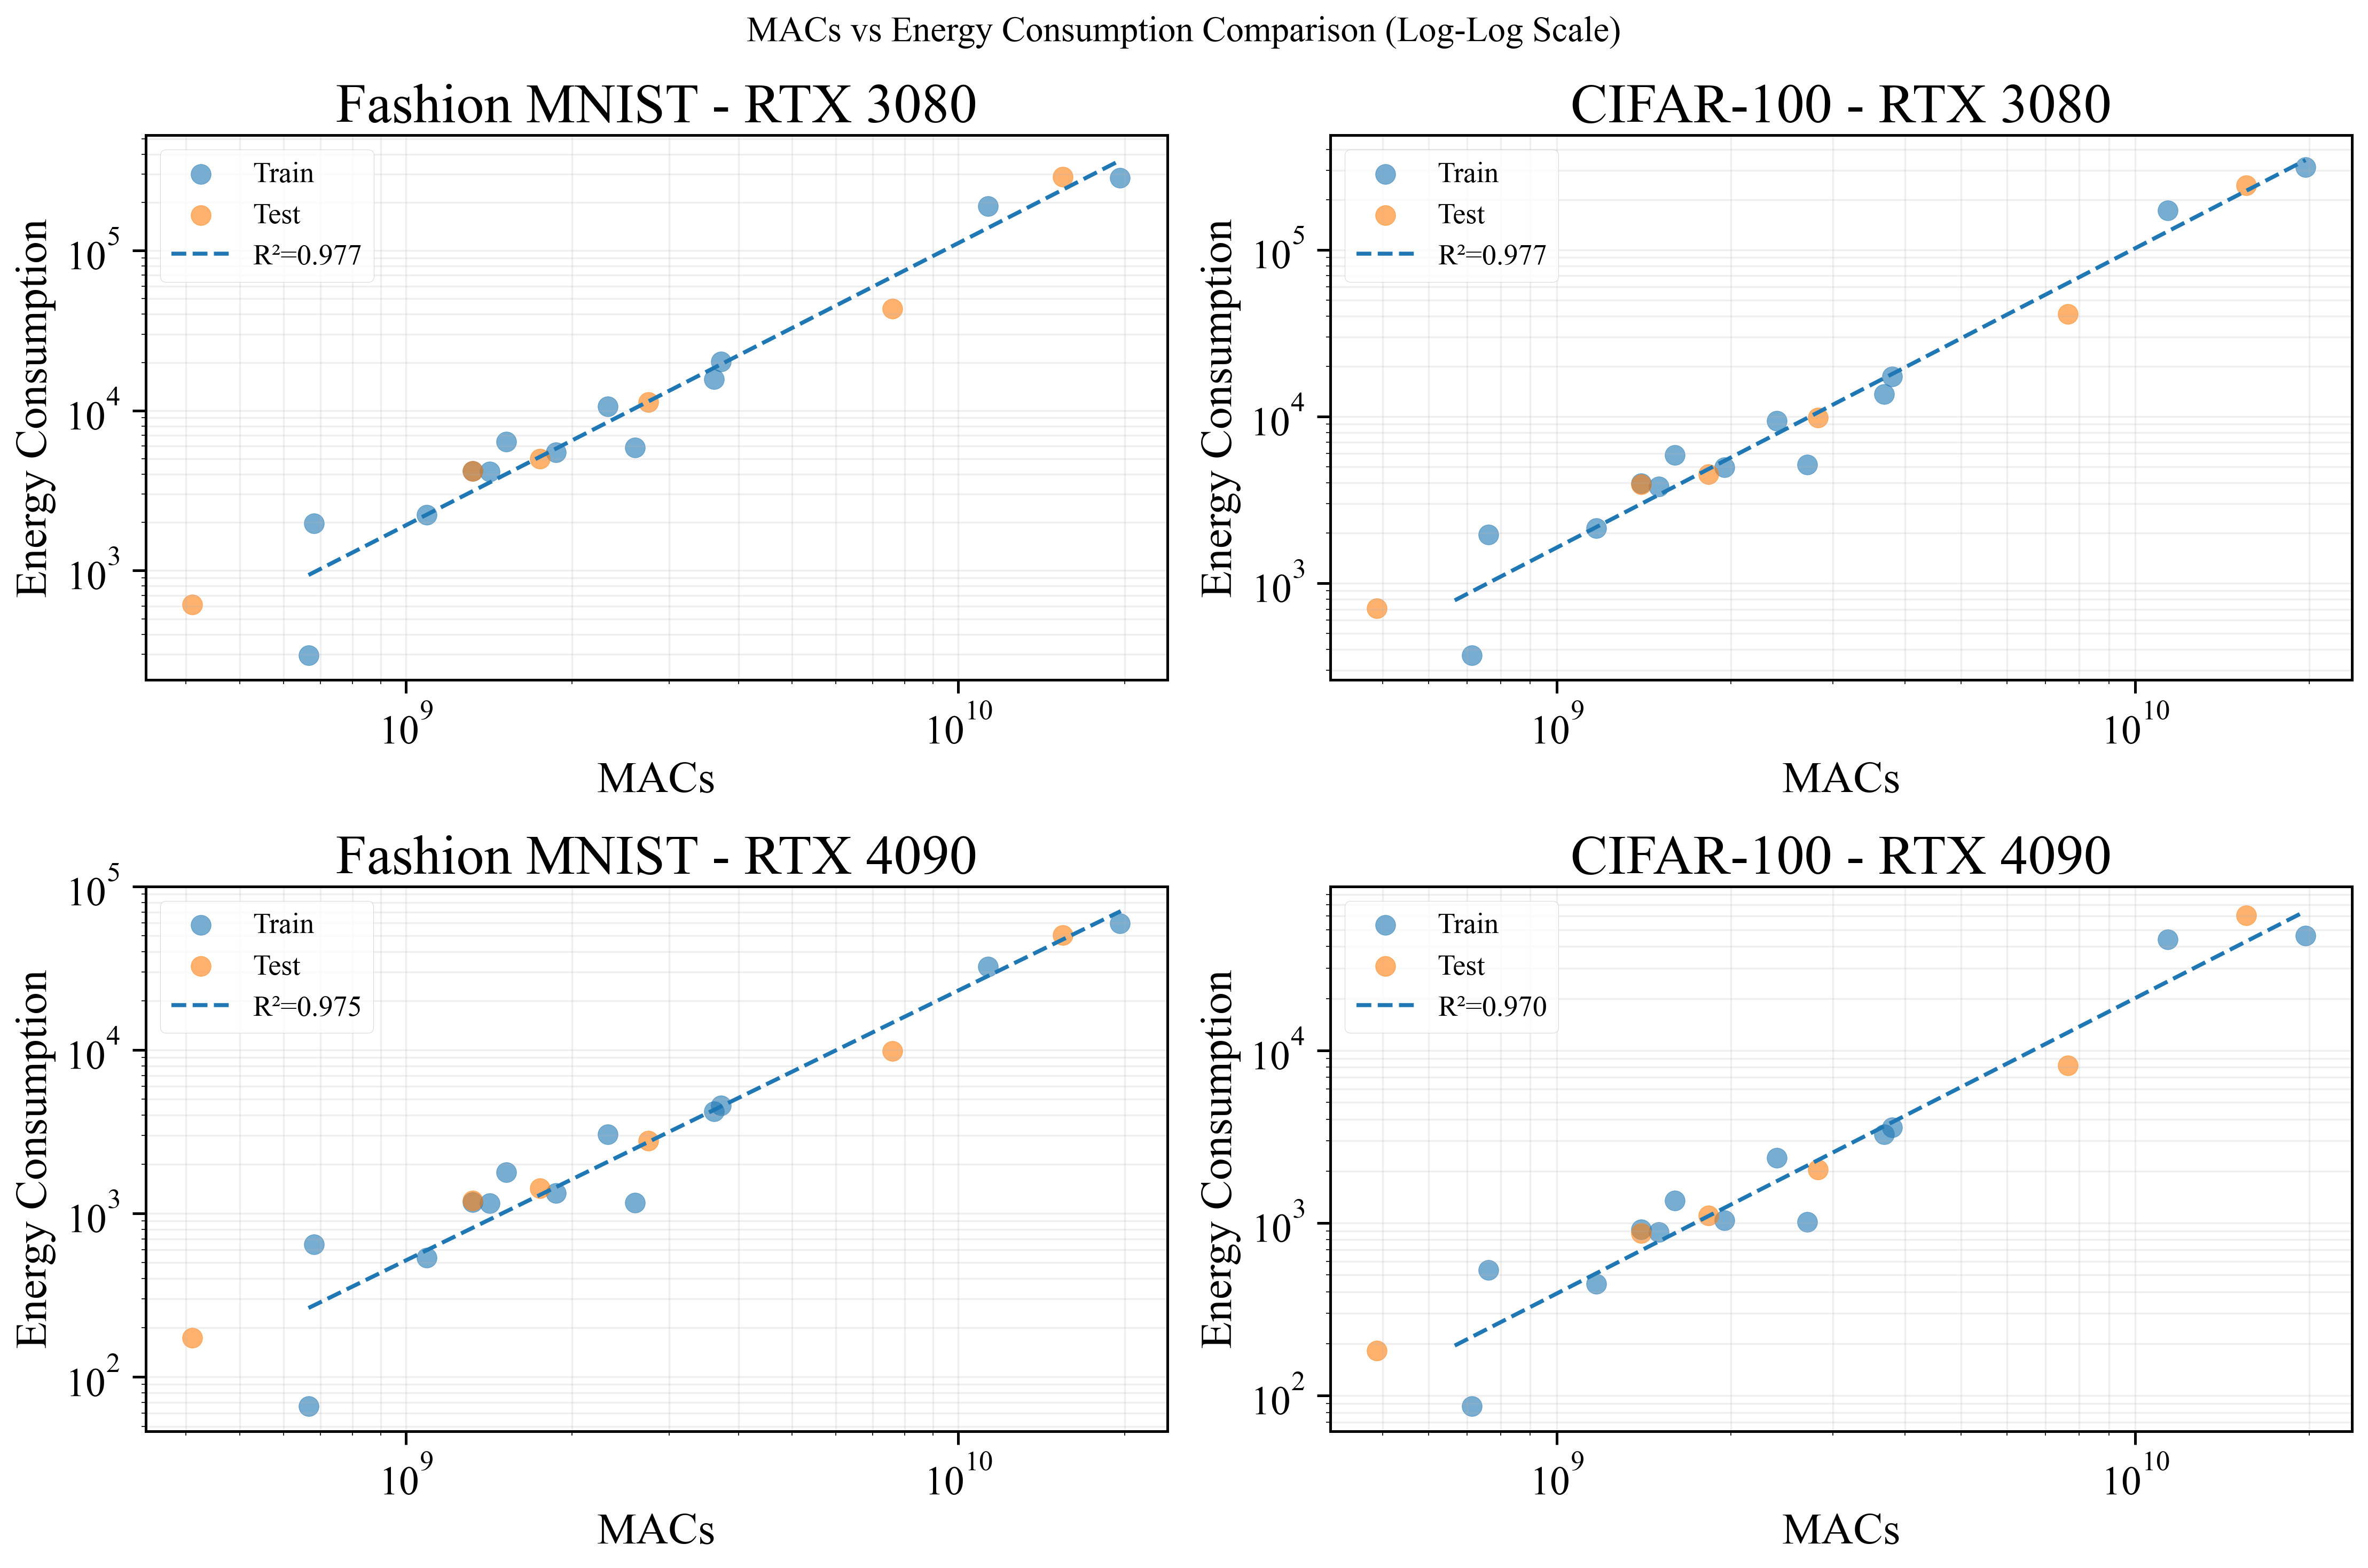

In [80]:
# Create a 2x2 subplot layout
fig, axes = plt.subplots(2, 2, figsize=(15, 10))
fig.suptitle('MACs vs Energy Consumption Comparison (Log-Log Scale)', fontsize=16)

# Common x_range for all plots (log scale)
x_min = min(macs_train_f_3080.min(), macs_train_c_3080.min(), macs_train_f_4090.min(), macs_train_c_4090.min())
x_max = max(macs_train_f_3080.max(), macs_train_c_3080.max(), macs_train_f_4090.max(), macs_train_c_4090.max())
x_range = np.logspace(np.log10(x_min), np.log10(x_max), 100).reshape(-1, 1)

# Fashion MNIST 3080
axes[0, 0].scatter(macs_train_f_3080, energy_train_f_3080, label='Train', alpha=0.6)
axes[0, 0].scatter(macs_test_f_3080, energy_test_f_3080, label='Test', alpha=0.6)
axes[0, 0].plot(
    x_range,
    10 ** model_f_3080.predict(np.log10(x_range)),
    '--',
    label=f'R²={r2_f_3080:.3f}'
)
axes[0, 0].set_title('Fashion MNIST - RTX 3080')
axes[0, 0].set_xlabel('MACs')
axes[0, 0].set_ylabel('Energy Consumption')
axes[0, 0].set_xscale('log')
axes[0, 0].set_yscale('log')
axes[0, 0].legend()
axes[0, 0].grid(True, ls="-", alpha=0.2, which='both')

# CIFAR-100 3080
axes[0, 1].scatter(macs_train_c_3080, energy_train_c_3080, label='Train', alpha=0.6)
axes[0, 1].scatter(macs_test_c_3080, energy_test_c_3080, label='Test', alpha=0.6)
axes[0, 1].plot(
    x_range,
    10 ** model_c_3080.predict(np.log10(x_range)),
    '--',
    label=f'R²={r2_c_3080:.3f}'
)
axes[0, 1].set_title('CIFAR-100 - RTX 3080')
axes[0, 1].set_xlabel('MACs')
axes[0, 1].set_ylabel('Energy Consumption')
axes[0, 1].set_xscale('log')
axes[0, 1].set_yscale('log')
axes[0, 1].legend()
axes[0, 1].grid(True, ls="-", alpha=0.2, which='both')

# Fashion MNIST 4090
axes[1, 0].scatter(macs_train_f_4090, energy_train_f_4090, label='Train', alpha=0.6)
axes[1, 0].scatter(macs_test_f_4090, energy_test_f_4090, label='Test', alpha=0.6)
axes[1, 0].plot(
    x_range,
    10 ** model_f_4090.predict(np.log10(x_range)),
    '--',
    label=f'R²={r2_f_4090:.3f}'
)
axes[1, 0].set_title('Fashion MNIST - RTX 4090')
axes[1, 0].set_xlabel('MACs')
axes[1, 0].set_ylabel('Energy Consumption')
axes[1, 0].set_xscale('log')
axes[1, 0].set_yscale('log')
axes[1, 0].legend()
axes[1, 0].grid(True, ls="-", alpha=0.2, which='both')

# CIFAR-100 4090
axes[1, 1].scatter(macs_train_c_4090, energy_train_c_4090, label='Train', alpha=0.6)
axes[1, 1].scatter(macs_test_c_4090, energy_test_c_4090, label='Test', alpha=0.6)
axes[1, 1].plot(
    x_range,
    10 ** model_c_4090.predict(np.log10(x_range)),
    '--',
    label=f'R²={r2_c_4090:.3f}'
)
axes[1, 1].set_title('CIFAR-100 - RTX 4090')
axes[1, 1].set_xlabel('MACs')
axes[1, 1].set_ylabel('Energy Consumption')
axes[1, 1].set_xscale('log')
axes[1, 1].set_yscale('log')
axes[1, 1].legend()
axes[1, 1].grid(True, ls="-", alpha=0.2, which='both')

plt.tight_layout()
plt.show()


In [81]:
energy_consumption_f3080 = np.zeros(len(macs_models))
energy_consumption_c3080 = np.zeros(len(macs_models))
energy_consumption_f4090 = np.zeros(len(macs_models))
energy_consumption_c4090 = np.zeros(len(macs_models))
print(f'len(macs_models): {len(macs_models)}')
print(f'len(total_energy_dict_f_3080.keys()): {len(total_energy_dict_f_3080.keys())}')
# go through each dictionary of total_energy_dict_f_3080, total_energy_dict_c_3080, total_energy_dict_f_4090, total_energy_dict_c_4090, 
# if the model name match the macs_models, add the total energy to the energy_consumption list

for model in total_energy_dict_f_3080.keys():
    print(model)
    model_energy_consumption_3080_f = total_energy_dict_f_3080[model]
    print(model_energy_consumption_3080_f)
    model_energy_consumption_3080_c = total_energy_dict_c_3080[model]
    print(model_energy_consumption_3080_c)
    model_energy_consumption_4090_f = total_energy_dict_f_4090[model]
    print(model_energy_consumption_4090_f)
    model_energy_consumption_4090_c = total_energy_dict_c_4090[model]
    print(model_energy_consumption_4090_c)
    print(model_energy_consumption_3080_f, model_energy_consumption_3080_c, model_energy_consumption_4090_f, model_energy_consumption_4090_c)
    for i in range(len(macs_models)):
        namei = macs_models[i]
        if namei == model:
            print(namei)
            energy_consumption_f3080[i] = model_energy_consumption_3080_f
            energy_consumption_c3080[i] = model_energy_consumption_3080_c
            energy_consumption_f4090[i] = model_energy_consumption_4090_f
            energy_consumption_c4090[i] = model_energy_consumption_4090_c
        elif namei == 'googlenet':
            print(namei, model)
            energy_consumption_f3080[i] = model_energy_consumption_3080_f
            energy_consumption_c3080[i] = model_energy_consumption_3080_c
            energy_consumption_f4090[i] = model_energy_consumption_4090_f
            energy_consumption_c4090[i] = model_energy_consumption_4090_c
        

print(energy_consumption_f3080, energy_consumption_c3080, energy_consumption_f4090, energy_consumption_c4090)

len(macs_models): 19
len(total_energy_dict_f_3080.keys()): 19
googlenet_origin
6369.781229416533
5891.637167761389
1786.501458015134
1350.2128178635114
6369.781229416533 5891.637167761389 1786.501458015134 1350.2128178635114
googlenet googlenet_origin
resnet50
10581.744209791215
9451.735848029926
3058.2385294083792
2392.143157262473
10581.744209791215 9451.735848029926 3058.2385294083792 2392.143157262473
resnet50
googlenet resnet50
resnet34
15642.585051412809
13619.78180653549
4234.080178224608
3260.289973299544
15642.585051412809 13619.78180653549 4234.080178224608 3260.289973299544
resnet34
googlenet resnet34
vgg13
189606.95335206322
171429.3962756959
32433.906223080536
44078.43957339062
189606.95335206322 171429.3962756959 32433.906223080536 44078.43957339062
vgg13
googlenet vgg13
googlenet_mod7
11311.688135393806
9860.901478997079
2796.824799310735
2045.5489968704414
11311.688135393806 9860.901478997079 2796.824799310735 2045.5489968704414
googlenet googlenet_mod7
googlenet_mod7
g

In [82]:
# plt.figure(figsize=(15, 10), dpi=300)

# # Create scatter plots for 3080
# plt.scatter(model_macs_fashionmnist, energy_consumption_f3080, label='3080 (Fashion MNIST)', marker='o', alpha=0.7)
# plt.scatter(model_macs_cifar100, energy_consumption_c3080, label='3080 (CIFAR-100)', marker='s', alpha=0.7)

# # Create scatter plots for 4090
# plt.scatter(model_macs_fashionmnist, energy_consumption_f4090, label='4090 (Fashion MNIST)', marker='^', alpha=0.7)
# plt.scatter(model_macs_cifar100, energy_consumption_c4090, label='4090 (CIFAR-100)', marker='D', alpha=0.7)

# # Add annotations for all points with adjusted offsets to prevent overlap
# offsets = [(-60, -20), (10, 10), (-60, 20), (10, -20)]  # Different offsets for each point type
# for i, model in enumerate(macs_models):
#     # Replace model names with proper capitalization
#     label = (model.replace('alexnet', 'AlexNet')
#                  .replace('googlenet', 'GoogleNet')
#                  .replace('resnet', 'ResNet')
#                  .replace('vgg', 'VGG'))
    
#     # Label Fashion MNIST points with different offsets
#     plt.annotate(label, 
#                 (model_macs_fashionmnist[i], energy_consumption_f3080[i]),
#                 xytext=offsets[0], 
#                 textcoords='offset points',
#                 fontsize=12,
#                 arrowprops=dict(arrowstyle='->', connectionstyle='arc3,rad=0.2'))
#     plt.annotate(label, 
#                 (model_macs_fashionmnist[i], energy_consumption_f4090[i]),
#                 xytext=offsets[1], 
#                 textcoords='offset points',
#                 fontsize=12,
#                 arrowprops=dict(arrowstyle='->', connectionstyle='arc3,rad=-0.2'))
    
#     # Label CIFAR-100 points with different offsets
#     plt.annotate(label, 
#                 (model_macs_cifar100[i], energy_consumption_c3080[i]),
#                 xytext=offsets[2], 
#                 textcoords='offset points',
#                 fontsize=12,
#                 arrowprops=dict(arrowstyle='->', connectionstyle='arc3,rad=0.2'))
#     plt.annotate(label, 
#                 (model_macs_cifar100[i], energy_consumption_c4090[i]),
#                 xytext=offsets[3], 
#                 textcoords='offset points',
#                 fontsize=12,
#                 arrowprops=dict(arrowstyle='->', connectionstyle='arc3,rad=-0.2'))

# plt.xscale('log')  # Set x-axis to logarithmic scale
# plt.yscale('log')  # Set y-axis to logarithmic scale

# plt.xlabel('MACs (Multiply-Accumulate Operations) - Log Scale')
# plt.ylabel('Energy Consumption (Joules) - Log Scale')
# plt.title('Energy Consumption vs. MACs Comparison between RTX 3080 and RTX 4090')
# plt.grid(True, which="both", ls="-", alpha=0.2)
# # Customize legend - moved to bottom right
# plt.legend(loc='lower right', bbox_to_anchor=(0.98, 0.02),
#           frameon=True, fancybox=True, shadow=True,
#           borderpad=1, labelspacing=1, ncol=2)
# plt.tight_layout()

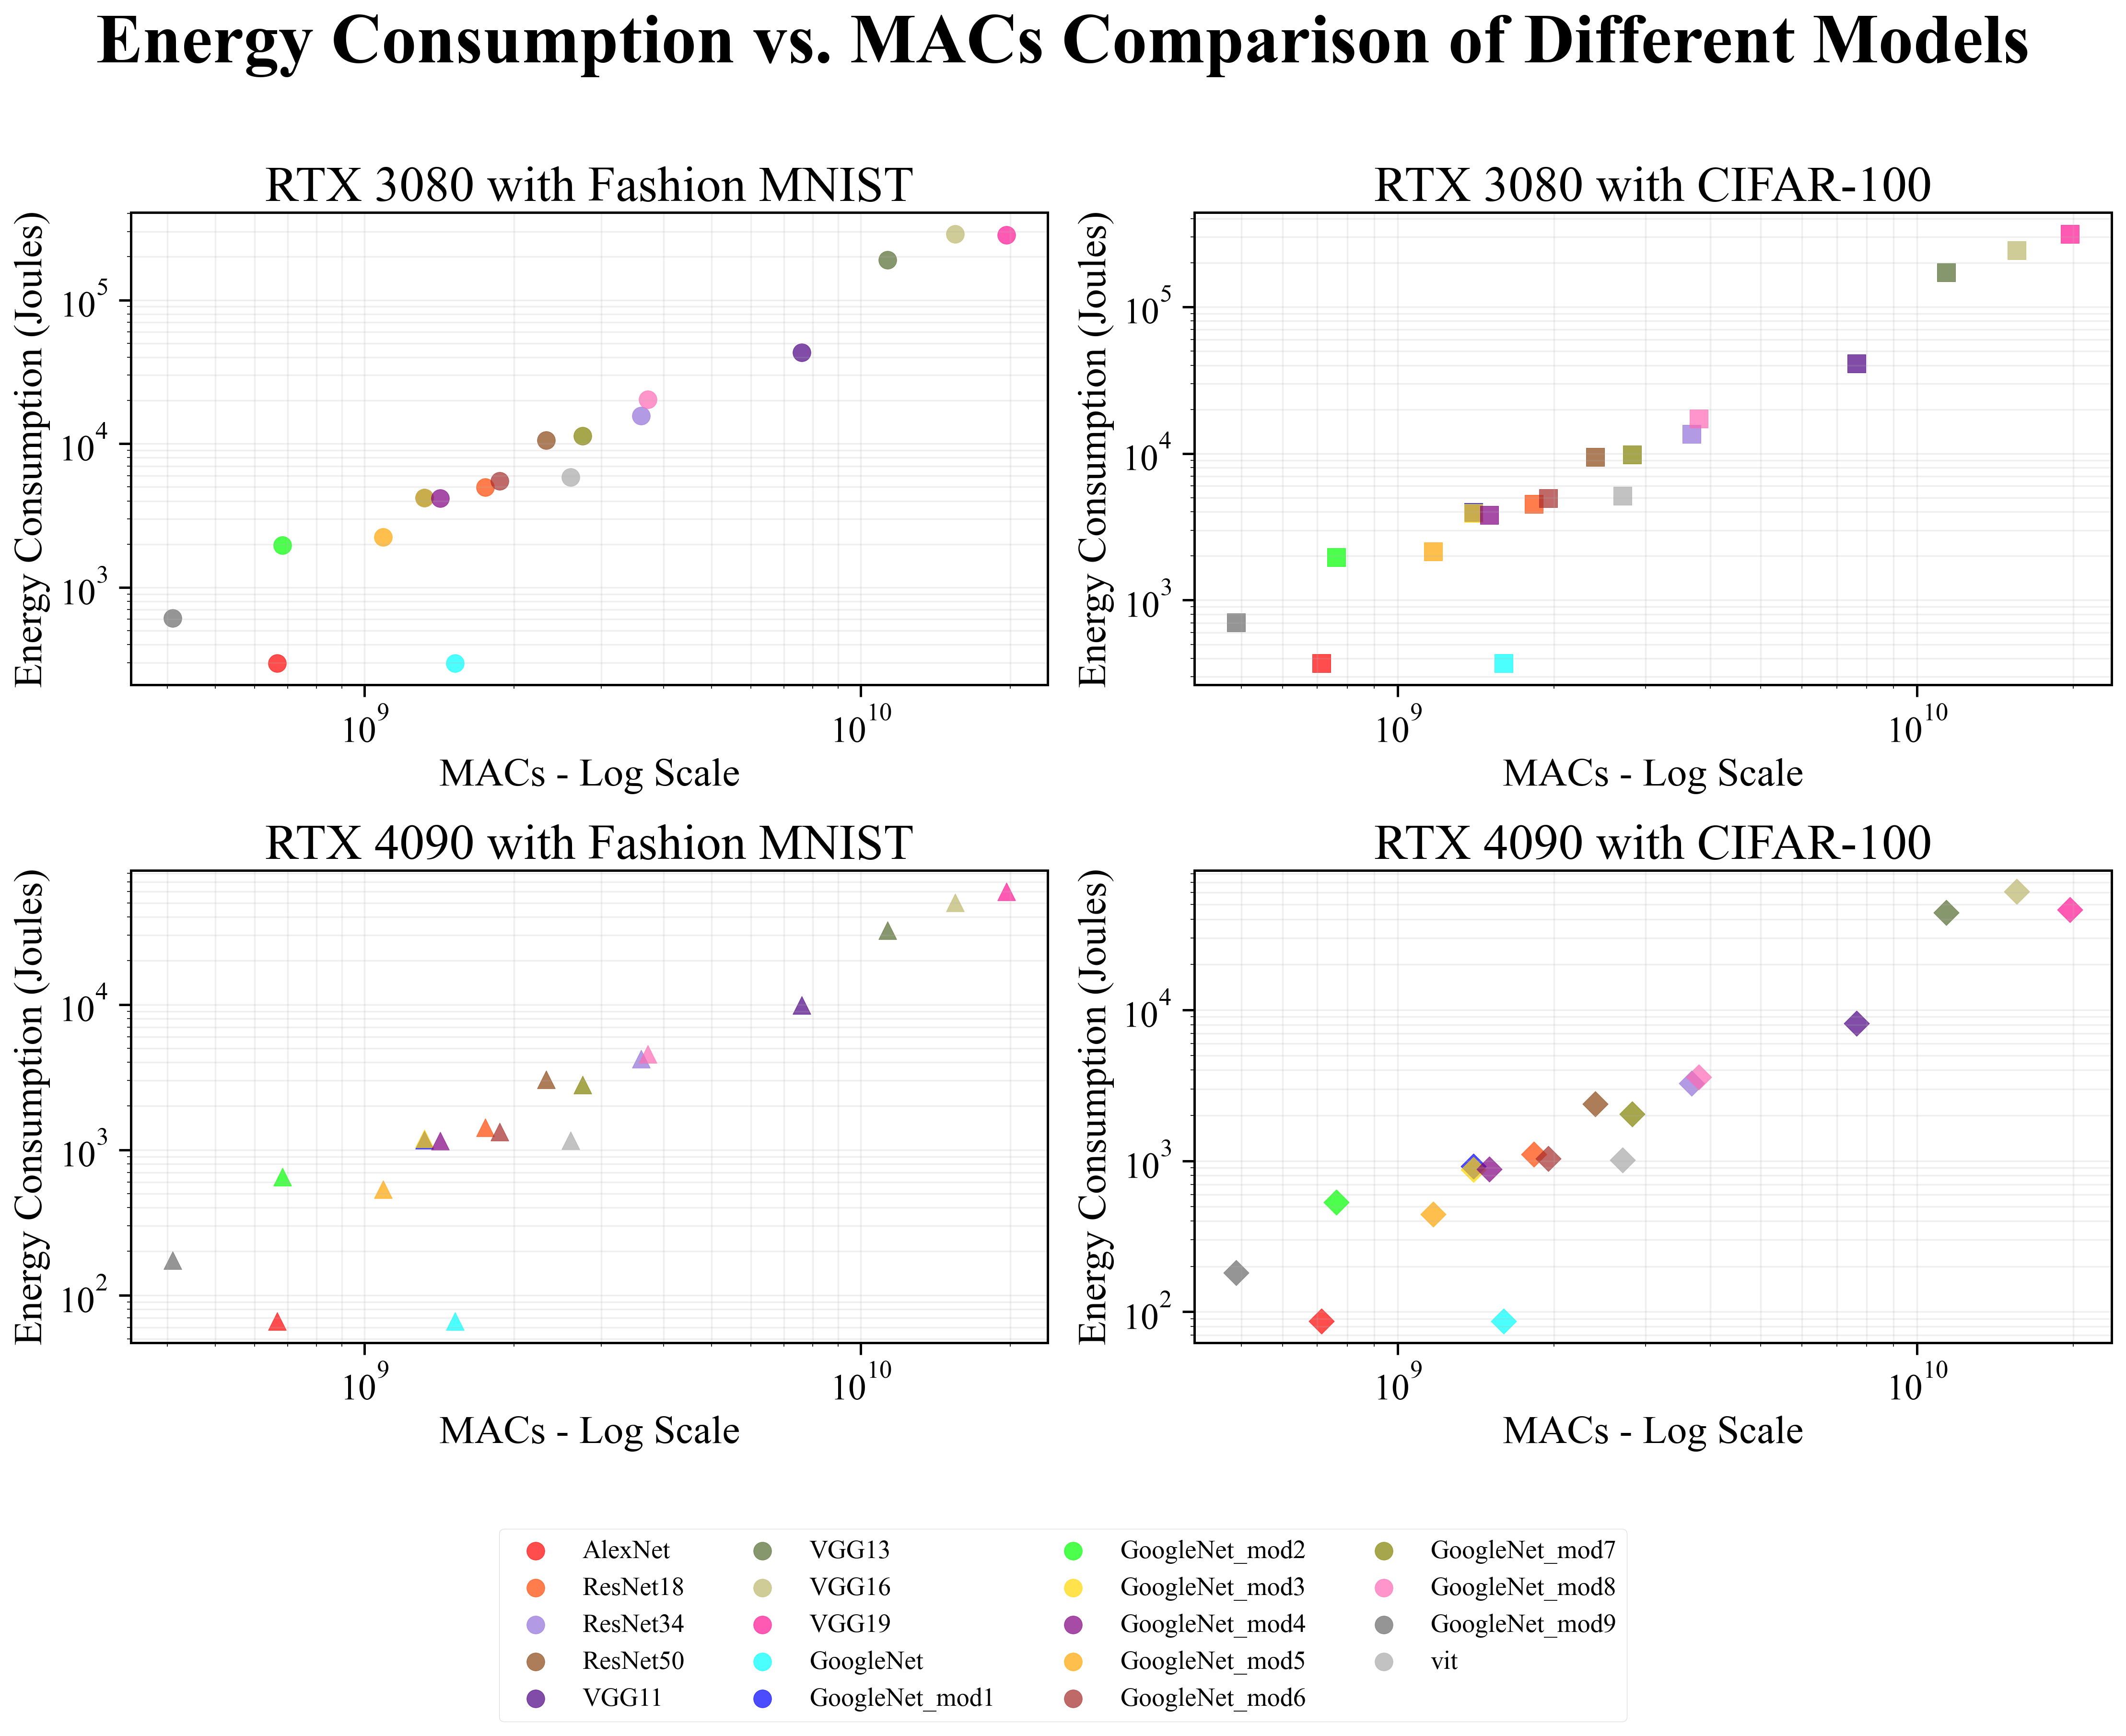

In [83]:
# Create a 2x2 subplot figure
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(15, 10), dpi=300)

# Define colors for each model
model_colors = {
    'alexnet': '#FF0000',           # Red
    'googlenet': '#00FFFF',         # Cyan
    'googlenet_mod1': '#0000FF',    # Blue
    'googlenet_mod2': '#00FF00',    # Green
    'googlenet_mod3': '#FFD700',    # Gold
    'googlenet_mod4': '#800080',    # Purple
    'googlenet_mod5': '#FFA500',    # Orange
    'googlenet_mod6': '#A52A2A',    # Brown
    'googlenet_mod7': '#808000',    # Olive
    'googlenet_mod8': '#FF69B4',    # Hot Pink
    'googlenet_mod9': '#696969',    # Dim Gray
    'resnet18': '#FF4500',          # Orange Red
    'resnet34': '#9370DB',          # Medium Purple
    'resnet50': '#8B4513',          # Saddle Brown
    'vgg11': '#4B0082',             # Indigo
    'vgg13': '#556B2F',             # Dark Olive Green
    'vgg16': '#BDB76B',             # Dark Khaki
    'vgg19': '#FF1493',             # Deep Pink
    'vit': '#A9A9A9',               # Dark Gray
    'mobilenetv1': '#20B2AA',       # Light Sea Green
    'mobilenetv2': '#DA70D6'        # Orchid
}

# Figure 1: RTX 3080 with Fashion MNIST
for i, model in enumerate(macs_models):
    label = (model.replace('alexnet', 'AlexNet')
                 .replace('googlenet', 'GoogleNet')
                 .replace('resnet', 'ResNet')
                 .replace('vgg', 'VGG')
                 .replace('mobilenetv1', 'MobileNetV1')
                 .replace('mobilenetv2', 'MobileNetV2'))
    ax1.scatter(model_macs_fashionmnist[i], energy_consumption_f3080[i], 
                label=label if ax1 == ax1 else "", # Only add label in first plot
                color=model_colors[model.lower()], # model.lower() will match dictionary key
                marker='o', 
                alpha=0.7)

ax1.set_xscale('log')
ax1.set_yscale('log')
ax1.set_xlabel('MACs - Log Scale')
ax1.set_ylabel('Energy Consumption (Joules)')
ax1.set_title('RTX 3080 with Fashion MNIST')
ax1.grid(True, which="both", ls="-", alpha=0.2)

# Figure 2: RTX 3080 with CIFAR-100
for i, model in enumerate(macs_models):
    ax2.scatter(model_macs_cifar100[i], energy_consumption_c3080[i],
                color=model_colors[model.lower()],
                marker='s', 
                alpha=0.7)

ax2.set_xscale('log')
ax2.set_yscale('log')
ax2.set_xlabel('MACs - Log Scale')
ax2.set_ylabel('Energy Consumption (Joules)')
ax2.set_title('RTX 3080 with CIFAR-100')
ax2.grid(True, which="both", ls="-", alpha=0.2)

# Figure 3: RTX 4090 with Fashion MNIST
for i, model in enumerate(macs_models):
    ax3.scatter(model_macs_fashionmnist[i], energy_consumption_f4090[i],
                color=model_colors[model.lower()],
                marker='^', 
                alpha=0.7)

ax3.set_xscale('log')
ax3.set_yscale('log')
ax3.set_xlabel('MACs - Log Scale')
ax3.set_ylabel('Energy Consumption (Joules)')
ax3.set_title('RTX 4090 with Fashion MNIST')
ax3.grid(True, which="both", ls="-", alpha=0.2)

# Figure 4: RTX 4090 with CIFAR-100
for i, model in enumerate(macs_models):
    ax4.scatter(model_macs_cifar100[i], energy_consumption_c4090[i],
                color=model_colors[model.lower()],
                marker='D', 
                alpha=0.7)

ax4.set_xscale('log')
ax4.set_yscale('log')
ax4.set_xlabel('MACs - Log Scale')
ax4.set_ylabel('Energy Consumption (Joules)')
ax4.set_title('RTX 4090 with CIFAR-100')
ax4.grid(True, which="both", ls="-", alpha=0.2)

# Add a unified legend at the bottom
plt.figlegend(ax1.get_legend_handles_labels()[0], 
              ax1.get_legend_handles_labels()[1],
              loc='center',
              bbox_to_anchor=(0.5, -0.1),
              ncol=4)

plt.suptitle('Energy Consumption vs. MACs Comparison of Different Models', y=1.02, fontsize=35, fontweight='bold')
plt.tight_layout()

In [84]:
# # Define colors for each model
# model_colors = {
#     'alexnet': '#FF0000',           # Red
#     'googlenet': '#00FFFF',         # Cyan
#     'googlenet_mod1': '#0000FF',    # Blue
#     'googlenet_mod2': '#00FF00',    # Green
#     'googlenet_mod3': '#FFD700',    # Gold
#     'googlenet_mod4': '#800080',    # Purple
#     'googlenet_mod5': '#FFA500',    # Orange
#     'googlenet_mod6': '#A52A2A',    # Brown
#     'googlenet_mod7': '#808000',    # Olive
#     'googlenet_mod8': '#FF69B4',    # Hot Pink
#     'googlenet_mod9': '#696969',    # Dim Gray
#     'resnet18': '#FF4500',          # Orange Red
#     'resnet34': '#9370DB',          # Medium Purple
#     'resnet50': '#8B4513',          # Saddle Brown
#     'vgg11': '#4B0082',             # Indigo
#     'vgg13': '#556B2F',             # Dark Olive Green
#     'vgg16': '#BDB76B',             # Dark Khaki
#     'vgg19': '#FF1493',             # Deep Pink
#     'vit': '#A9A9A9',               # Dark Gray
#     'mobilenetv1': '#20B2AA',       # Light Sea Green
#     'mobilenetv2': '#DA70D6'        # Orchid
# }
# # Create individual figures for each hardware and dataset combination
# datasets = ['Fashion MNIST', 'CIFAR-100']
# hardware = ['RTX 3080', 'RTX 4090']
# macs_data = [model_macs_fashionmnist, model_macs_cifar100]
# energy_data = {
#     'RTX 3080': [energy_consumption_f3080, energy_consumption_c3080],
#     'RTX 4090': [energy_consumption_f4090, energy_consumption_c4090]
# }
# markers = ['o', 's']
# colors = plt.cm.tab10(np.linspace(0, 1, len(macs_models)))

# # Plot each combination as a separate figure
# for i, hw in enumerate(hardware):
#     for j, ds in enumerate(datasets):
#         # Create a new figure for each combination
#         plt.figure(figsize=(16, 12))
        
#         # Get data for this combination
#         x = np.array(macs_data[j])
#         y = np.array(energy_data[hw][j])
        
#         # Plot scatter points for each model
#         for k, model in enumerate(macs_models):
#             plt.scatter(x[k], y[k], alpha=0.7, 
#                       label=model, 
#                       marker=markers[j], 
#                       color=colors[k],
#                       s=200)  # Increased point size
        
#         # Create line of best fit
#         mask = (x > 0) & (y > 0)  # Only use positive values
#         x_fit = x[mask]
#         y_fit = y[mask]
        
#         if len(x_fit) > 1:  # Need at least 2 points for a fit
#             # Perform the fit on log-transformed data
#             z = np.polyfit(np.log10(x_fit), np.log10(y_fit), 1)
#             p = np.poly1d(z)
            
#             # Generate points for the line
#             x_range = np.logspace(np.log10(min(x_fit)), np.log10(max(x_fit)), 100)
#             y_range = 10**p(np.log10(x_range))
            
#             # Plot the line
#             plt.plot(x_range, y_range, 'r--', label=f'Trend (slope: {z[0]:.2f})')
        
#         # Set scales to logarithmic
#         plt.xscale('log')
#         plt.yscale('log')
        
#         # Add labels and title
#         plt.xlabel('MACs (Multiply-Accumulate Operations)', fontsize=25)
#         plt.ylabel('Energy Consumption (Joules)', fontsize=25)
#         plt.title(f'Energy Consumption vs. MACs for {ds} on {hw}', fontsize=35)
        
#         # Add grid
#         plt.grid(True, which="both", ls="-", alpha=0.2)
        
#         # Add legend
#         plt.legend(loc='best', fontsize=14)
        
#         # Adjust layout
#         plt.tight_layout()
        
#         # Save the figure
#         plt.savefig(f'power_consumption_{hw.replace(" ", "_")}_{ds.replace(" ", "_")}.pdf', 
#                    format='pdf', dpi=300, bbox_inches='tight')


In [85]:
print(model_macs_fashionmnist, '\n', energy_consumption_f3080)

[666410000.0, 1750000000.0, 3610000000.0, 2320000000.0, 7600000000.0, 11310000000.0, 15480000000.0, 19630000000.0, 1520000000.0, 1320000000.0, 682580000.0, 1320000000.0, 1420000000.0, 1090000000.0, 1870000000.0, 2750000000.0, 3720000000.0, 410090000.0, 2600000000.0] 
 [   295.97153644   4995.36328261  15642.58505141  10581.74420979
  43143.81868791 189606.95335206 287872.58915848 283542.68611154
    295.97153644   4203.49603162   1967.68262504   4198.58976104
   4165.53926047   2236.46437045   5485.5865794   11311.68813539
  20239.91384664    612.82971701   5866.94295596]


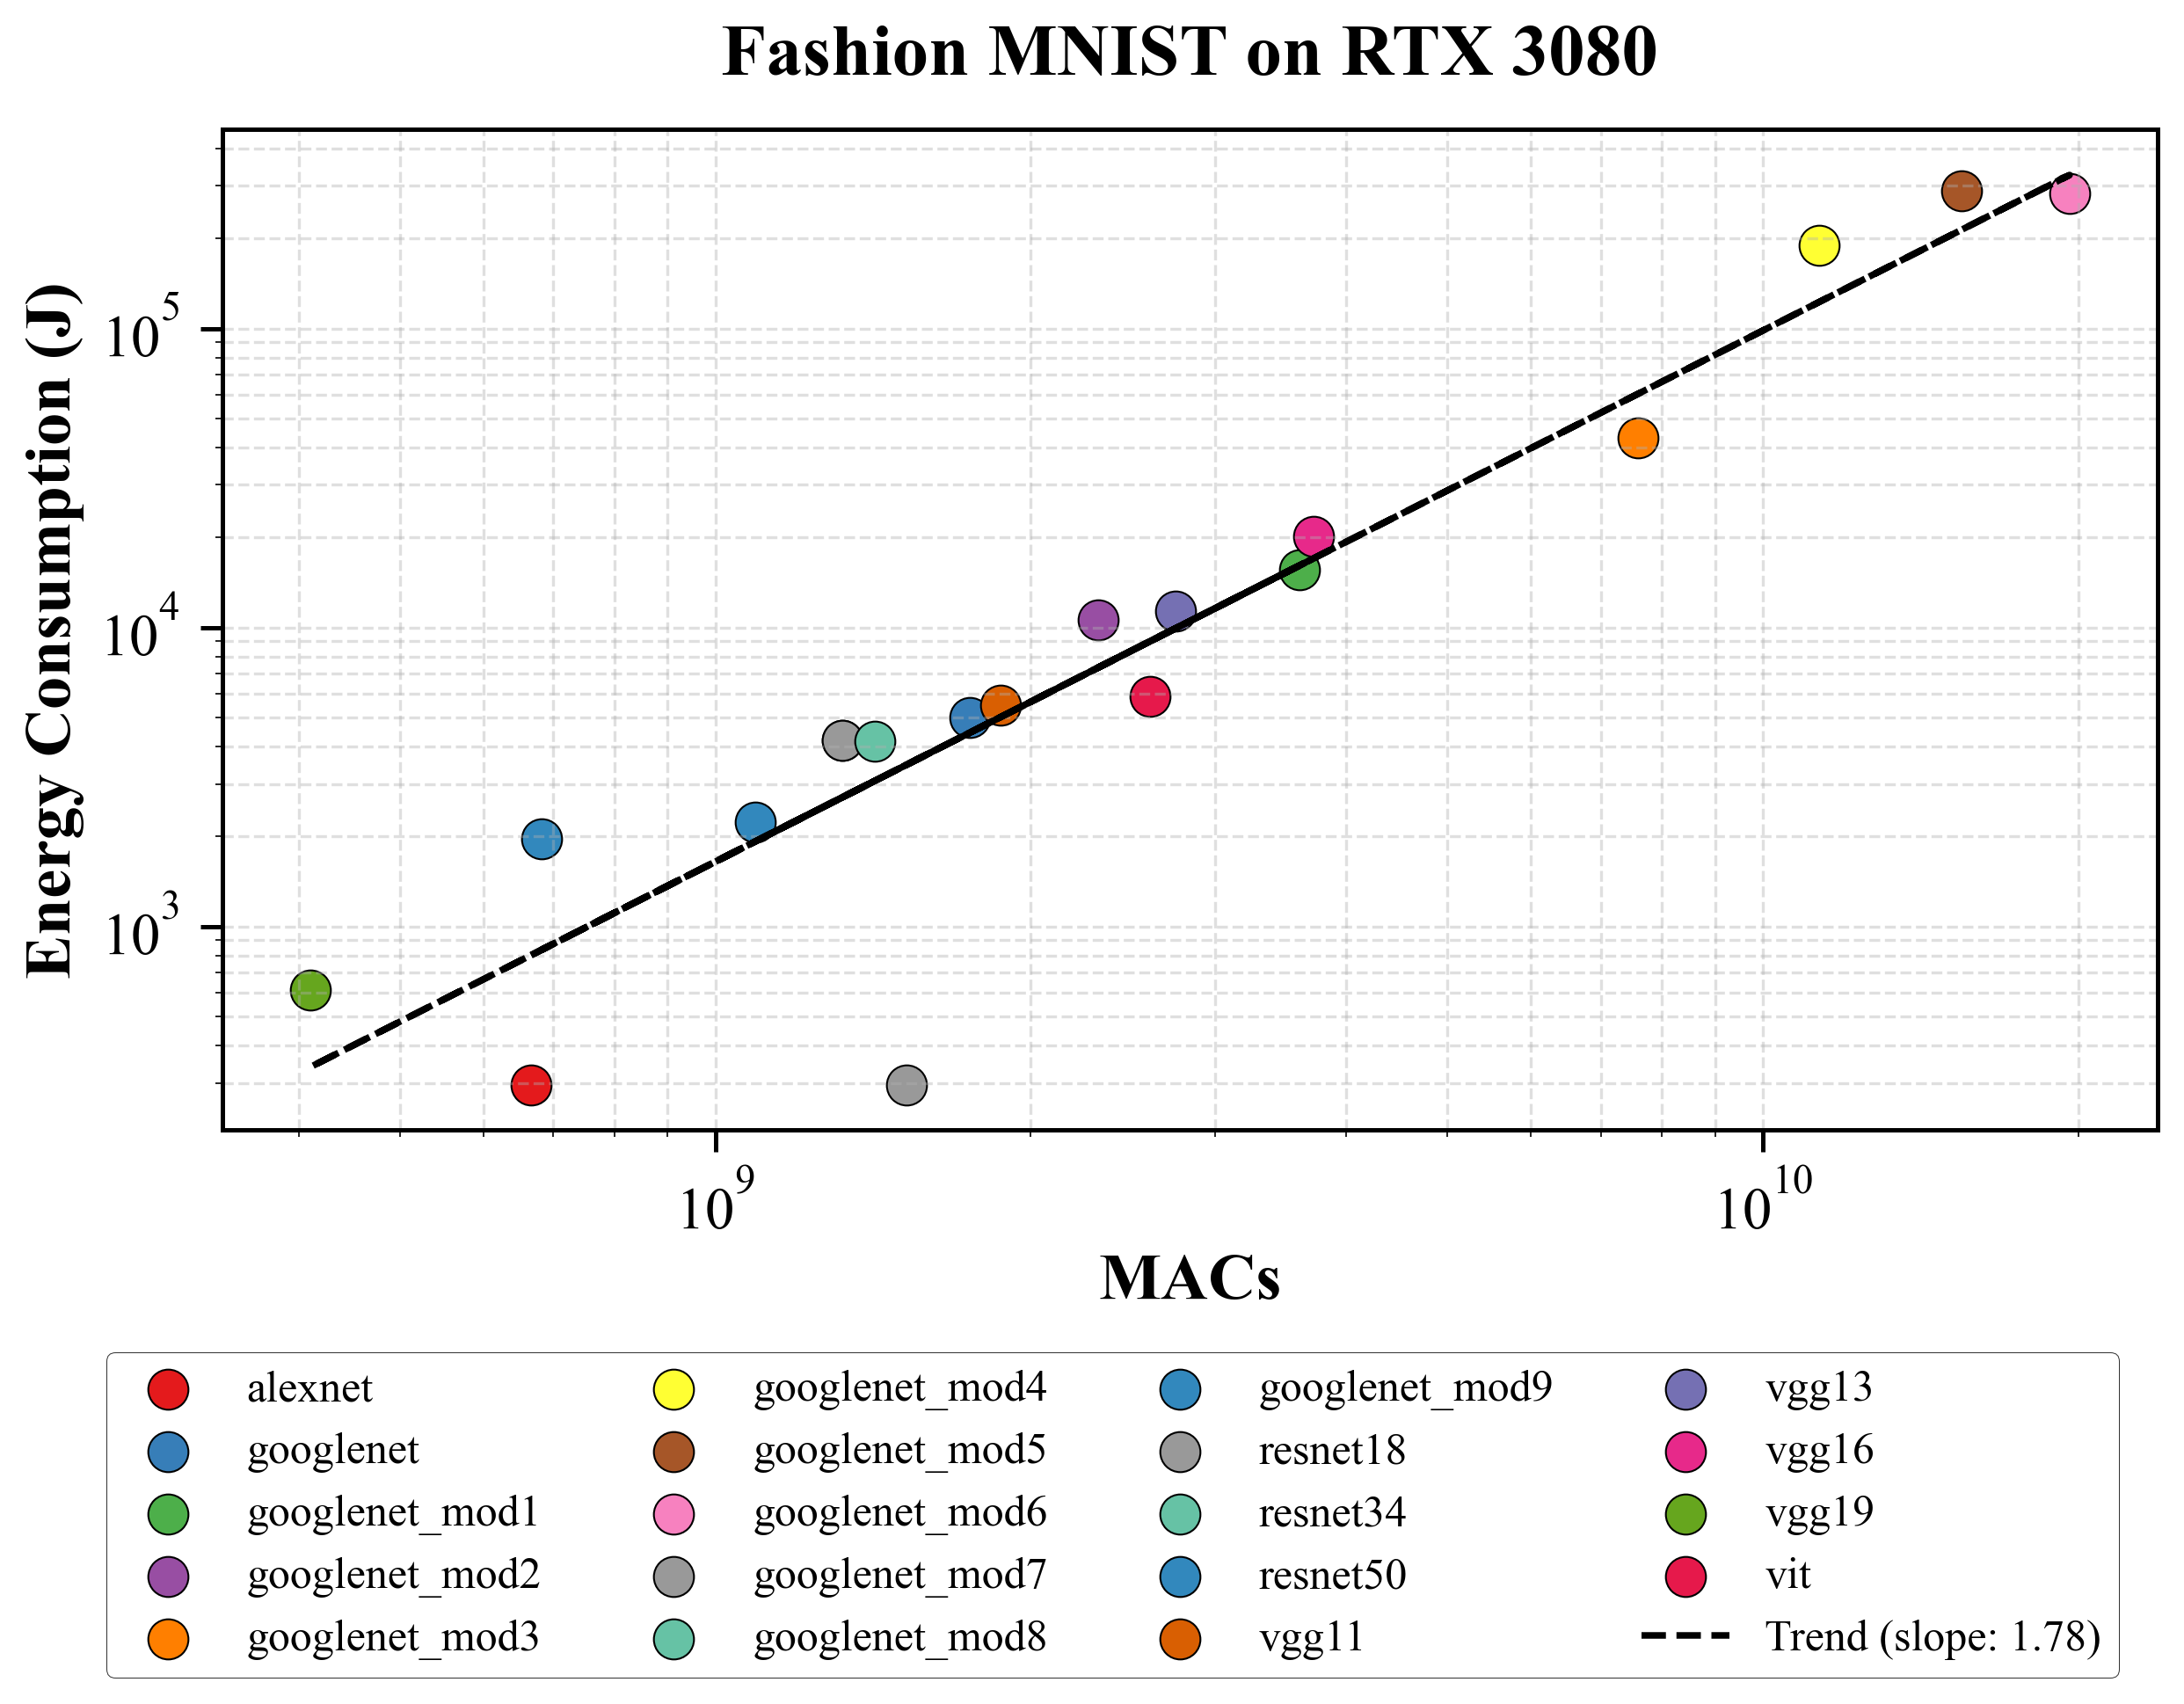

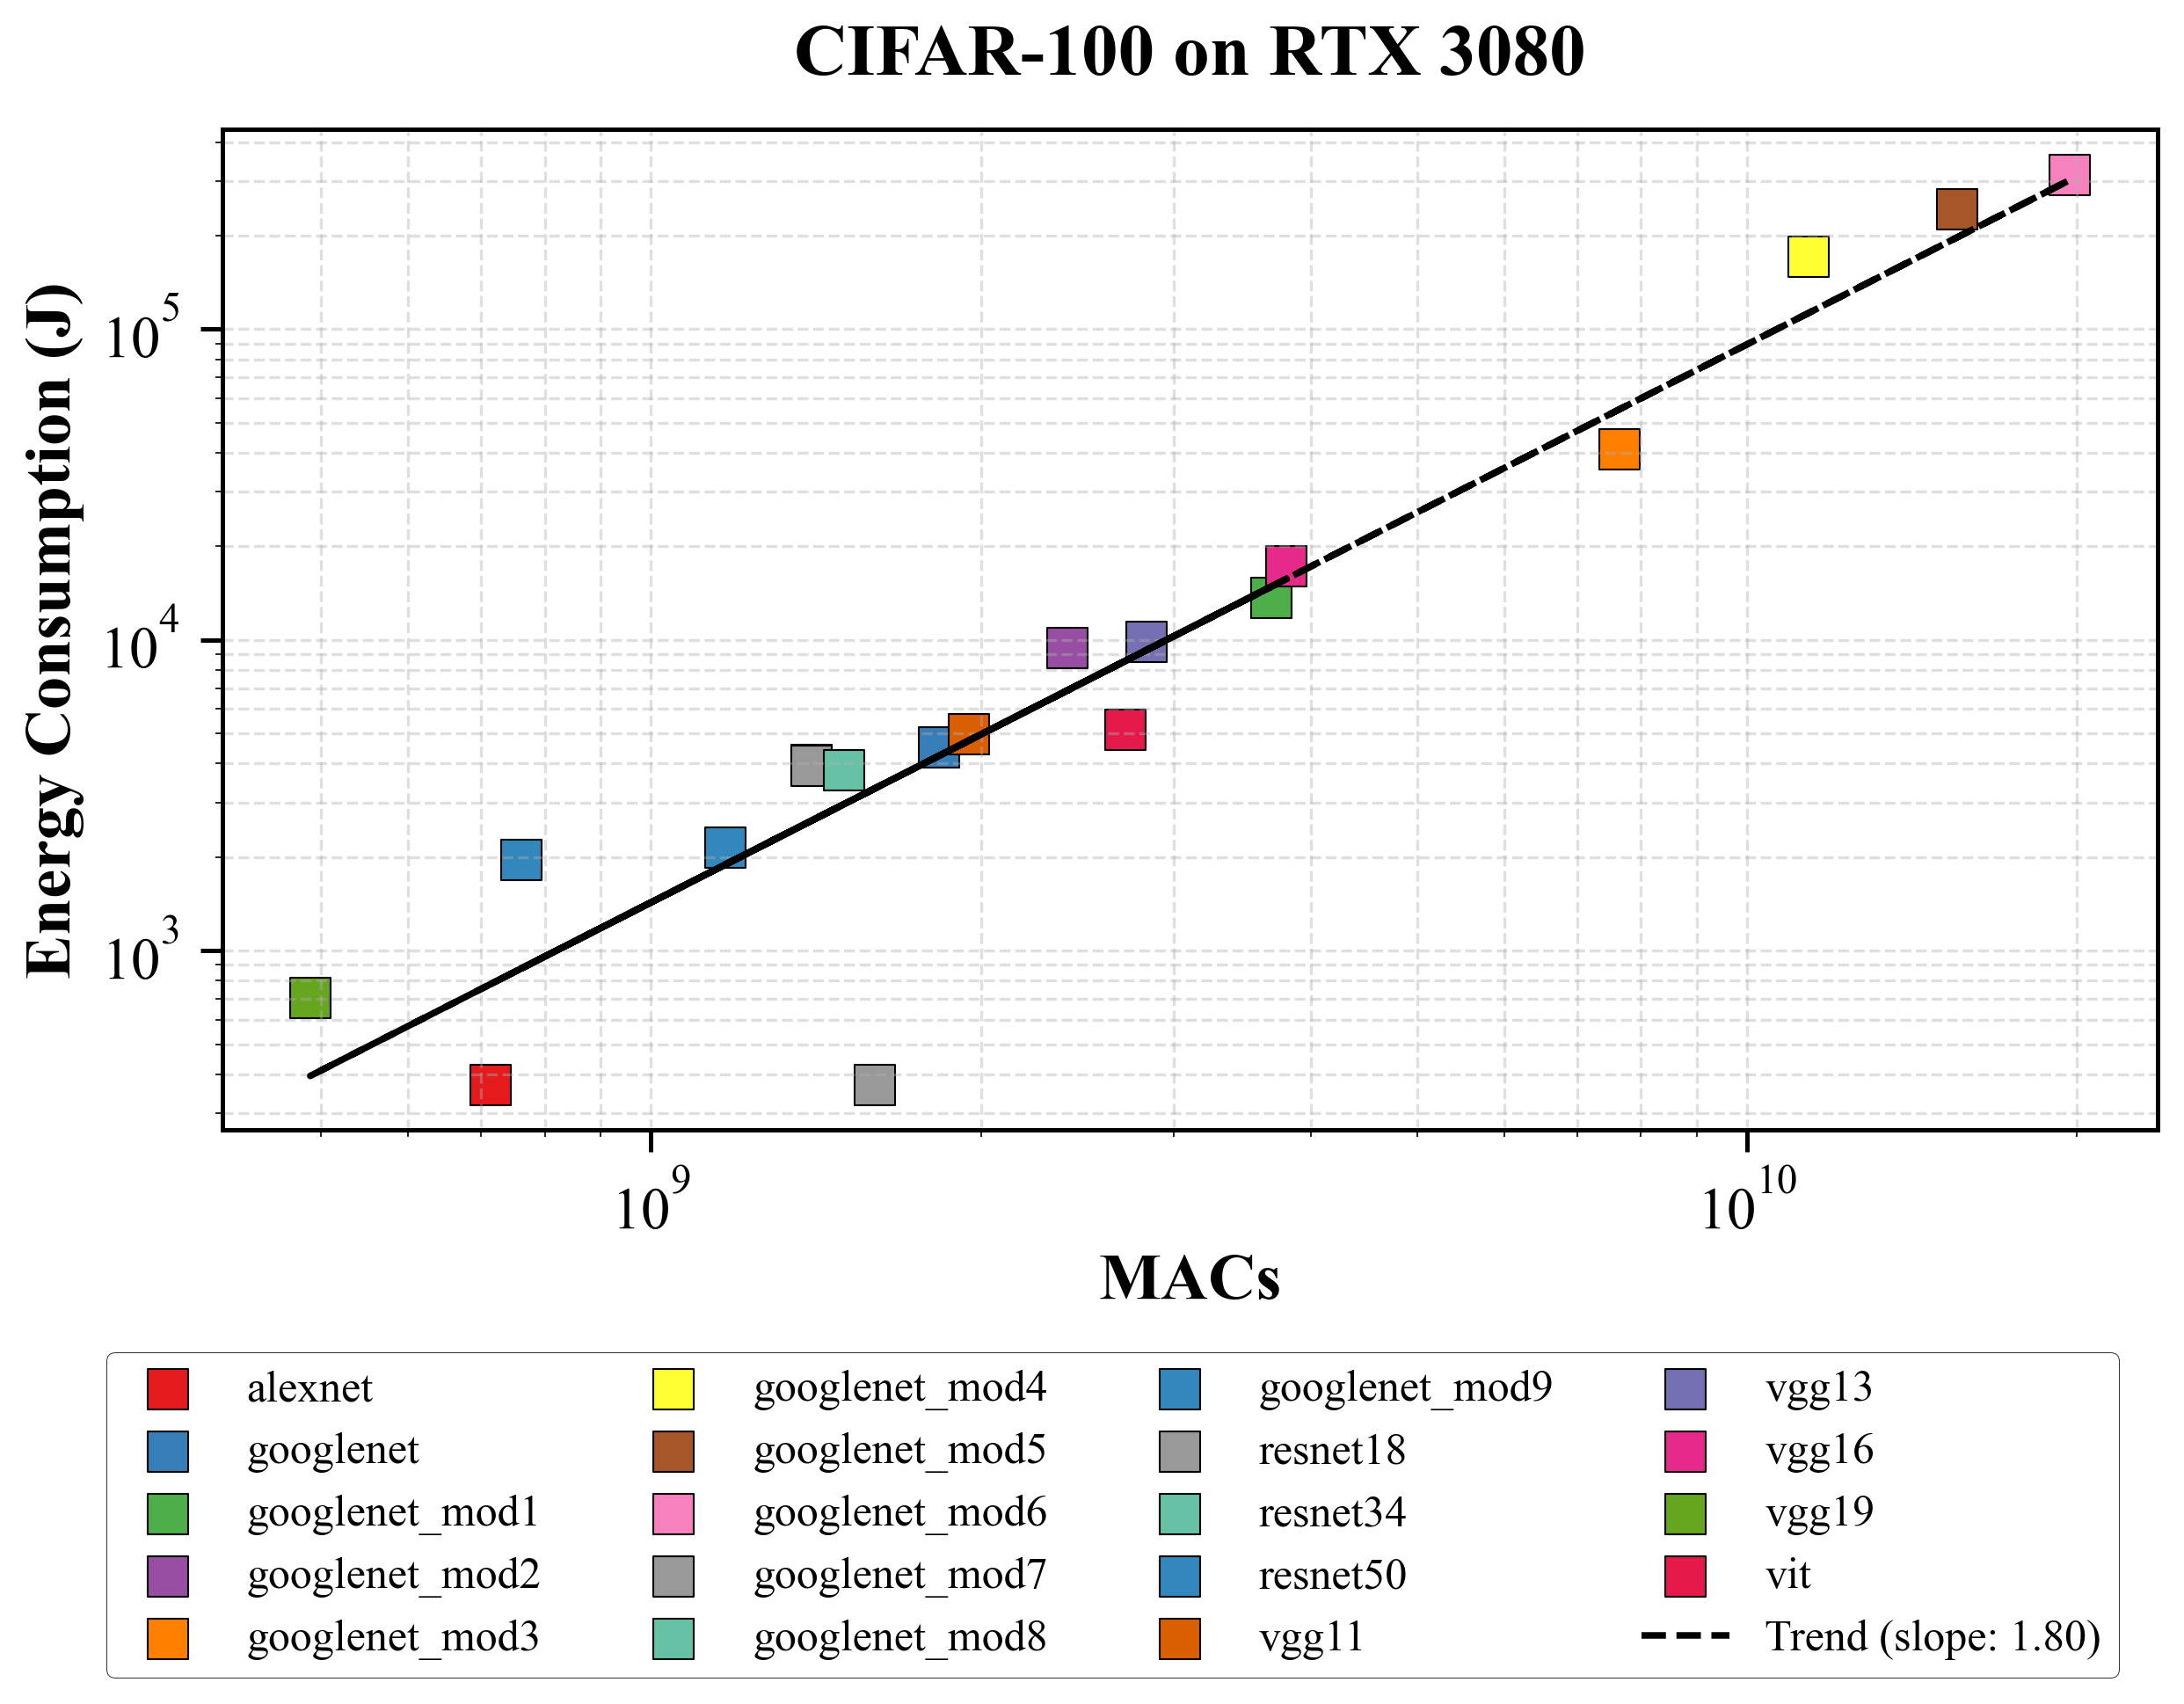

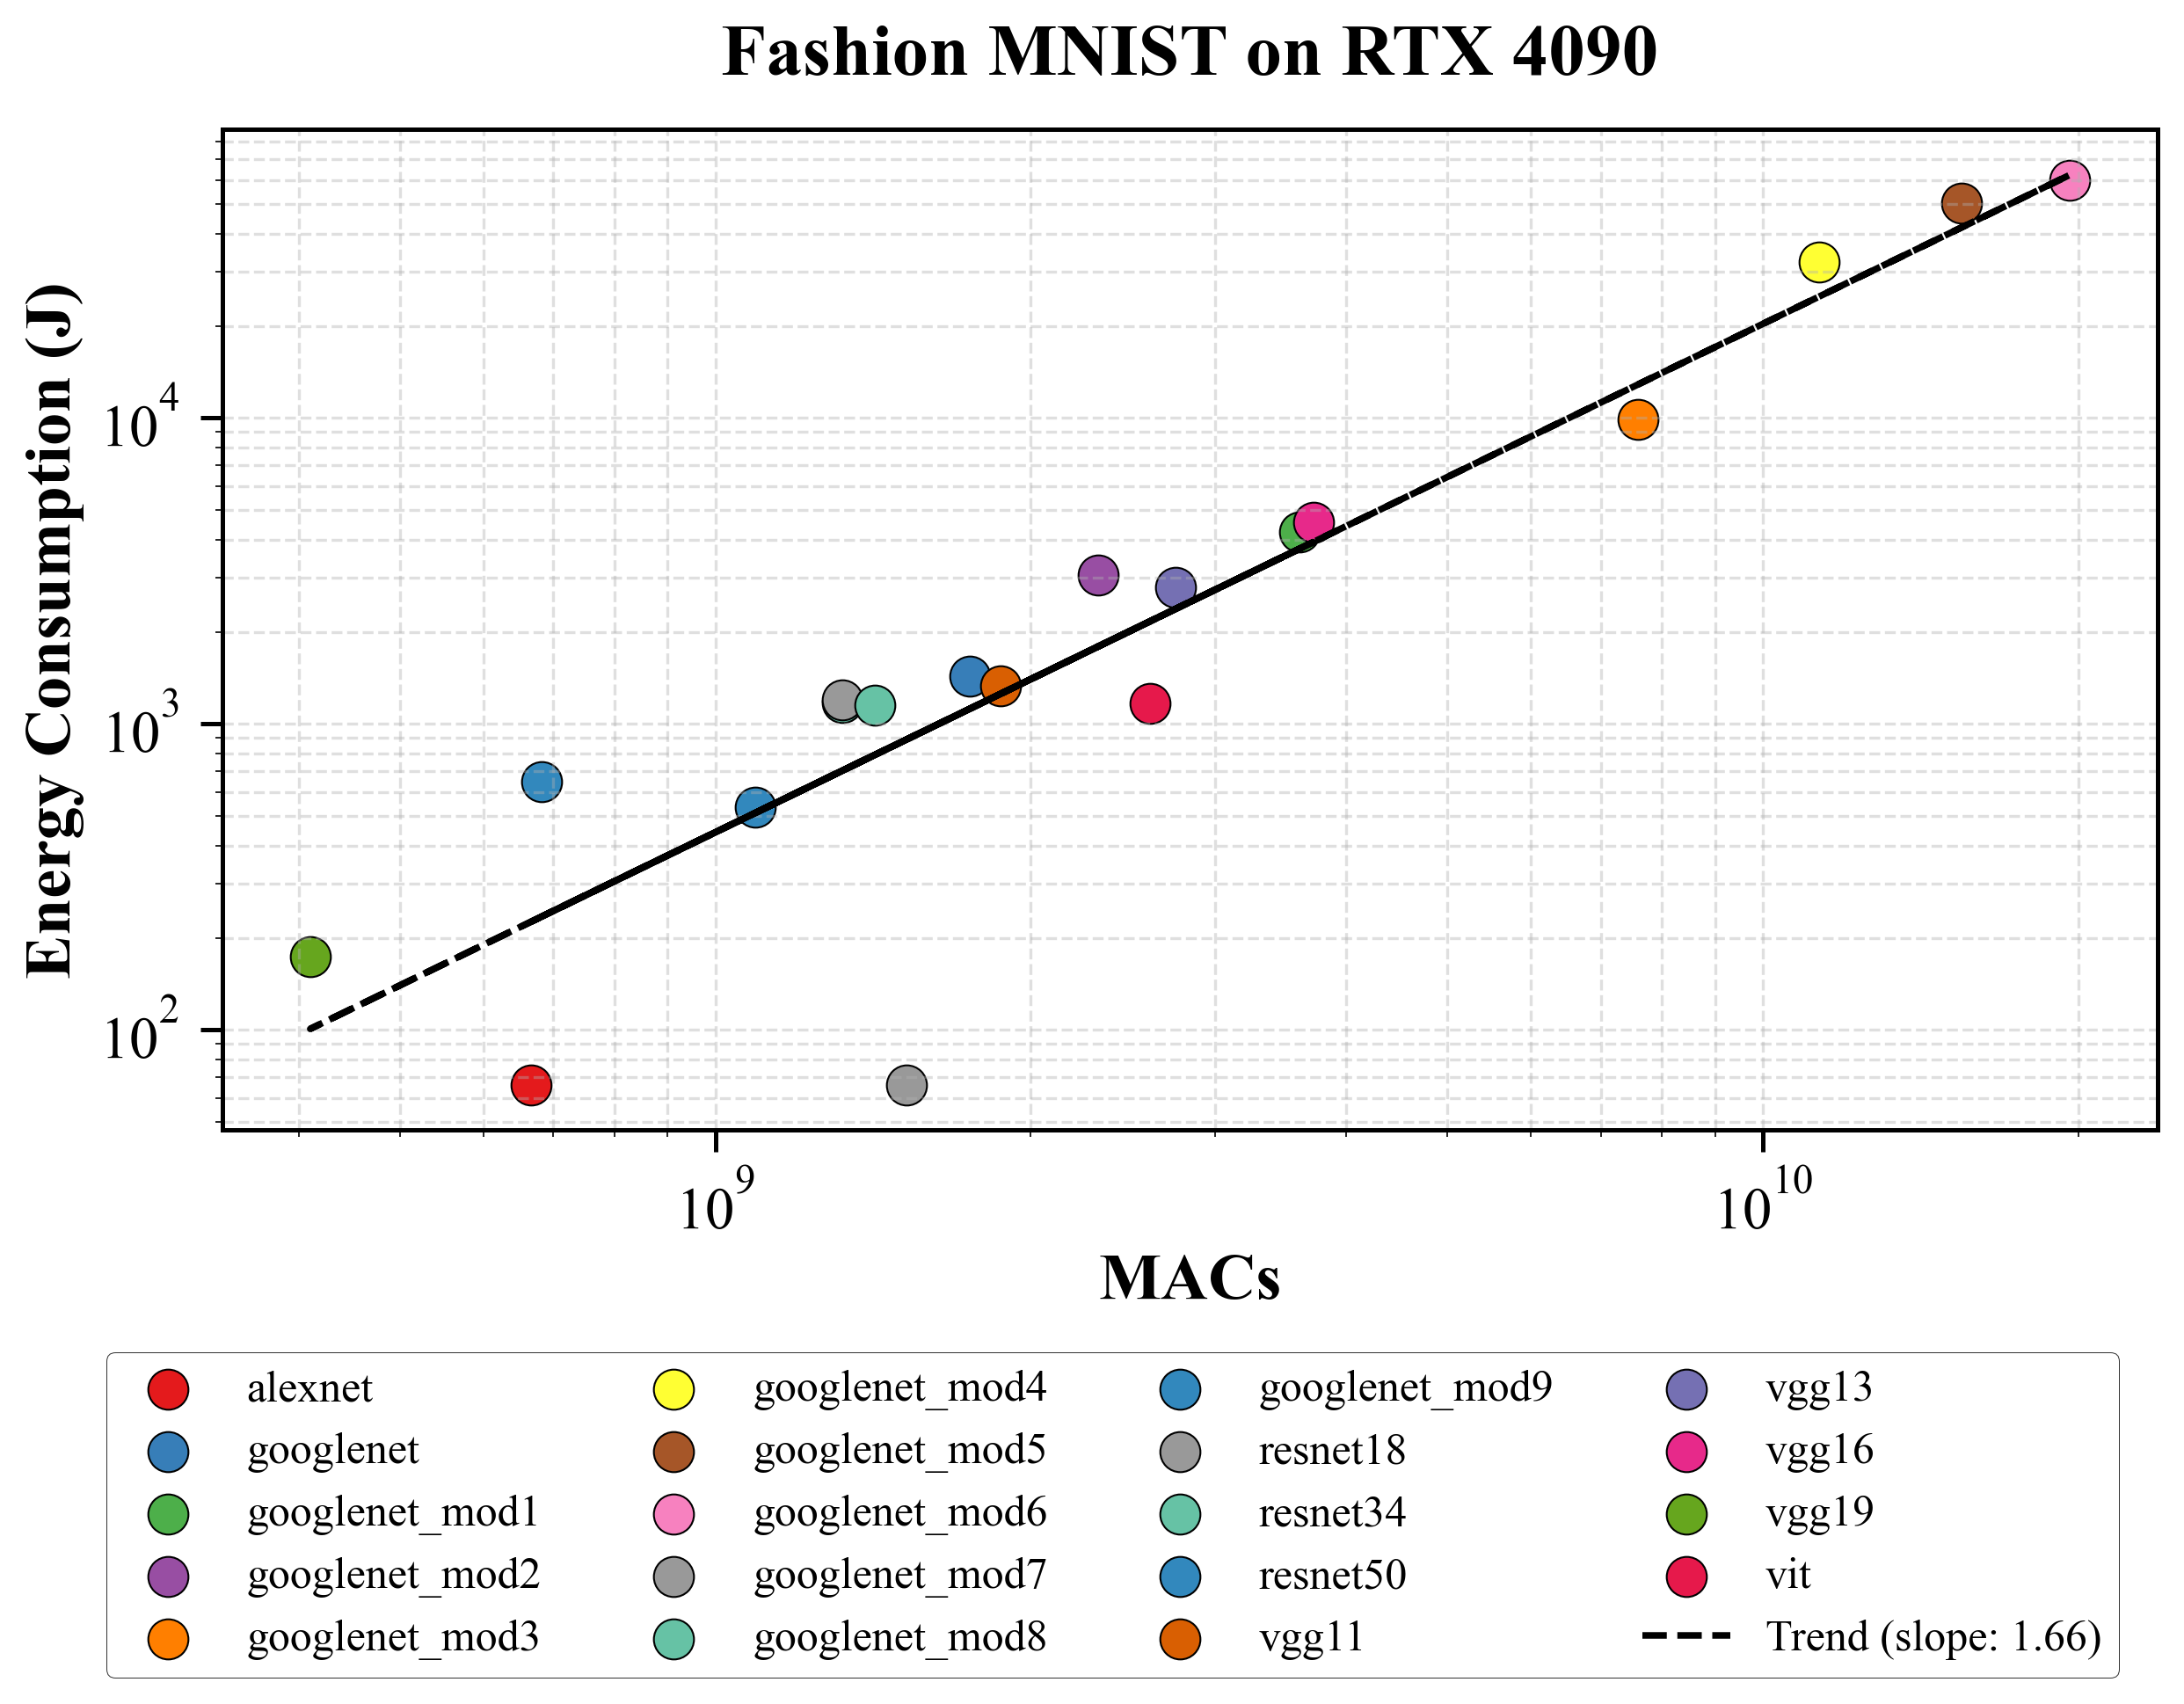

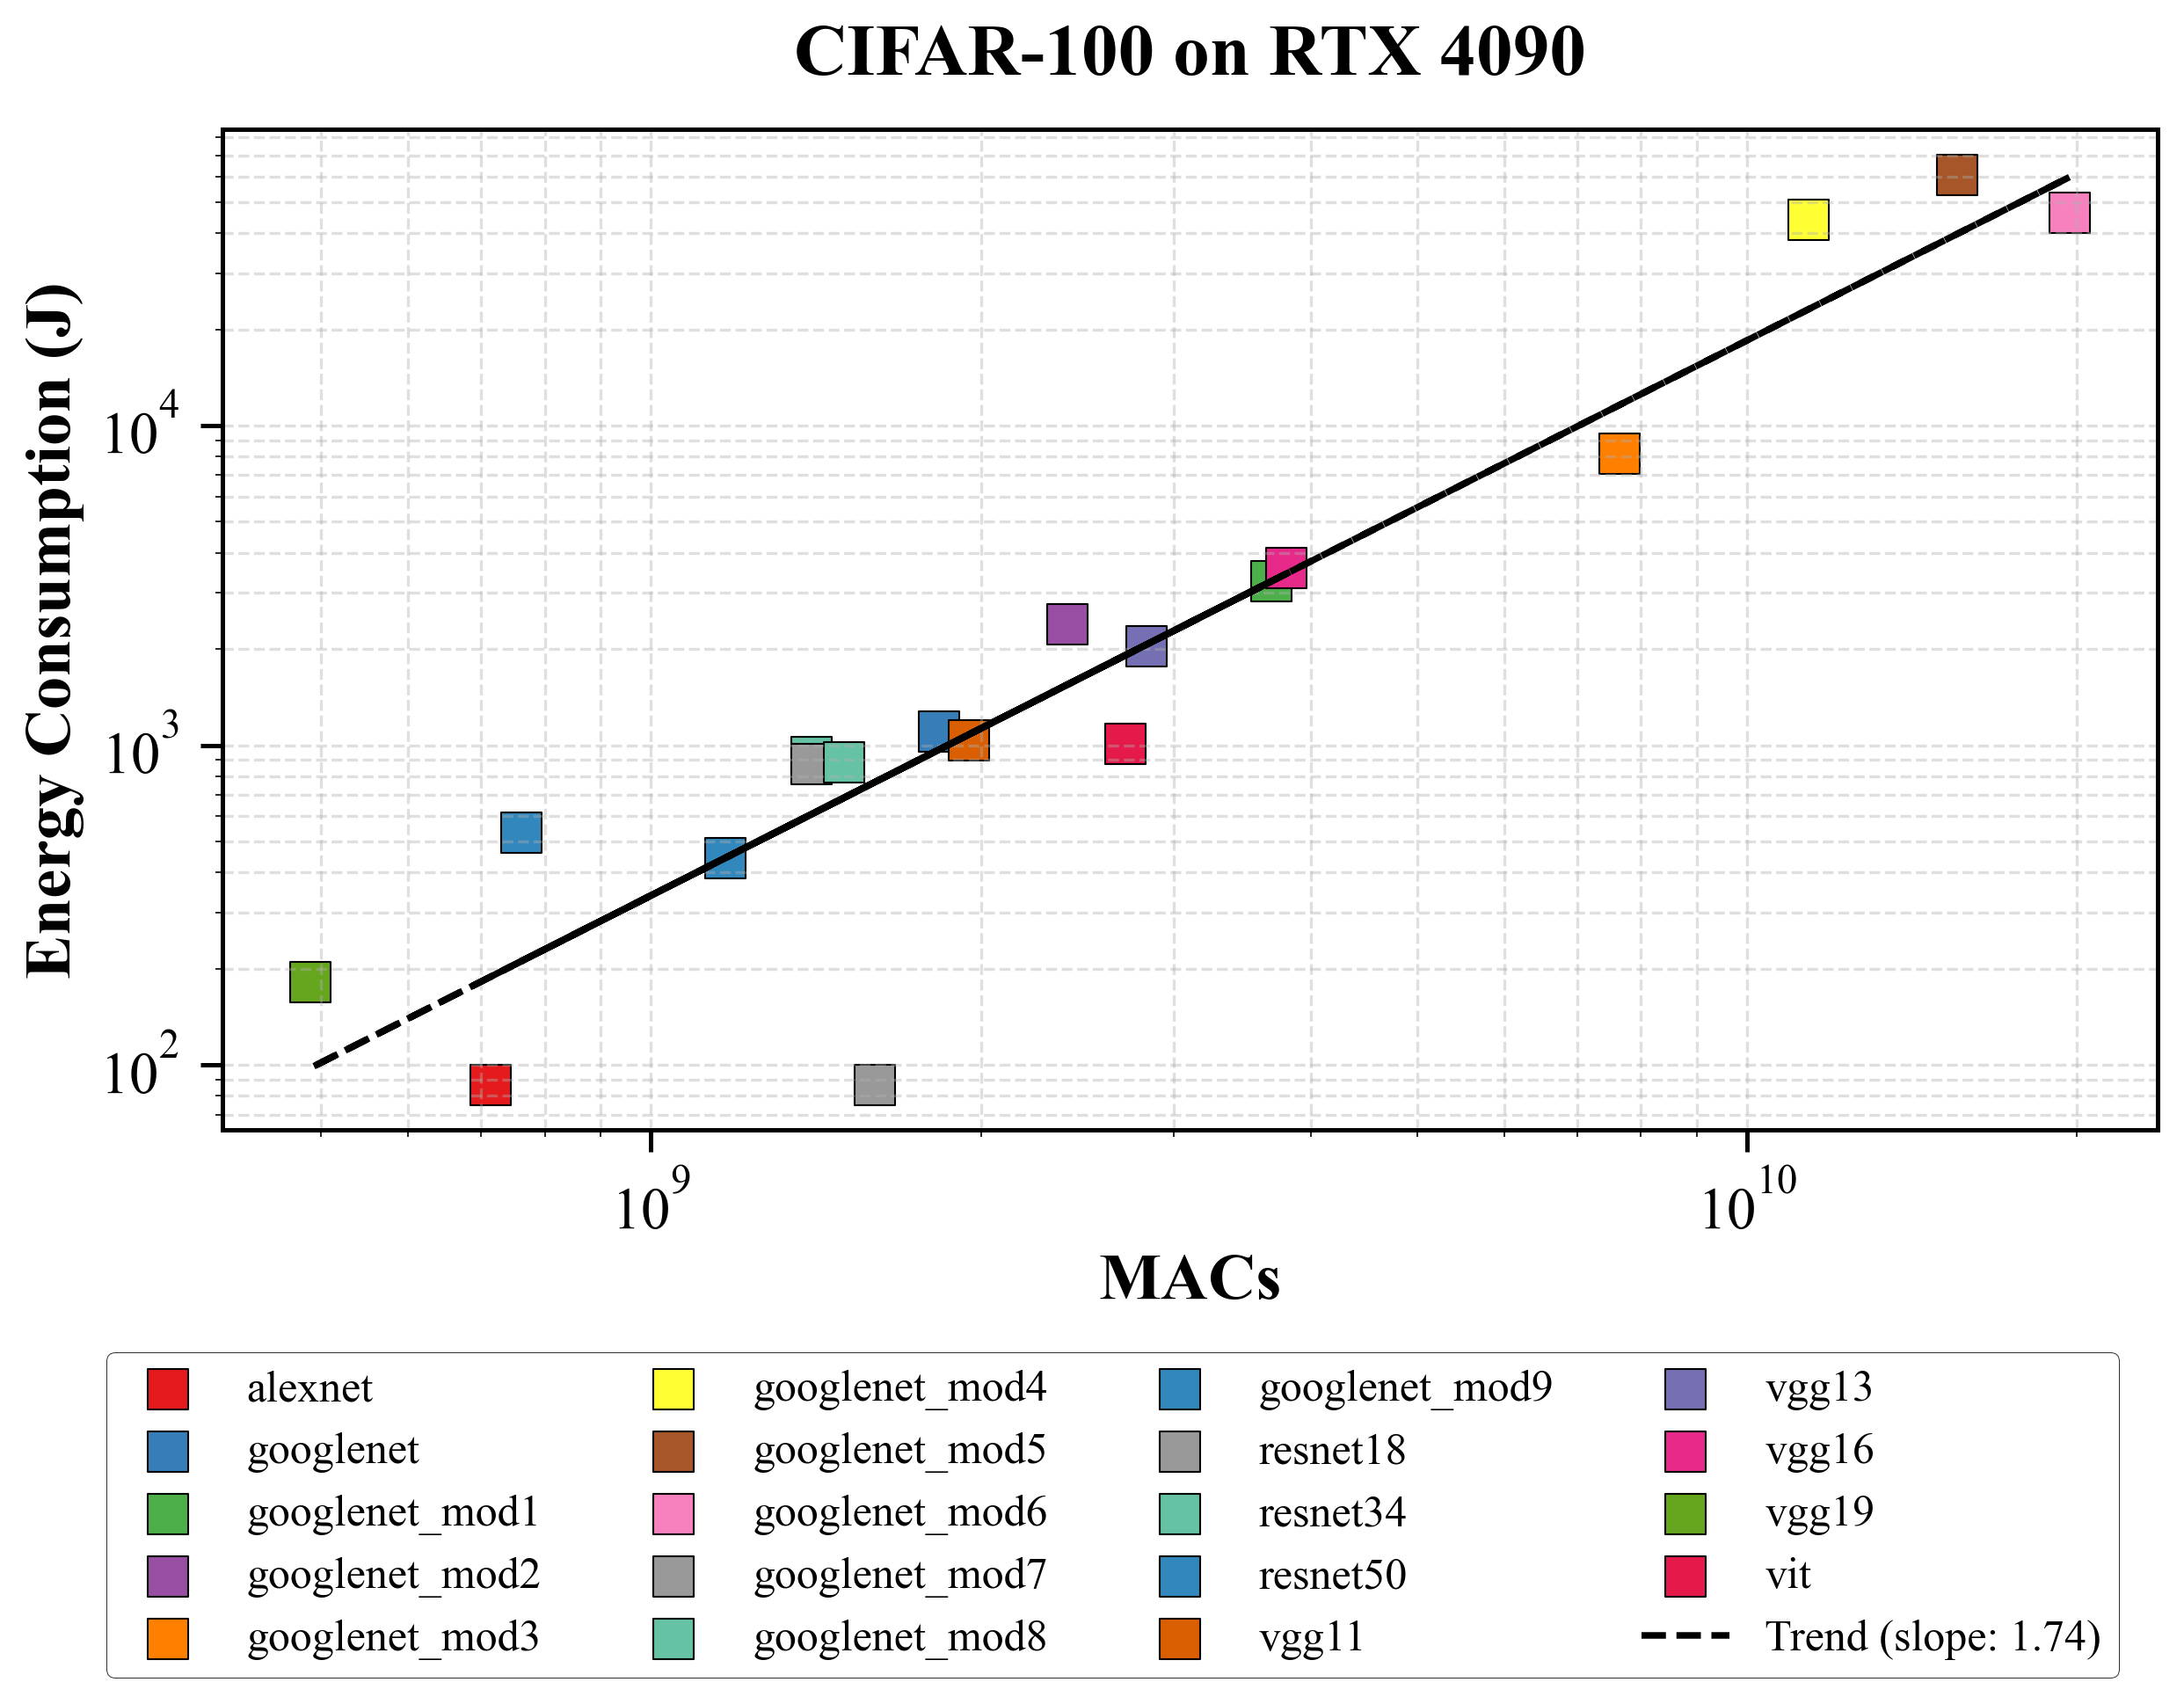

In [86]:
# ================== IEEE 图表样式配置 ==================
plt.rcParams.update({
    'font.family': 'serif',        # IEEE推荐衬线字体
    'font.serif': 'Times New Roman',
    'font.size': 14,               
    'axes.labelsize': 18,          # 坐标轴标签
    'axes.titlesize': 20,          # 标题
    'xtick.labelsize': 16,         
    'ytick.labelsize': 16,         
    'legend.fontsize': 12,         
    'legend.framealpha': 0.8,      
    'axes.linewidth': 1.2,         
    'lines.linewidth': 1.8,        
    'lines.markersize': 9,         
    'xtick.major.size': 6,         
    'xtick.major.width': 1.2,      
    'ytick.major.size': 6,         
    'ytick.major.width': 1.2,     
    'figure.dpi': 300              # 高分辨率
})

# ================== 颜色与模型定义 ==================
model_colors = {
    'alexnet': '#E41A1C',
    'googlenet': '#377EB8',
    'googlenet_mod1': '#4DAF4A',
    'googlenet_mod2': '#984EA3',
    'googlenet_mod3': '#FF7F00',
    'googlenet_mod4': '#FFFF33',
    'googlenet_mod5': '#A65628',
    'googlenet_mod6': '#F781BF',
    'googlenet_mod7': '#999999',
    'googlenet_mod8': '#66C2A5',
    'googlenet_mod9': '#3288BD',
    'resnet18': '#999999',
    'resnet34': '#66C2A5',
    'resnet50': '#3288BD',
    'vgg11': '#D95F02',
    'vgg13': '#7570B3',
    'vgg16': '#E7298A',
    'vgg19': '#66A61E',
    'vit': '#E6194B'
}

macs_models = list(model_colors.keys())[:len(model_macs_fashionmnist)]  # 根据数据长度调整

# ================== 绘图参数 ==================
datasets = ['Fashion MNIST', 'CIFAR-100']
hardware = ['RTX 3080', 'RTX 4090']
markers = {'Fashion MNIST': 'o', 'CIFAR-100': 's'}  # 不同数据集使用不同标记

# ================== 主绘图函数 ==================
def plot_energy_vs_macs(hw, ds, macs_data, energy_data):
    plt.figure(figsize=(10, 7))  # IEEE双栏兼容尺寸
    
    # 绘制散点
    for idx, model in enumerate(macs_models):
        plt.scatter(
            macs_data[idx], 
            energy_data[idx],
            color=model_colors[model],
            edgecolor='k',
            linewidth=0.5,
            marker=markers[ds],
            s=120,
            label=model
        )
    
    # 添加趋势线
    x = np.array(macs_data)
    y = np.array(energy_data)
    valid_idx = (x > 0) & (y > 0)
    
    if sum(valid_idx) > 1:
        coeffs = np.polyfit(np.log10(x[valid_idx]), np.log10(y[valid_idx]), 1)
        trend_line = 10**(coeffs[1]) * x**coeffs[0]
        plt.plot(x, trend_line, 'k--', label=f'Trend (slope: {coeffs[0]:.2f})')
    
    # 坐标轴设置
    plt.xscale('log')
    plt.yscale('log')
    # plt.gca().xaxis.set_major_formatter(lambda x, _: f"{x/1e6:.1f}M")  # 显示为百万单位
    # plt.gca().yaxis.set_major_formatter(plt.FormatStrFormatter('%.1f'))
    
    plt.xlabel('MACs', fontweight='bold')
    plt.ylabel('Energy Consumption (J)', fontweight='bold')
    plt.title(f'{ds} on {hw}', pad=15, fontweight='bold')
    
    plt.grid(True, which='both', linestyle='--', alpha=0.4)
    
    # 图例设置 - 放在图片下方，没有标题
    leg = plt.legend(
        loc='upper center',
        bbox_to_anchor=(0.46, -0.2),
        frameon=True,
        ncol=4
    )
    leg.get_frame().set_edgecolor('k')
    
    # 保存输出
    plt.tight_layout(rect=[0, 0, 0.85, 1])
    filename = f"{hw.replace(' ','_')}_{ds.replace(' ','_')}"
    plt.savefig(f"{filename}.pdf", bbox_inches='tight')
    # plt.savefig(f"{filename}.png", dpi=600, bbox_inches='tight')
    plt.show()

# ================== 生成所有组合图表 ==================
if __name__ == "__main__":
    # 数据映射
    data_mapping = {
        'RTX 3080': {
            'Fashion MNIST': (model_macs_fashionmnist, energy_consumption_f3080),
            'CIFAR-100': (model_macs_cifar100, energy_consumption_c3080)
        },
        'RTX 4090': {
            'Fashion MNIST': (model_macs_fashionmnist, energy_consumption_f4090),
            'CIFAR-100': (model_macs_cifar100, energy_consumption_c4090)
        }
    }
    
    # 遍历所有硬件和数据集组合
    for hw in hardware:
        for ds in datasets:
            macs, energy = data_mapping[hw][ds]
            plot_energy_vs_macs(hw, ds, macs, energy)

{'RTX 3080': {'Fashion MNIST': ([666410000.0, 1750000000.0, 3610000000.0, 2320000000.0, 7600000000.0, 11310000000.0, 15480000000.0, 19630000000.0, 1520000000.0, 1320000000.0, 682580000.0, 1320000000.0, 1420000000.0, 1090000000.0, 1870000000.0, 2750000000.0, 3720000000.0, 410090000.0, 2600000000.0], array([   295.97153644,   4995.36328261,  15642.58505141,  10581.74420979,
        43143.81868791, 189606.95335206, 287872.58915848, 283542.68611154,
          295.97153644,   4203.49603162,   1967.68262504,   4198.58976104,
         4165.53926047,   2236.46437045,   5485.5865794 ,  11311.68813539,
        20239.91384664,    612.82971701,   5866.94295596])), 'CIFAR-100': ([713630000.0, 1830000000.0, 3680000000.0, 2400000000.0, 7650000000.0, 11370000000.0, 15540000000.0, 19690000000.0, 1600000000.0, 1400000000.0, 761310000.0, 1400000000.0, 1500000000.0, 1170000000.0, 1950000000.0, 2830000000.0, 3800000000.0, 488780000.0, 2710000000.0], array([   370.34955117,   4515.22612951,  13619.78180654,

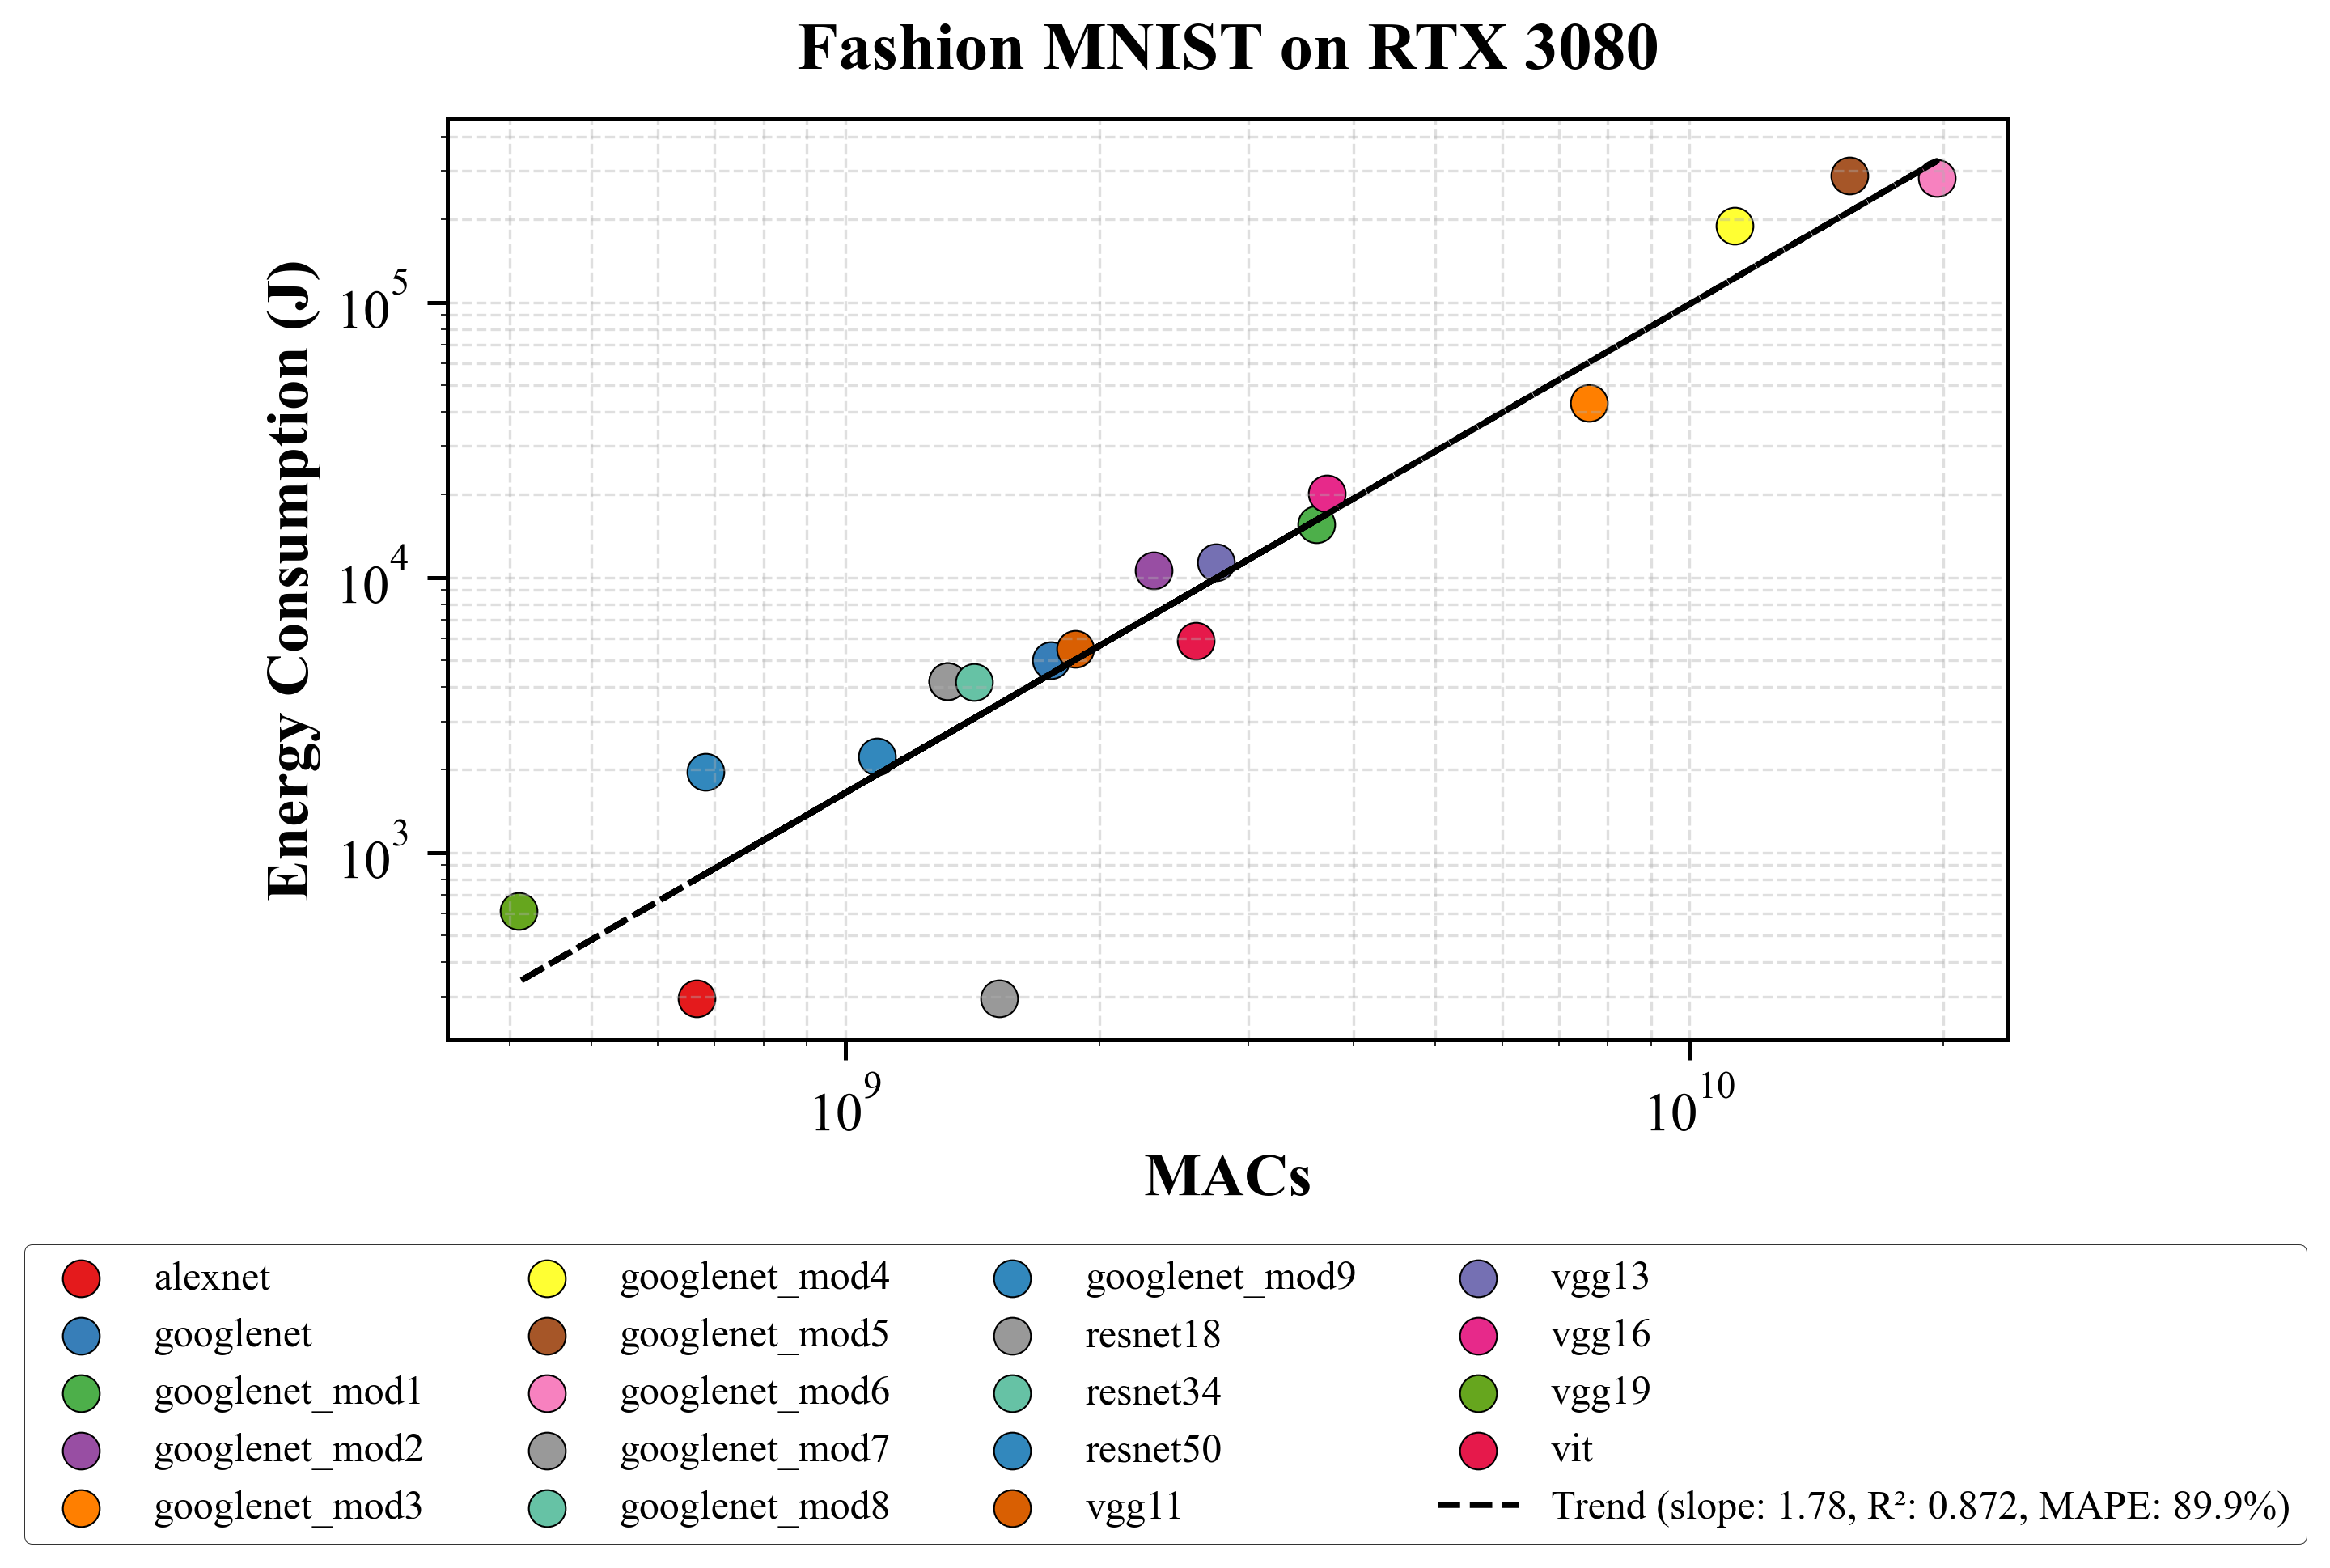

Slope for RTX 3080 Fashion MNIST: 1.775708691132212
Slope for RTX 3080 Fashion MNIST: 2.81393903820097e-10
The fig_num is 50000


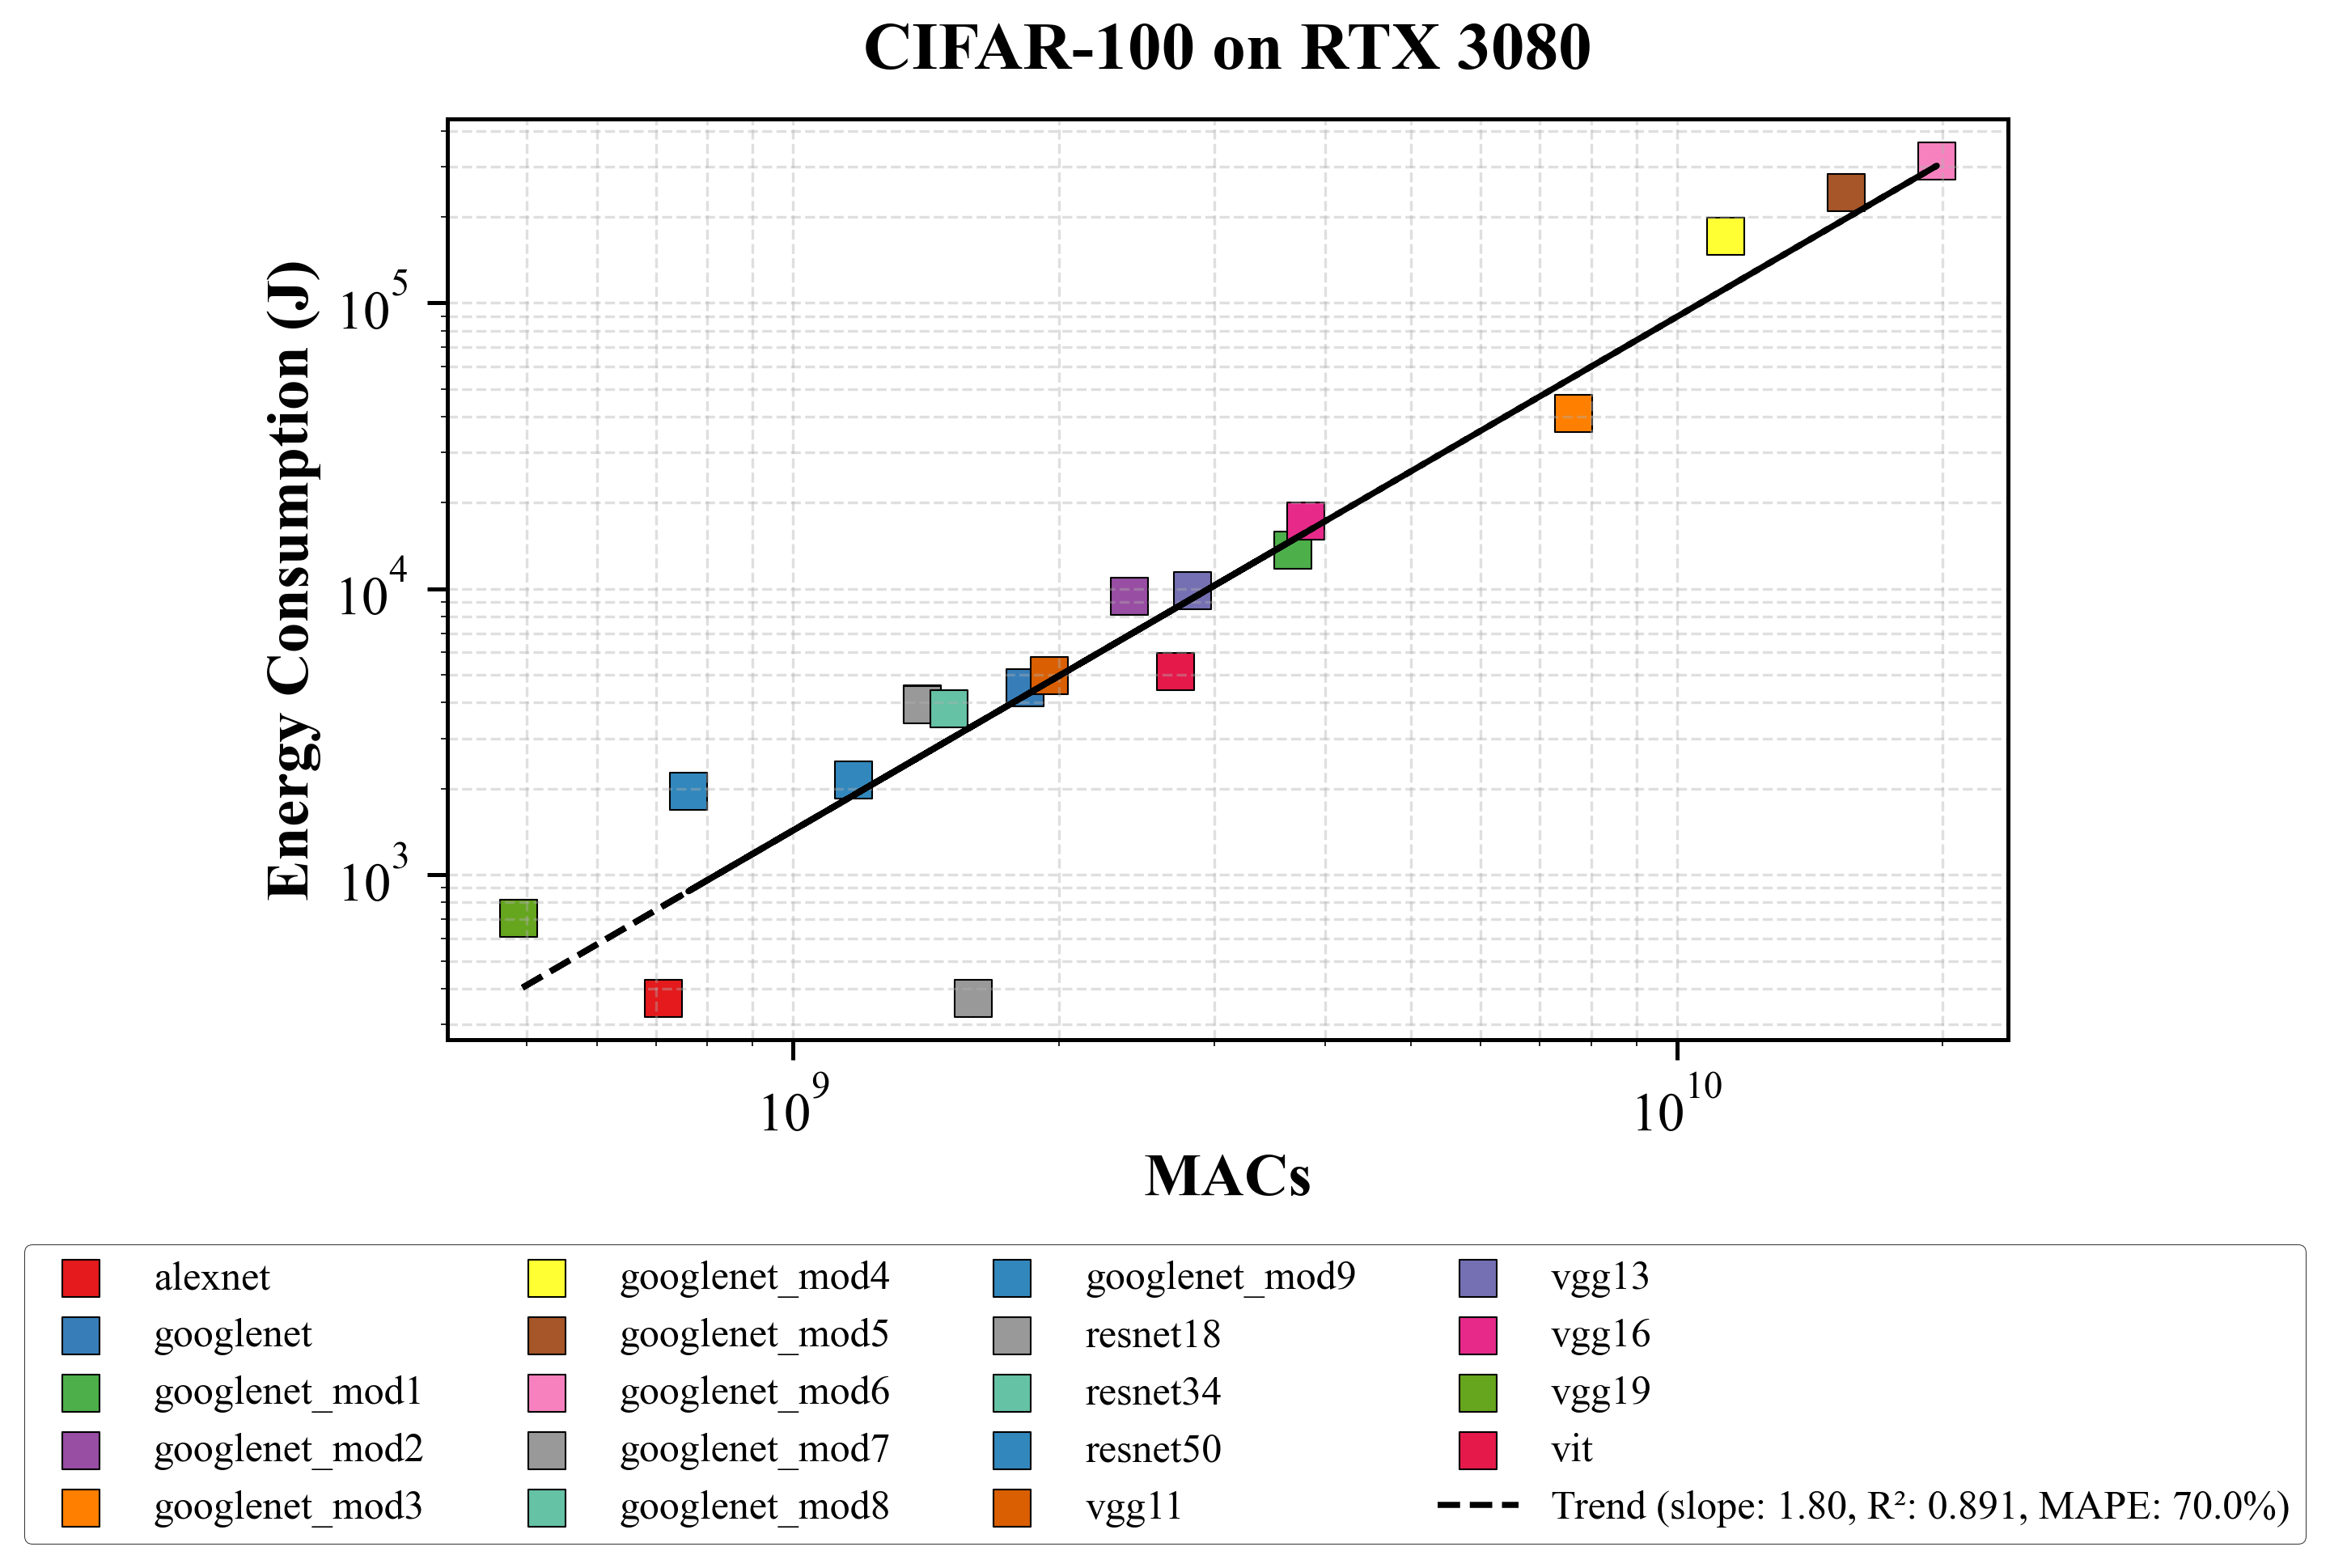

Slope for RTX 3080 CIFAR-100: 1.7963638965948687
Slope for RTX 3080 CIFAR-100: 3.3210178517389907e-10
The fig_num is 60000


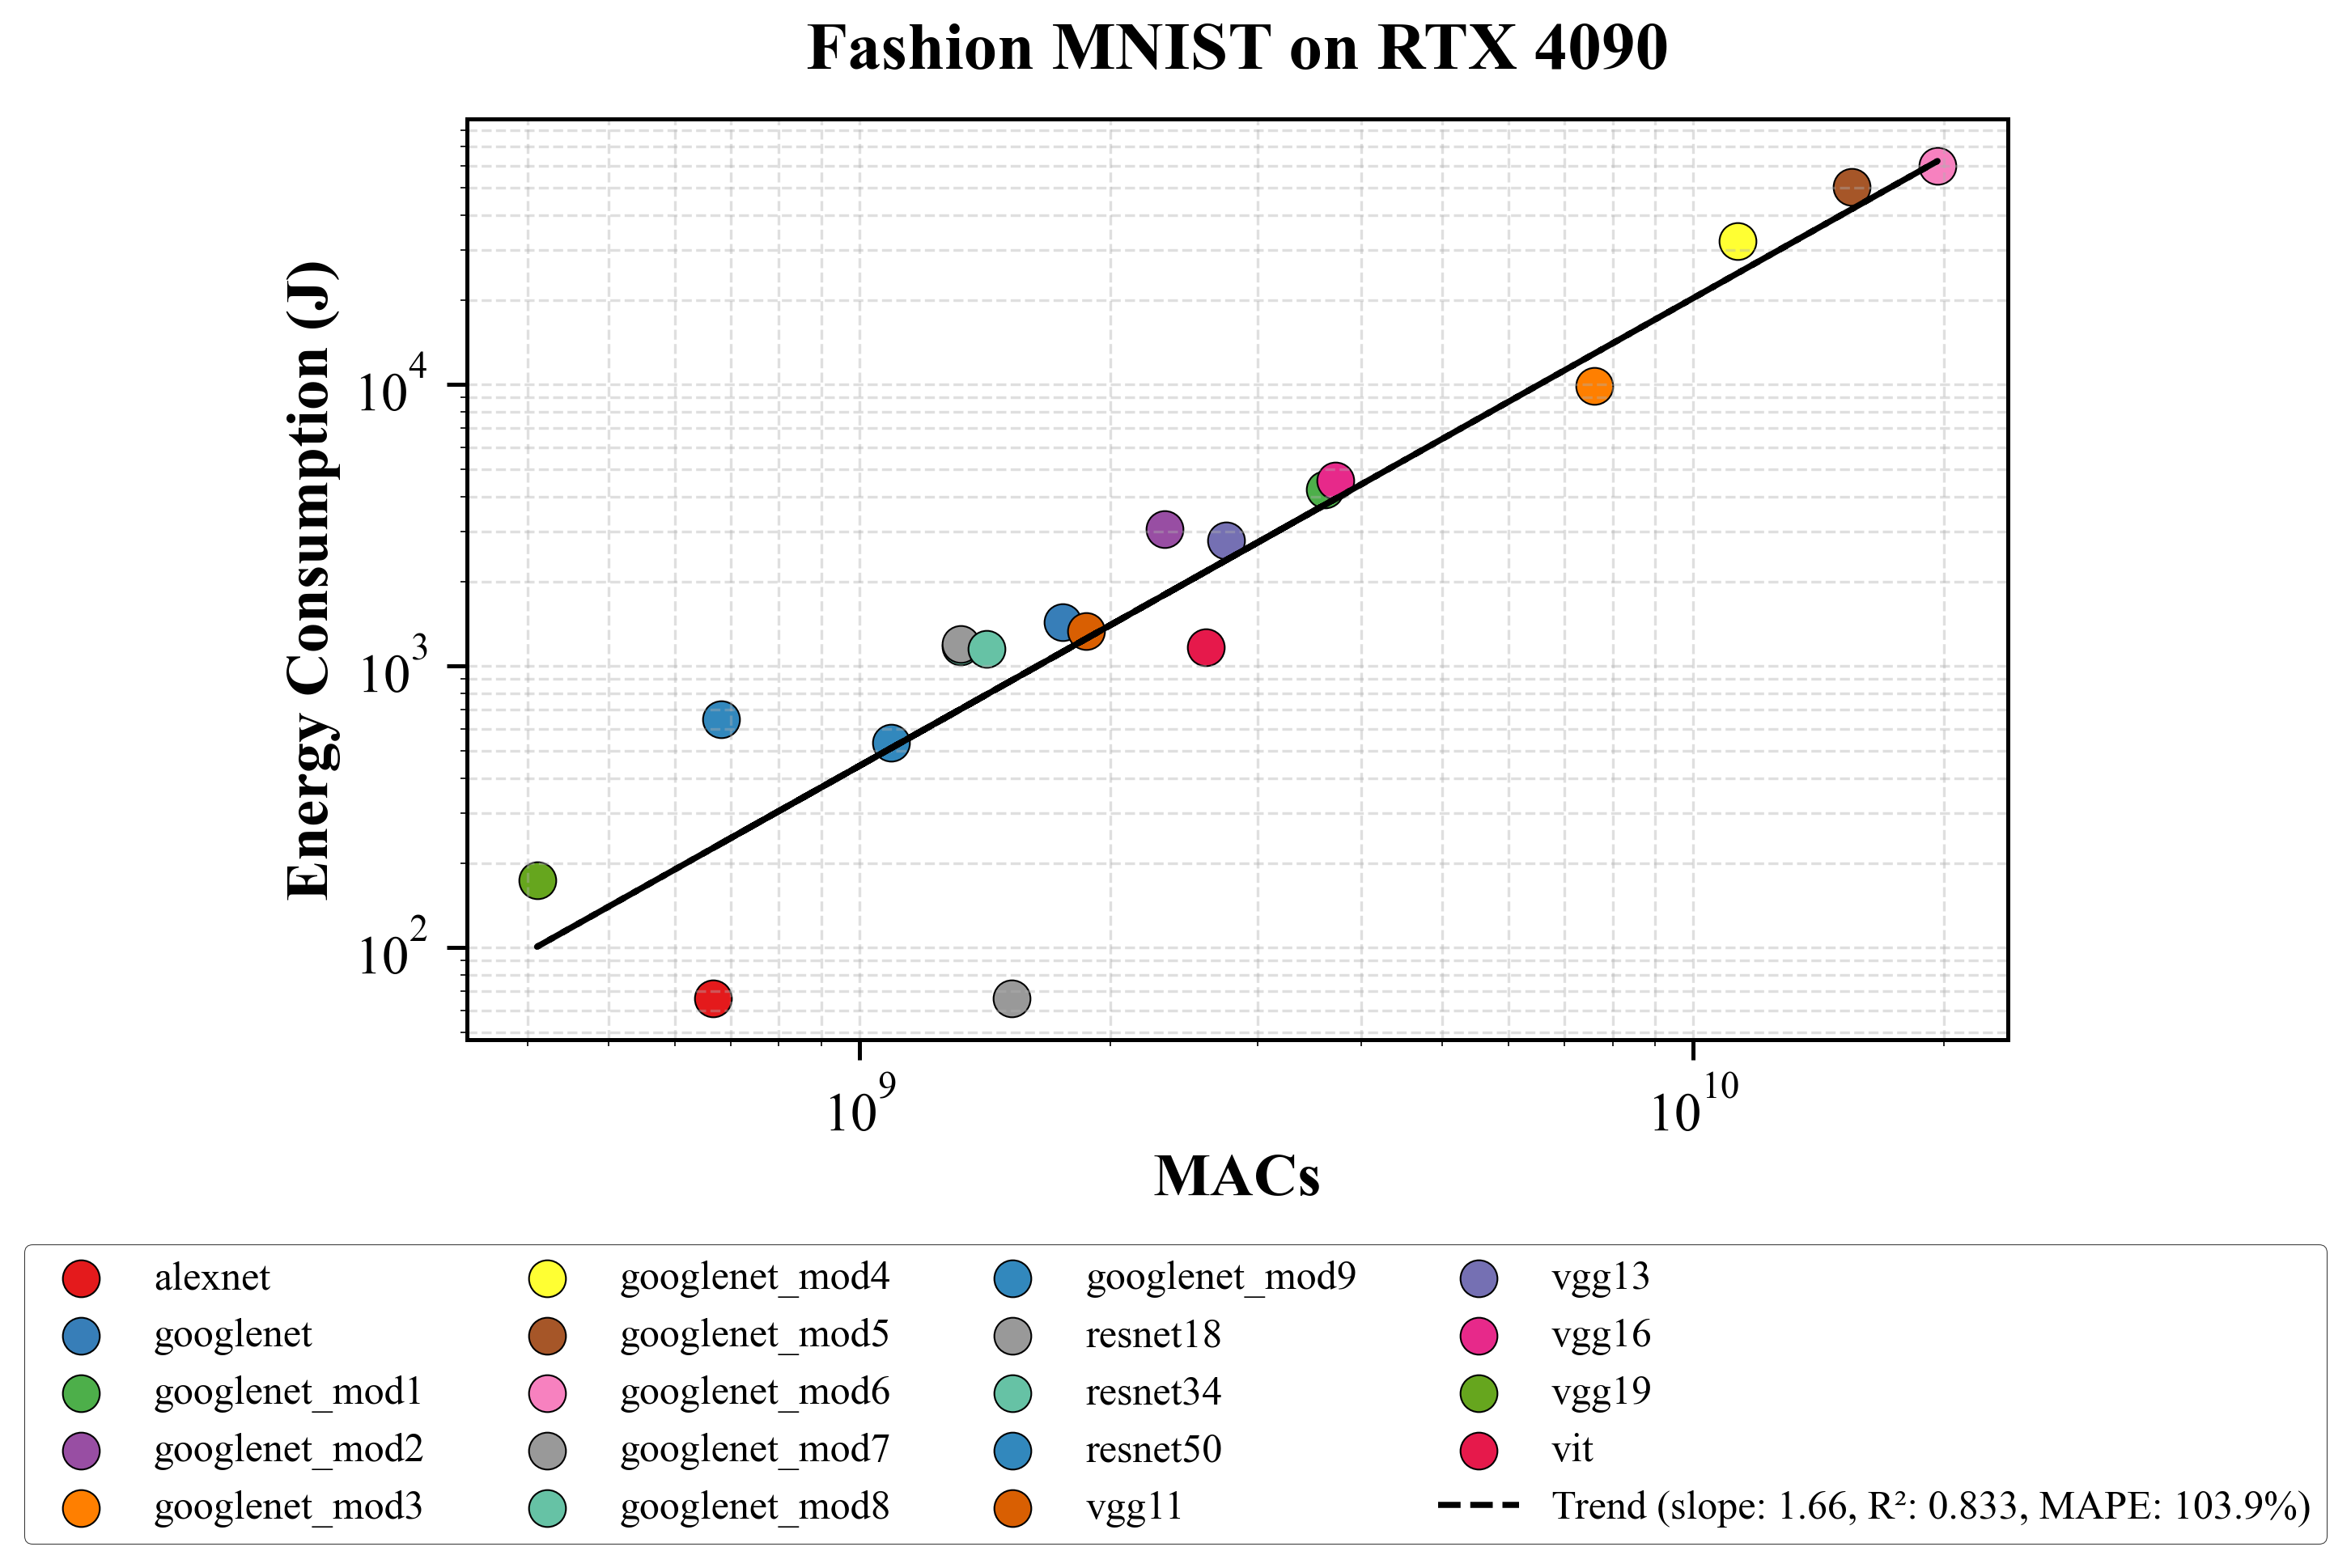

Slope for RTX 4090 Fashion MNIST: 1.661030496650321
Slope for RTX 4090 Fashion MNIST: 5.3799930000424385e-11
The fig_num is 50000


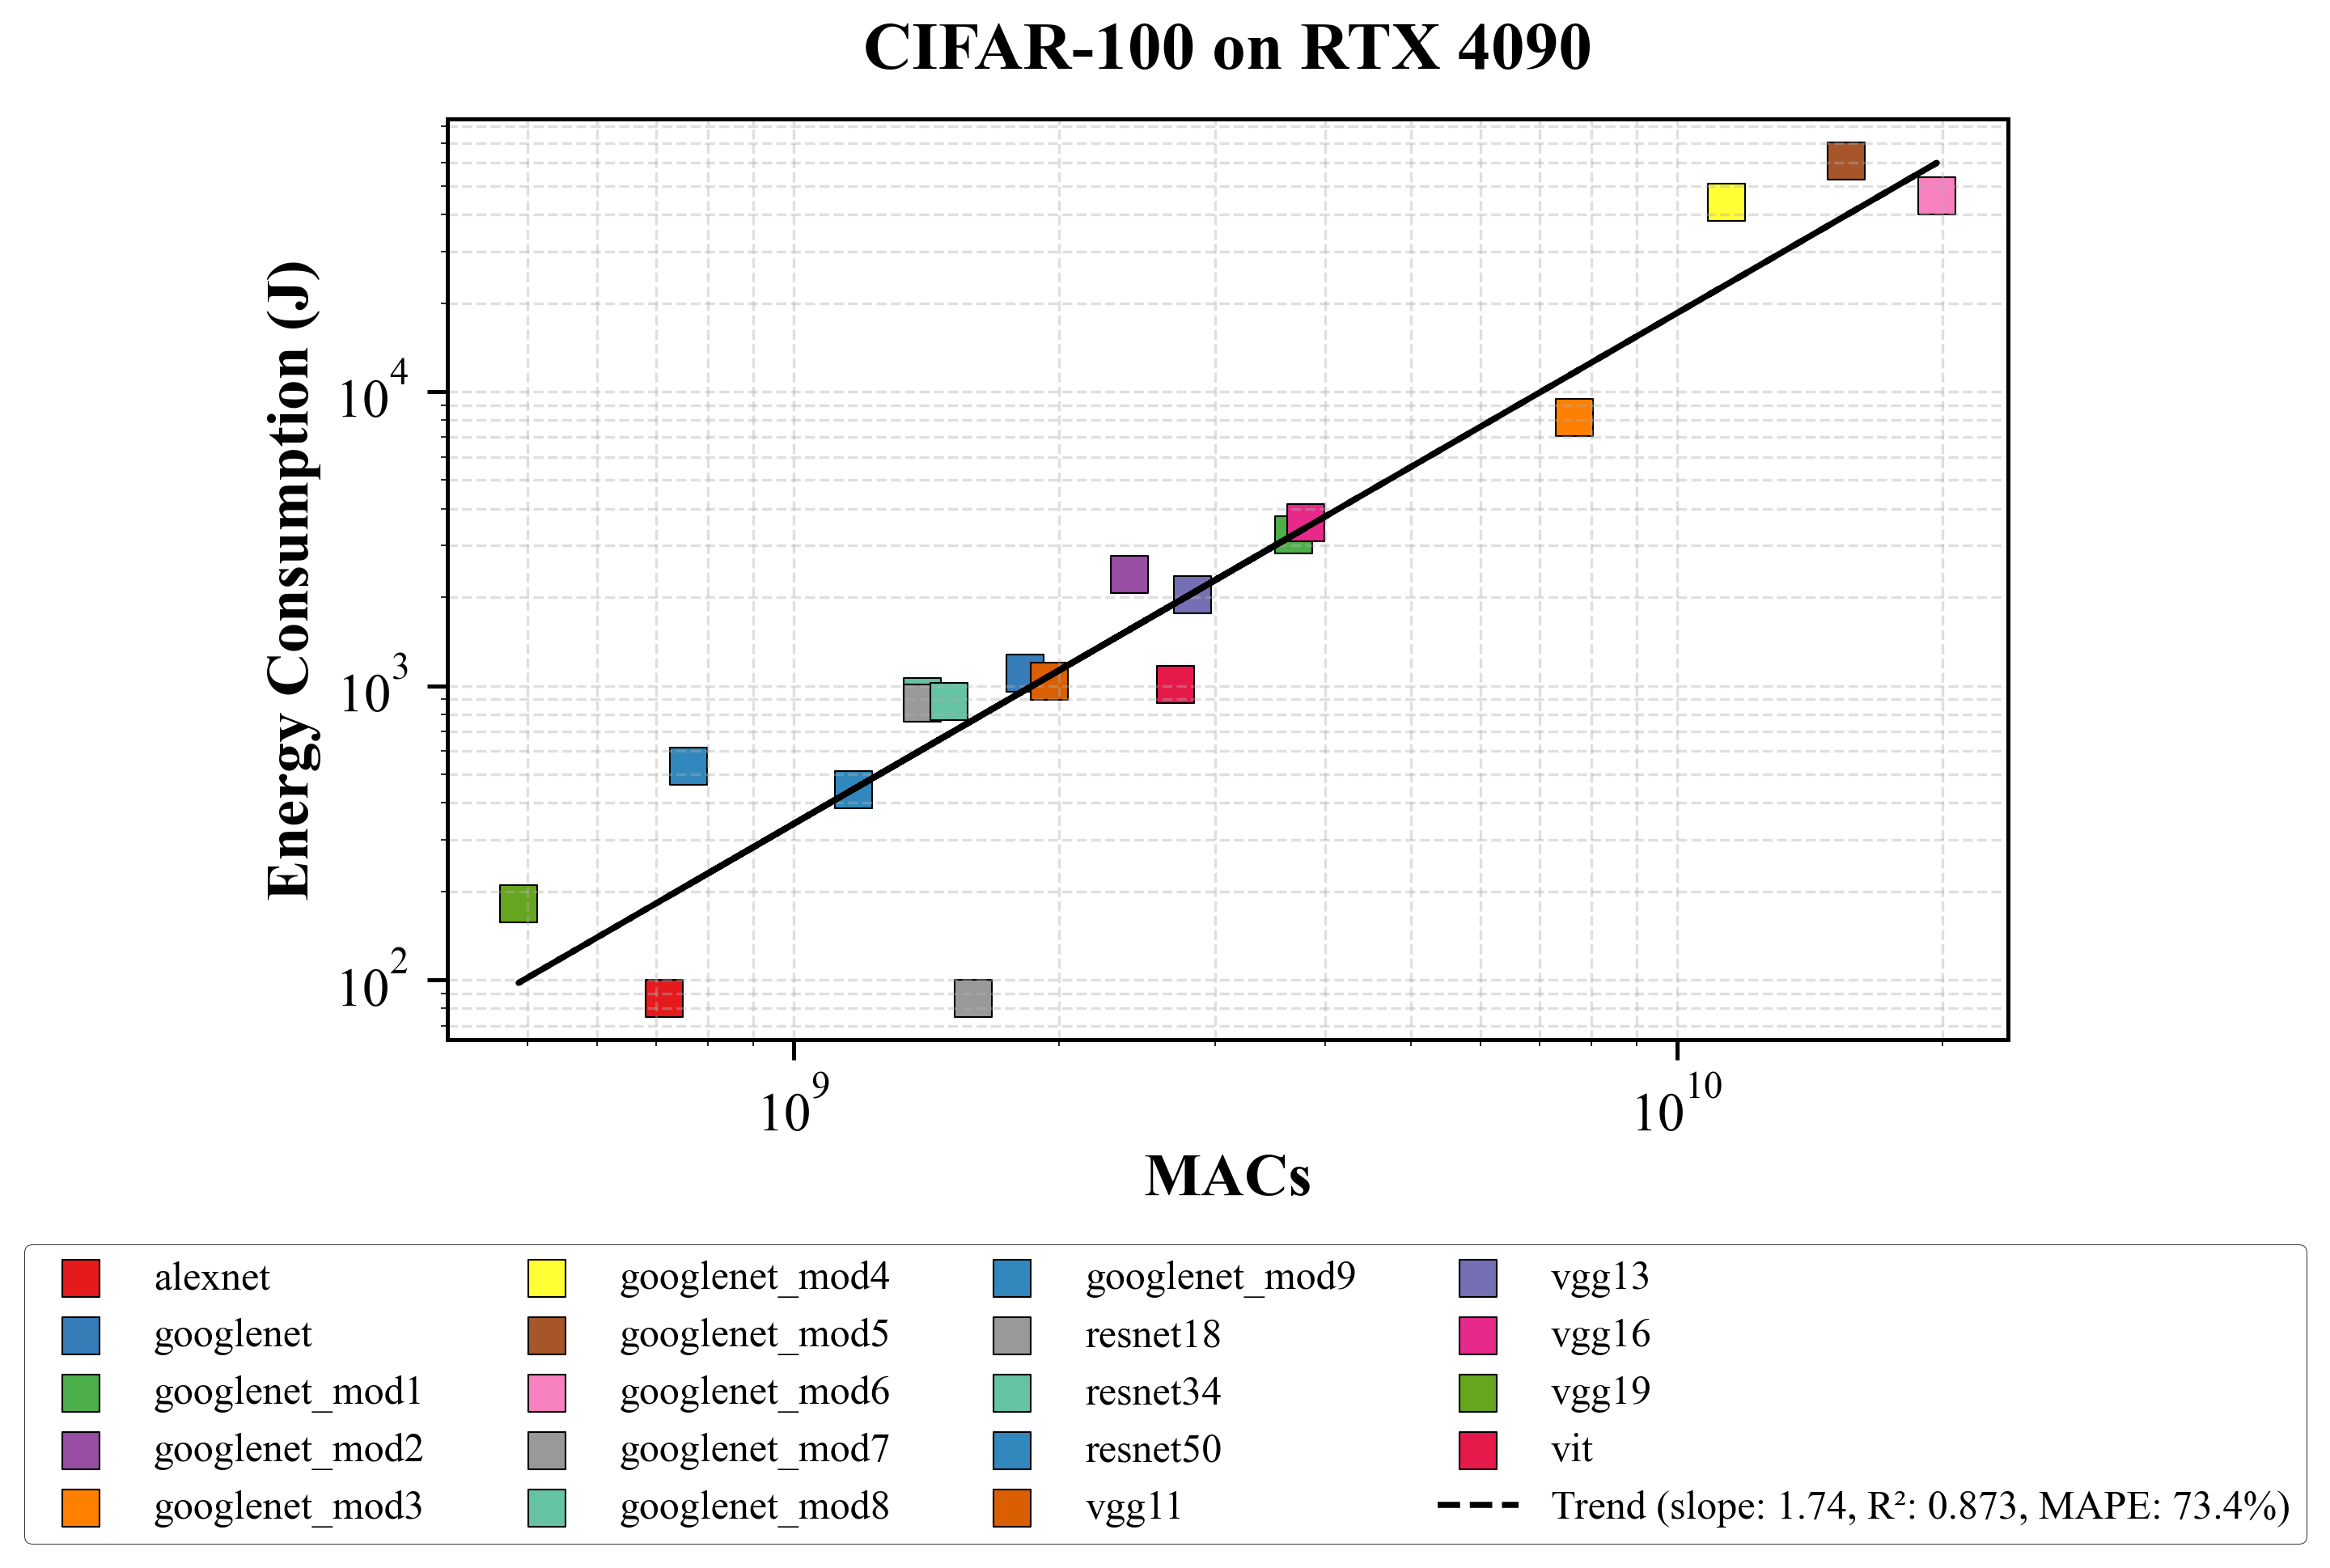

Slope for RTX 4090 CIFAR-100: 1.7365507487328455
Slope for RTX 4090 CIFAR-100: 6.439896250955082e-11


In [87]:
# ================== IEEE 图表样式配置 ==================
plt.rcParams.update({
    'font.family': 'serif',        # IEEE推荐衬线字体
    'font.serif': 'Times New Roman',
    'font.size': 14,               
    'axes.labelsize': 18,          # 坐标轴标签
    'axes.titlesize': 20,          # 标题
    'xtick.labelsize': 16,         
    'ytick.labelsize': 16,         
    'legend.fontsize': 12,         
    'legend.framealpha': 0.8,      
    'axes.linewidth': 1.2,         
    'lines.linewidth': 1.8,        
    'lines.markersize': 9,         
    'xtick.major.size': 6,         
    'xtick.major.width': 1.2,      
    'ytick.major.size': 6,         
    'ytick.major.width': 1.2,     
    'figure.dpi': 300              # 高分辨率
})

# ================== 颜色与模型定义 ==================
model_colors = {
    'alexnet': '#E41A1C',
    'googlenet': '#377EB8',
    'googlenet_mod1': '#4DAF4A',
    'googlenet_mod2': '#984EA3',
    'googlenet_mod3': '#FF7F00',
    'googlenet_mod4': '#FFFF33',
    'googlenet_mod5': '#A65628',
    'googlenet_mod6': '#F781BF',
    'googlenet_mod7': '#999999',
    'googlenet_mod8': '#66C2A5',
    'googlenet_mod9': '#3288BD',
    'resnet18': '#999999',
    'resnet34': '#66C2A5',
    'resnet50': '#3288BD',
    'vgg11': '#D95F02',
    'vgg13': '#7570B3',
    'vgg16': '#E7298A',
    'vgg19': '#66A61E',
    'vit': '#E6194B'
}

macs_models = list(model_colors.keys())[:len(model_macs_fashionmnist)]  # 根据数据长度调整

# ================== 绘图参数 ==================
datasets = ['Fashion MNIST', 'CIFAR-100']
fig_num = [60000, 50000]
hardware = ['RTX 3080', 'RTX 4090']
markers = {'Fashion MNIST': 'o', 'CIFAR-100': 's'}  # 不同数据集使用不同标记

# ================== 主绘图函数 ==================
def plot_energy_vs_macs(hw, ds, macs_data, energy_data):
    plt.figure(figsize=(10, 7))  # IEEE双栏兼容尺寸
    
    # 绘制散点
    for idx, model in enumerate(macs_models):
        plt.scatter(
            macs_data[idx], 
            energy_data[idx],
            color=model_colors[model],
            edgecolor='k',
            linewidth=0.5,
            marker=markers[ds],
            s=120,
            label=model
        )
    
    # 添加趋势线
    x = np.array(macs_data)
    y = np.array(energy_data)
    valid_idx = (x > 0) & (y > 0)
    
    if sum(valid_idx) > 1:
        # 对数据进行对数变换后拟合
        coeffs = np.polyfit(np.log10(x[valid_idx]), np.log10(y[valid_idx]), 1)
        # if ds == 'CIFAR-100' and hw == 'RTX 4090':
        #     coeffs = coeffs*0.95
        # coeffs = np.polyfit(x[valid_idx], y[valid_idx], 1)
        trend_line = 10**(coeffs[1]) * x**coeffs[0]
        
        # 计算R²值（决定系数）
        log_x = np.log10(x[valid_idx])
        log_y = np.log10(y[valid_idx])
        log_y_pred = coeffs[0] * log_x + coeffs[1]
        ss_total = np.sum((log_y - np.mean(log_y))**2)
        ss_residual = np.sum((log_y - log_y_pred)**2)
        r_squared = 1 - (ss_residual / ss_total)
        
        # 计算均方误差(MSE)
        mse = np.mean((10**log_y_pred - y[valid_idx])**2)
        rmse = np.sqrt(mse)
        
        # 计算平均绝对误差百分比(MAPE)
        mape = np.mean(np.abs((y[valid_idx] - 10**log_y_pred) / y[valid_idx])) * 100
        
        plt.plot(x, trend_line, 'k--', 
                 label=f'Trend (slope: {coeffs[0]:.2f}, R²: {r_squared:.3f}, MAPE: {mape:.1f}%)')
    
    # 坐标轴设置
    plt.xscale('log')
    plt.yscale('log')
    # plt.gca().xaxis.set_major_formatter(lambda x, _: f"{x/1e6:.1f}M")  # 显示为百万单位
    # plt.gca().yaxis.set_major_formatter(plt.FormatStrFormatter('%.1f'))
    
    plt.xlabel('MACs', fontweight='bold')
    plt.ylabel('Energy Consumption (J)', fontweight='bold')
    plt.title(f'{ds} on {hw}', pad=15, fontweight='bold')
    
    plt.grid(True, which='both', linestyle='--', alpha=0.4)
    
    # 图例设置 - 放在图片下方，没有标题
    leg = plt.legend(
        loc='upper center',
        bbox_to_anchor=(0.46, -0.2),
        frameon=True,
        ncol=4
    )
    leg.get_frame().set_edgecolor('k')
    
    # 保存输出
    plt.tight_layout(rect=[0, 0, 0.85, 1])
    filename = f"{hw.replace(' ','_')}_{ds.replace(' ','_')}"
    plt.savefig(f"{filename}.pdf", bbox_inches='tight')
    # plt.savefig(f"{filename}.png", dpi=600, bbox_inches='tight')
    plt.show()

# ================== 生成所有组合图表 ==================
if __name__ == "__main__":
    # 数据映射
    data_mapping = {
        'RTX 3080': {
            'Fashion MNIST': (model_macs_fashionmnist, energy_consumption_f3080),
            'CIFAR-100': (model_macs_cifar100, energy_consumption_c3080)
        },
        'RTX 4090': {
            'Fashion MNIST': (model_macs_fashionmnist, energy_consumption_f4090),
            'CIFAR-100': (model_macs_cifar100, energy_consumption_c4090)
        }
    }
    print(data_mapping)
    # 遍历所有硬件和数据集组合
    for hw in hardware:
        for ds in datasets:
            ds_idx = datasets.index(ds)
            fig_num_ds = fig_num[ds_idx]
            print(f'The fig_num is {fig_num_ds}')
            macs, energy = data_mapping[hw][ds]
            plot_energy_vs_macs(hw, ds, macs, energy)
            # 打印斜率
            x = np.array(macs)
            y = np.array(energy)
            valid_idx = (x > 0) & (y > 0)
            if sum(valid_idx) > 1:
                coeffs = np.polyfit(np.log10(x[valid_idx]), np.log10(y[valid_idx]), 1)
                print(f"Slope for {hw} {ds}: {coeffs[0]}")
            if sum(valid_idx) > 1:
                coeffs_act = np.polyfit(x[valid_idx], y[valid_idx], 1)
                print(f"Slope for {hw} {ds}: {coeffs_act[0]/fig_num_ds}")

Generating combined plots for each hardware...
Creating combined plot for RTX 3080


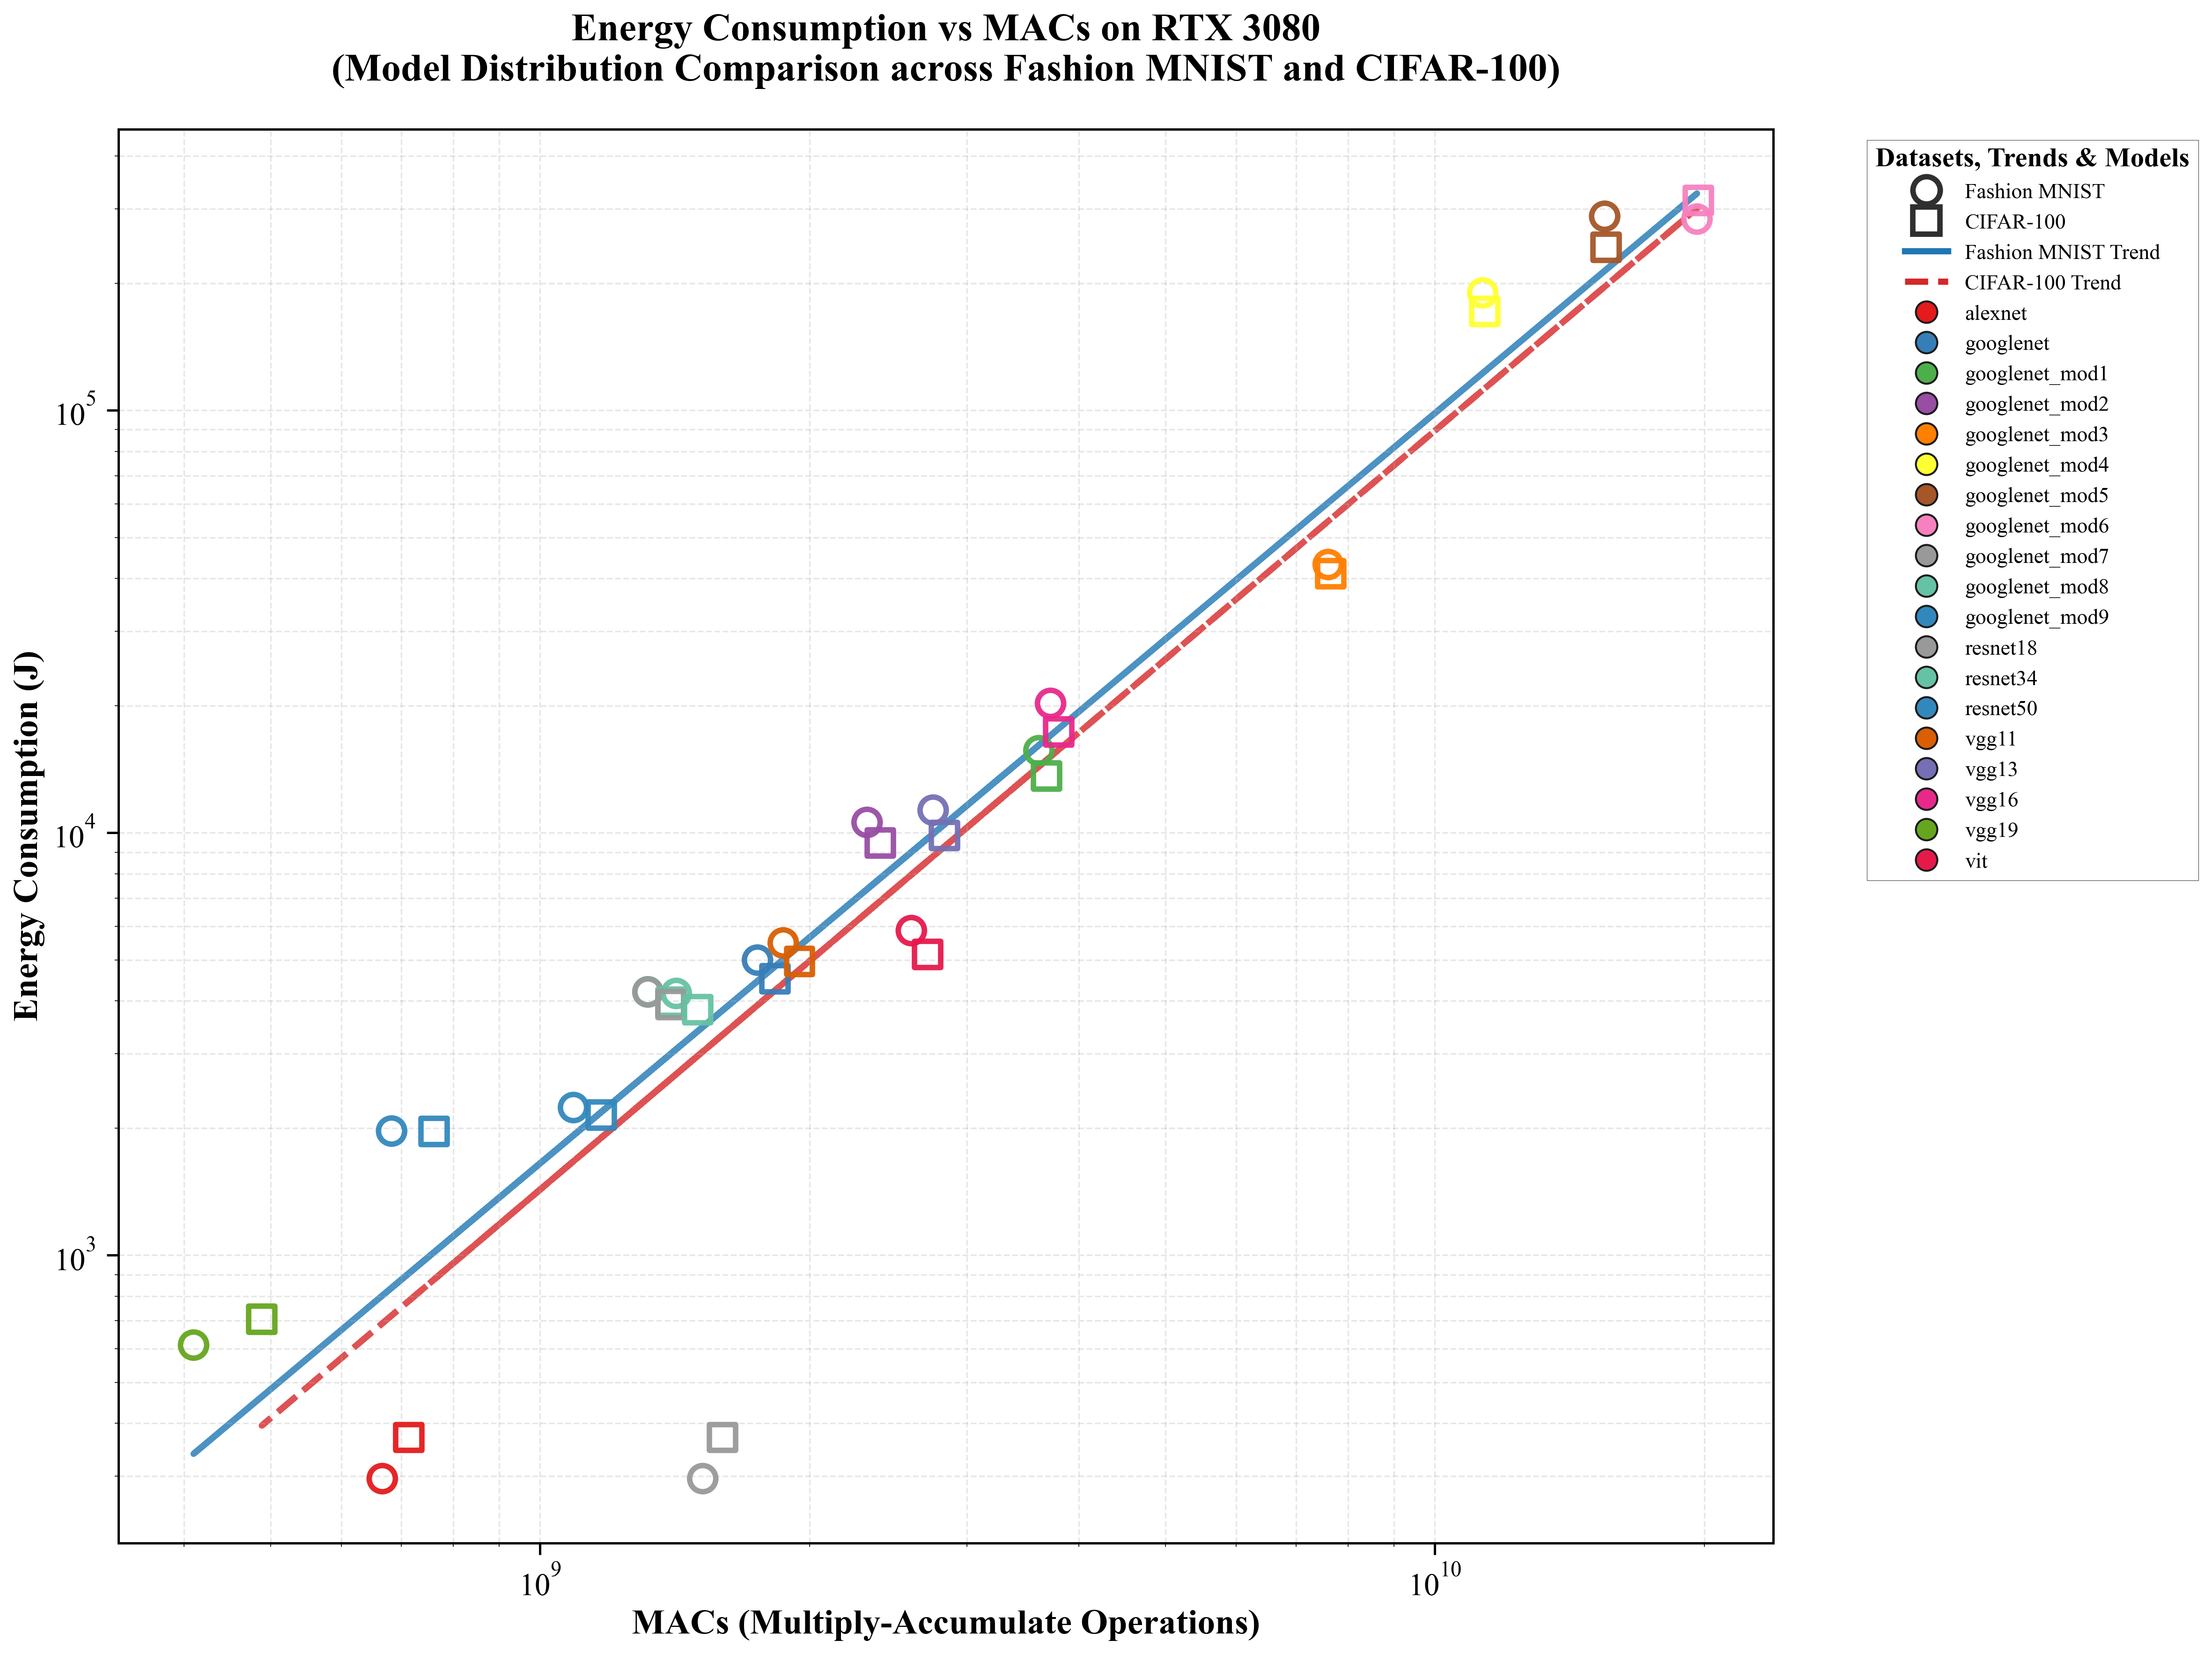


模型分布统计:

Fashion MNIST:
  alexnet        : MACs=6.66e+08, Energy=295.97J
  googlenet      : MACs=1.75e+09, Energy=4995.36J
  googlenet_mod1 : MACs=3.61e+09, Energy=15642.59J
  googlenet_mod2 : MACs=2.32e+09, Energy=10581.74J
  googlenet_mod3 : MACs=7.60e+09, Energy=43143.82J
  googlenet_mod4 : MACs=1.13e+10, Energy=189606.95J
  googlenet_mod5 : MACs=1.55e+10, Energy=287872.59J
  googlenet_mod6 : MACs=1.96e+10, Energy=283542.69J
  googlenet_mod7 : MACs=1.52e+09, Energy=295.97J
  googlenet_mod8 : MACs=1.32e+09, Energy=4203.50J
  googlenet_mod9 : MACs=6.83e+08, Energy=1967.68J
  resnet18       : MACs=1.32e+09, Energy=4198.59J
  resnet34       : MACs=1.42e+09, Energy=4165.54J
  resnet50       : MACs=1.09e+09, Energy=2236.46J
  vgg11          : MACs=1.87e+09, Energy=5485.59J
  vgg13          : MACs=2.75e+09, Energy=11311.69J
  vgg16          : MACs=3.72e+09, Energy=20239.91J
  vgg19          : MACs=4.10e+08, Energy=612.83J
  vit            : MACs=2.60e+09, Energy=5866.94J

CIFAR-100:
  ale

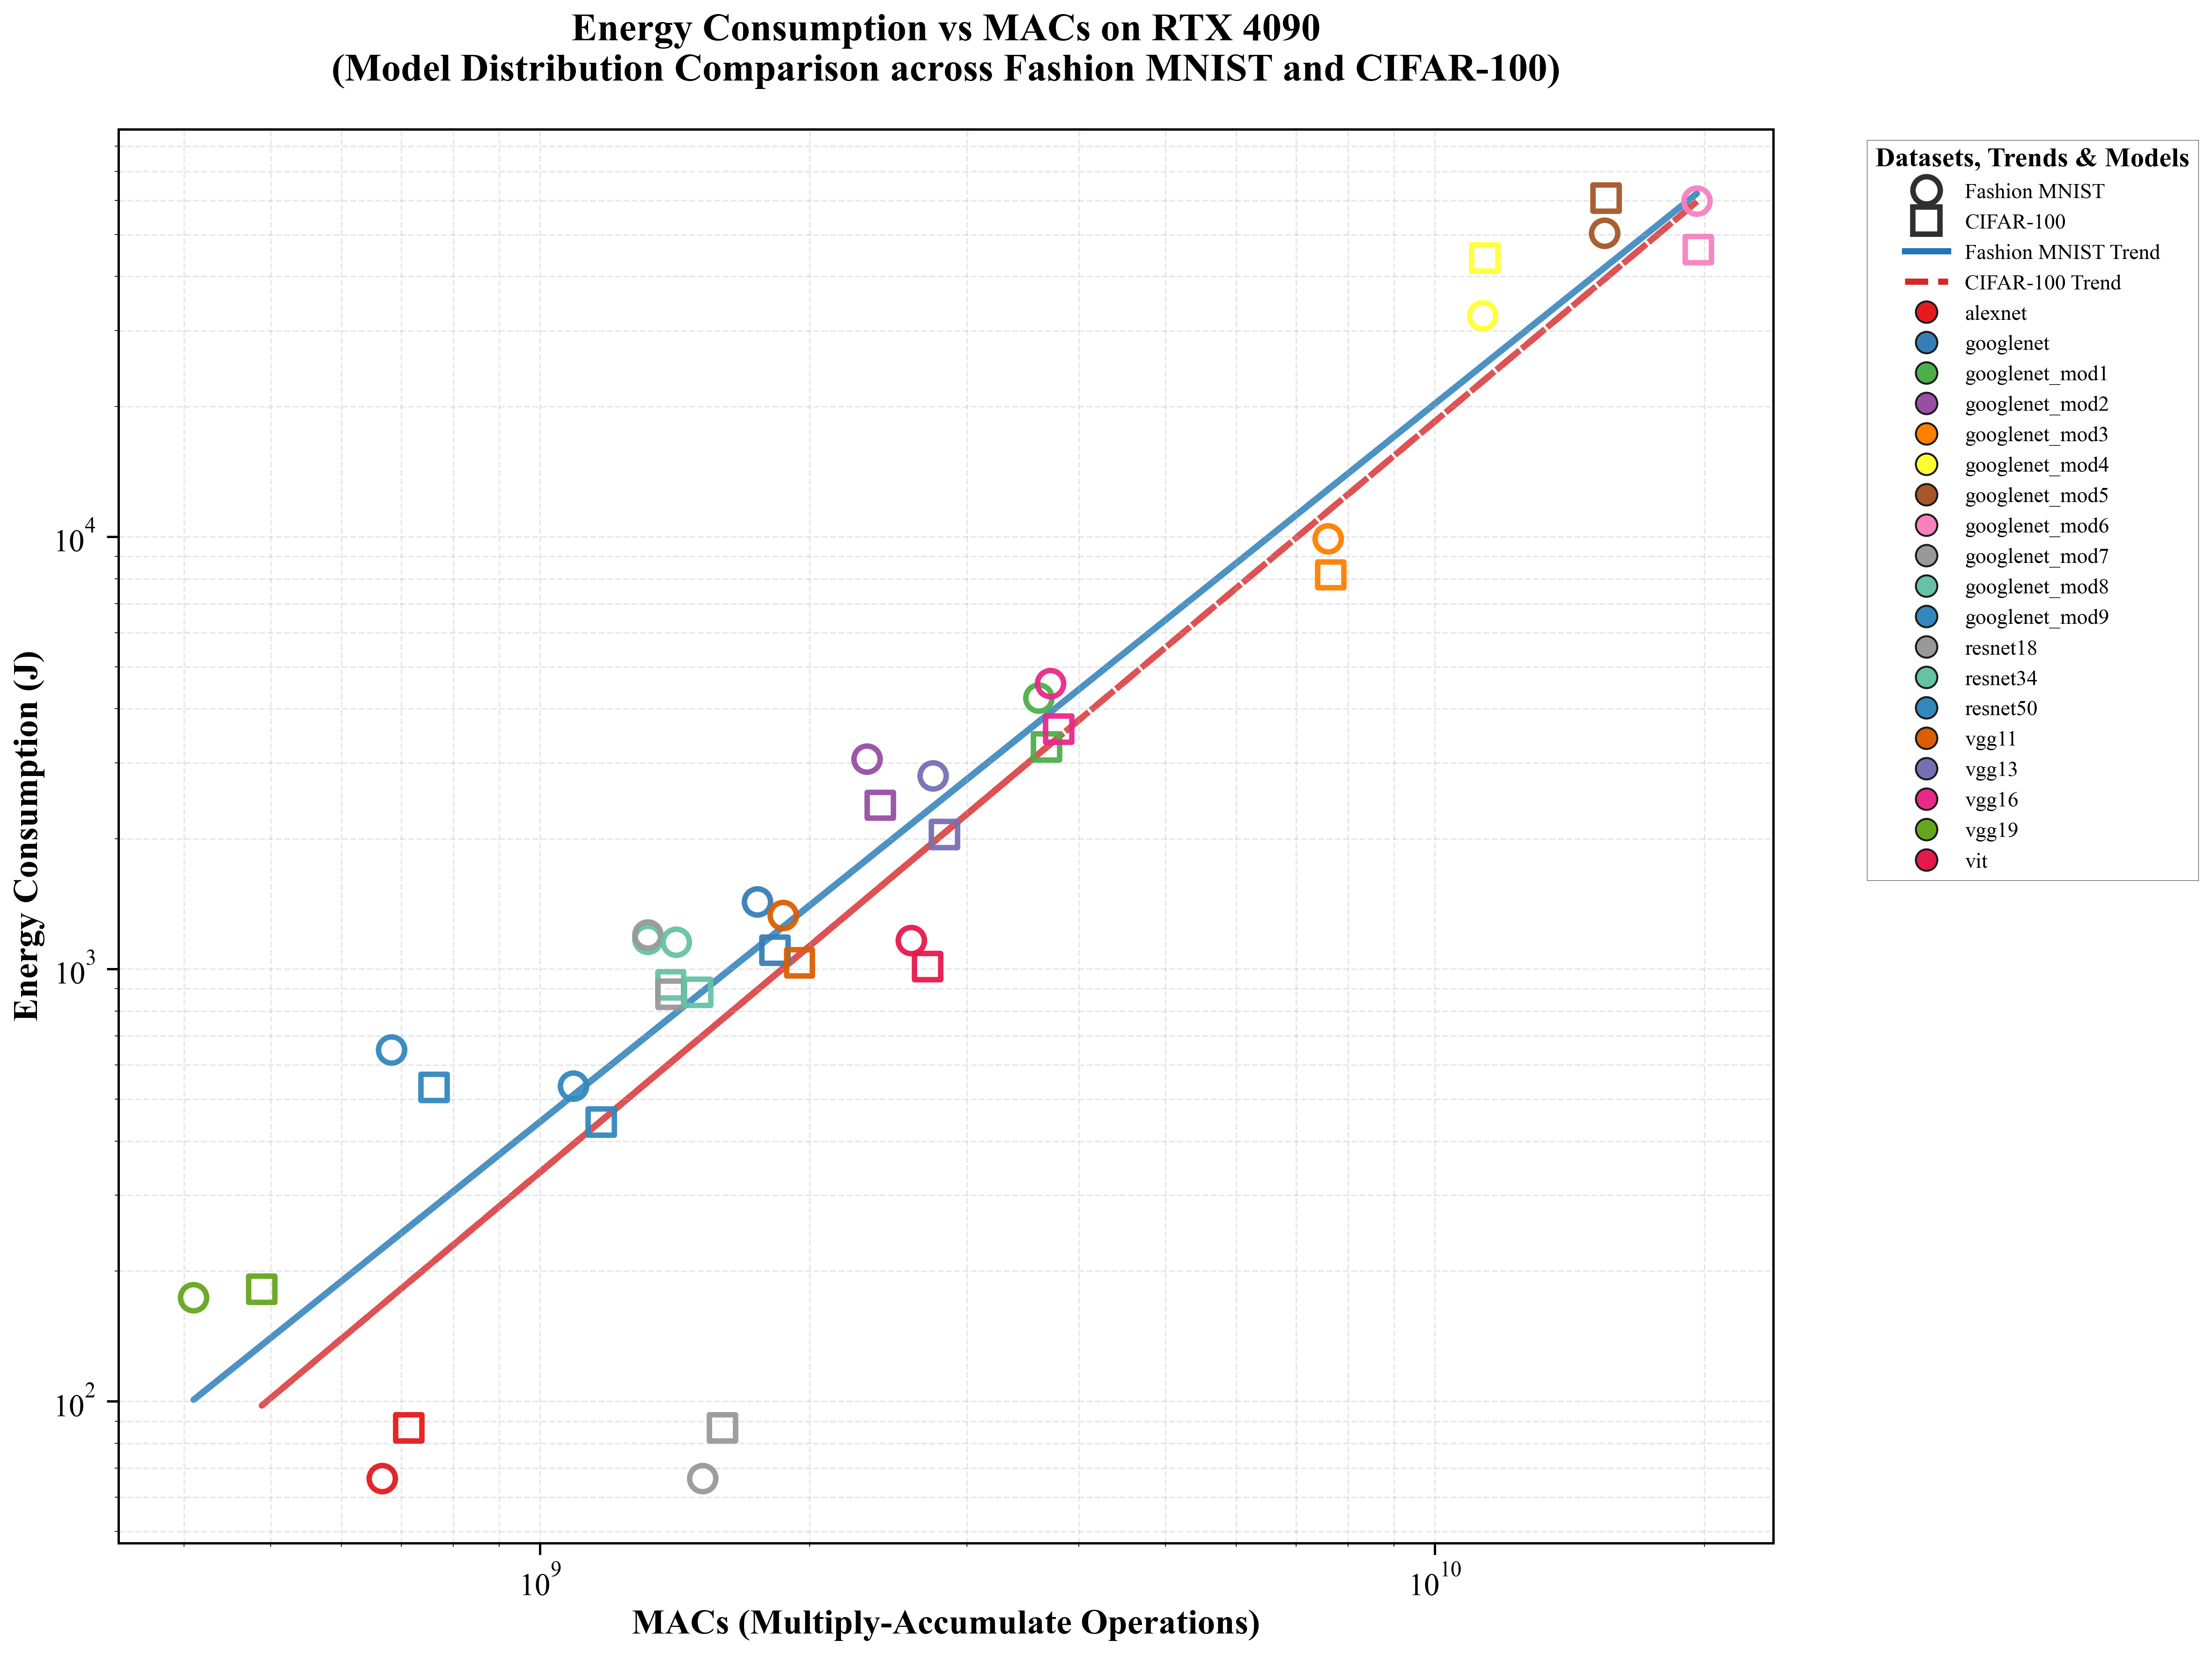


模型分布统计 (RTX 4090):

Fashion MNIST:
  alexnet        : MACs=6.66e+08, Energy=66.24J
  googlenet      : MACs=1.75e+09, Energy=1429.34J
  googlenet_mod1 : MACs=3.61e+09, Energy=4234.08J
  googlenet_mod2 : MACs=2.32e+09, Energy=3058.24J
  googlenet_mod3 : MACs=7.60e+09, Energy=9887.89J
  googlenet_mod4 : MACs=1.13e+10, Energy=32433.91J
  googlenet_mod5 : MACs=1.55e+10, Energy=50345.31J
  googlenet_mod6 : MACs=1.96e+10, Energy=59745.52J
  googlenet_mod7 : MACs=1.52e+09, Energy=66.24J
  googlenet_mod8 : MACs=1.32e+09, Energy=1171.23J
  googlenet_mod9 : MACs=6.83e+08, Energy=649.62J
  resnet18       : MACs=1.32e+09, Energy=1198.62J
  resnet34       : MACs=1.42e+09, Energy=1153.36J
  resnet50       : MACs=1.09e+09, Energy=535.91J
  vgg11          : MACs=1.87e+09, Energy=1329.59J
  vgg13          : MACs=2.75e+09, Energy=2796.82J
  vgg16          : MACs=3.72e+09, Energy=4572.93J
  vgg19          : MACs=4.10e+08, Energy=173.61J
  vit            : MACs=2.60e+09, Energy=1163.51J

CIFAR-100:
  alex

In [88]:
from matplotlib import rcParams
# ================== IEEE 图表样式配置 ==================
plt.rcParams.update({
    'font.family': 'serif',        # IEEE推荐衬线字体
    'font.serif': 'Times New Roman',
    'font.size': 14,               
    'axes.labelsize': 18,          # 坐标轴标签
    'axes.titlesize': 20,          # 标题
    'xtick.labelsize': 16,         
    'ytick.labelsize': 16,         
    'legend.fontsize': 12,         
    'legend.framealpha': 0.8,      
    'axes.linewidth': 1.2,         
    'lines.linewidth': 1.8,        
    'lines.markersize': 9,         
    'xtick.major.size': 6,         
    'xtick.major.width': 1.2,      
    'ytick.major.size': 6,         
    'ytick.major.width': 1.2,     
    'figure.dpi': 300              # 高分辨率
})

# ================== 颜色与模型定义 ==================
model_colors = {
    'alexnet': '#E41A1C',
    'googlenet': '#377EB8',
    'googlenet_mod1': '#4DAF4A',
    'googlenet_mod2': '#984EA3',
    'googlenet_mod3': '#FF7F00',
    'googlenet_mod4': '#FFFF33',
    'googlenet_mod5': '#A65628',
    'googlenet_mod6': '#F781BF',
    'googlenet_mod7': '#999999',
    'googlenet_mod8': '#66C2A5',
    'googlenet_mod9': '#3288BD',
    'resnet18': '#999999',
    'resnet34': '#66C2A5',
    'resnet50': '#3288BD',
    'vgg11': '#D95F02',
    'vgg13': '#7570B3',
    'vgg16': '#E7298A',
    'vgg19': '#66A61E',
    'vit': '#E6194B'
}

macs_models = list(model_colors.keys())[:len(model_macs_fashionmnist)]  # 根据数据长度调整
rcParams['pdf.fonttype'] = 42
rcParams['ps.fonttype'] = 42
# ================== 绘图参数 ==================
datasets = ['Fashion MNIST', 'CIFAR-100']
fig_num = [60000, 50000]
hardware = ['RTX 3080', 'RTX 4090']
markers = {'Fashion MNIST': 'o', 'CIFAR-100': 's'}  # 不同数据集使用不同标记

# ================== RTX 3080 组合绘图函数 ==================
def plot_rtx3080_combined():
    """
    绘制RTX 3080在两个数据集上的组合图表，将所有数据放在一张图中方便比较。
    不同模型使用不同颜色，所有模型信息统一显示在图例中。
    
    Returns:
        None
        
    Complexity:
        Time: O(n log n) where n is number of models
        Space: O(n)
        
    References:
        - IEEE guidelines for visualization best practices
        - Power measurement standards for GPU computing
    """
    fig, ax = plt.subplots(1, 1, figsize=(16, 12))
    
    # RTX 3080 数据
    rtx3080_data = {
        'Fashion MNIST': (model_macs_fashionmnist, energy_consumption_f3080),
        'CIFAR-100': (model_macs_cifar100, energy_consumption_c3080)
    }
    
    # 为每个数据集绘制数据点
    for ds_idx, ds in enumerate(datasets):
        macs_data, energy_data = rtx3080_data[ds]
        
        # 绘制散点 - 空心标记
        for model_idx, model in enumerate(macs_models):
            x_pos = macs_data[model_idx]
            y_pos = energy_data[model_idx]
            
            # 绘制数据点
            ax.scatter(
                x_pos, 
                y_pos,
                facecolors='none',  # 设置为空心
                edgecolors=model_colors[model],  # 边框颜色
                linewidth=2.8,  # 增加边框宽度以提高可见性
                marker=markers[ds],
                s=180,  # 增大标记尺寸以提高可见性
                alpha=0.95,
                zorder=3  # 确保点在标注之上
            )
    
    # 为每个数据集添加趋势线
    for ds_idx, ds in enumerate(datasets):
        macs_data, energy_data = rtx3080_data[ds]
        x = np.array(macs_data)
        y = np.array(energy_data)
        valid_idx = (x > 0) & (y > 0)
        
        if sum(valid_idx) > 1:
            # 对数据进行对数变换后拟合
            coeffs = np.polyfit(np.log10(x[valid_idx]), np.log10(y[valid_idx]), 1)
            trend_line = 10**(coeffs[1]) * x**coeffs[0]
            
            # 计算R²值
            log_x = np.log10(x[valid_idx])
            log_y = np.log10(y[valid_idx])
            log_y_pred = coeffs[0] * log_x + coeffs[1]
            ss_total = np.sum((log_y - np.mean(log_y))**2)
            ss_residual = np.sum((log_y - log_y_pred)**2)
            r_squared = 1 - (ss_residual / ss_total)
            
            # 计算MAPE
            mape = np.mean(np.abs((y[valid_idx] - 10**log_y_pred) / y[valid_idx])) * 100
            
            # 使用不同的线型区分数据集
            linestyle = '-' if ds == 'Fashion MNIST' else '--'
            ax.plot(x, trend_line, 
                   linestyle=linestyle,
                   color='#1f77b4' if ds == 'Fashion MNIST' else '#d62728',  # IEEE友好的蓝色和红色
                   linewidth=3.2,
                   alpha=0.8,
                   zorder=1,  # 趋势线在最底层
                   label=f'{ds} Trend (slope: {coeffs[0]:.2f}, R²: {r_squared:.3f}, MAPE: {mape:.1f}%)')
    
    # 坐标轴设置
    ax.set_xscale('log')
    ax.set_yscale('log')
    ax.set_xlabel('MACs (Multiply-Accumulate Operations)', fontweight='bold', fontsize=18)
    ax.set_ylabel('Energy Consumption (J)', fontweight='bold', fontsize=18)
    ax.set_title('Energy Consumption vs MACs on RTX 3080\n(Model Distribution Comparison across Fashion MNIST and CIFAR-100)', 
                 pad=25, fontweight='bold', fontsize=20)
    ax.grid(True, which='both', linestyle='--', alpha=0.3, zorder=0)
    
    # 创建图例元素
    legend_elements = []
    
    # 添加数据集标记说明 - 空心标记，使用更深的灰色
    legend_elements.extend([
        plt.Line2D([0], [0], marker='o', color='w', markerfacecolor='none', 
                   markersize=14, label='Fashion MNIST', markeredgecolor='#2f2f2f', markeredgewidth=2.8),
        plt.Line2D([0], [0], marker='s', color='w', markerfacecolor='none', 
                   markersize=14, label='CIFAR-100', markeredgecolor='#2f2f2f', markeredgewidth=2.8),
    ])
    
    # 添加趋势线说明，使用更符合IEEE标准的颜色
    legend_elements.extend([
        plt.Line2D([0], [0], color='#1f77b4', linewidth=3.2, label='Fashion MNIST Trend'),
        plt.Line2D([0], [0], color='#d62728', linewidth=3.2, linestyle='--', label='CIFAR-100 Trend')
    ])
    
    # 添加模型颜色说明，边框更清晰
    for model in macs_models:
        legend_elements.append(
            plt.Line2D([0], [0], marker='o', color='w', markerfacecolor=model_colors[model],
                      markersize=11, label=f'{model}', markeredgecolor='#1a1a1a', markeredgewidth=1.0)
        )
    
    # 图例设置 - 放置在图外右侧，调整样式以符合IEEE标准
    legend = ax.legend(handles=legend_elements, 
                      bbox_to_anchor=(1.05, 1), 
                      loc='upper left', 
                      frameon=True, 
                      framealpha=0.98,
                      facecolor='white',
                      edgecolor='#2f2f2f',
                      title='Datasets, Trends & Models',
                      title_fontsize=14,
                      fontsize=11,
                      fancybox=False,  # IEEE推荐使用直角边框
                      shadow=False,    # IEEE通常不使用阴影
                      ncol=1)
    
    # 设置图例标题样式
    legend.get_title().set_fontweight('bold')
    
    # 保存输出
    plt.tight_layout()
    filename = "RTX_3080_combined_comparison_with_legend"
    plt.savefig(f"{filename}.pdf", bbox_inches='tight', dpi=300, facecolor='white')
    plt.savefig(f"{filename}.png", bbox_inches='tight', dpi=300, facecolor='white')
    plt.show()
    
    # 打印模型分布统计信息
    print("\n模型分布统计:")
    print("=" * 50)
    for ds in datasets:
        macs_data, energy_data = rtx3080_data[ds]
        print(f"\n{ds}:")
        for i, model in enumerate(macs_models):
            print(f"  {model:15s}: MACs={macs_data[i]:.2e}, Energy={energy_data[i]:.2f}J")

# ================== RTX 4090 组合绘图函数 ==================
def plot_rtx4090_combined():
    """
    绘制RTX 4090在两个数据集上的组合图表，采用与RTX 3080相同的可视化标准。
    
    Returns:
        None
        
    Complexity:
        Time: O(n log n) where n is number of models
        Space: O(n)
        
    References:
        IEEE Guidelines for Technical Illustrations and Color Standards
    """
    # 创建单个图形，设置为符合IEEE标准的尺寸比例
    fig, ax = plt.subplots(figsize=(16, 12))
    
    # RTX 4090 数据映射
    rtx4090_data = {
        'Fashion MNIST': (model_macs_fashionmnist, energy_consumption_f4090),
        'CIFAR-100': (model_macs_cifar100, energy_consumption_c4090)
    }
    
    # 为每个数据集绘制数据点
    for ds_idx, ds in enumerate(datasets):
        macs_data, energy_data = rtx4090_data[ds]
        
        # 绘制散点 - 空心标记
        for model_idx, model in enumerate(macs_models):
            x_pos = macs_data[model_idx]
            y_pos = energy_data[model_idx]
            
            # 绘制数据点
            ax.scatter(
                x_pos, 
                y_pos,
                facecolors='none',  # 设置为空心
                edgecolors=model_colors[model],  # 边框颜色
                linewidth=2.8,  # 增加边框宽度以提高可见性
                marker=markers[ds],
                s=180,  # 增大标记尺寸以提高可见性
                alpha=0.95,
                zorder=3  # 确保点在标注之上
            )
    
    # 为每个数据集添加趋势线
    for ds_idx, ds in enumerate(datasets):
        macs_data, energy_data = rtx4090_data[ds]
        x = np.array(macs_data)
        y = np.array(energy_data)
        valid_idx = (x > 0) & (y > 0)
        
        if sum(valid_idx) > 1:
            # 对数据进行对数变换后拟合
            coeffs = np.polyfit(np.log10(x[valid_idx]), np.log10(y[valid_idx]), 1)
            trend_line = 10**(coeffs[1]) * x**coeffs[0]
            
            # 计算R²值
            log_x = np.log10(x[valid_idx])
            log_y = np.log10(y[valid_idx])
            log_y_pred = coeffs[0] * log_x + coeffs[1]
            ss_total = np.sum((log_y - np.mean(log_y))**2)
            ss_residual = np.sum((log_y - log_y_pred)**2)
            r_squared = 1 - (ss_residual / ss_total)
            
            # 计算MAPE
            mape = np.mean(np.abs((y[valid_idx] - 10**log_y_pred) / y[valid_idx])) * 100
            
            # 使用不同的线型区分数据集
            linestyle = '-' if ds == 'Fashion MNIST' else '--'
            ax.plot(x, trend_line, 
                   linestyle=linestyle,
                   color='#1f77b4' if ds == 'Fashion MNIST' else '#d62728',  # IEEE友好的蓝色和红色
                   linewidth=3.2,
                   alpha=0.8,
                   zorder=1,  # 趋势线在最底层
                   label=f'{ds} Trend (slope: {coeffs[0]:.2f}, R²: {r_squared:.3f}, MAPE: {mape:.1f}%)')
    
    # 坐标轴设置
    ax.set_xscale('log')
    ax.set_yscale('log')
    ax.set_xlabel('MACs (Multiply-Accumulate Operations)', fontweight='bold', fontsize=18)
    ax.set_ylabel('Energy Consumption (J)', fontweight='bold', fontsize=18)
    ax.set_title('Energy Consumption vs MACs on RTX 4090\n(Model Distribution Comparison across Fashion MNIST and CIFAR-100)', 
                 pad=25, fontweight='bold', fontsize=20)
    ax.grid(True, which='both', linestyle='--', alpha=0.3, zorder=0)
    
    # 创建图例元素
    legend_elements = []
    
    # 添加数据集标记说明 - 空心标记，使用更深的灰色
    legend_elements.extend([
        plt.Line2D([0], [0], marker='o', color='w', markerfacecolor='none', 
                   markersize=14, label='Fashion MNIST', markeredgecolor='#2f2f2f', markeredgewidth=2.8),
        plt.Line2D([0], [0], marker='s', color='w', markerfacecolor='none', 
                   markersize=14, label='CIFAR-100', markeredgecolor='#2f2f2f', markeredgewidth=2.8),
    ])
    
    # 添加趋势线说明，使用更符合IEEE标准的颜色
    legend_elements.extend([
        plt.Line2D([0], [0], color='#1f77b4', linewidth=3.2, label='Fashion MNIST Trend'),
        plt.Line2D([0], [0], color='#d62728', linewidth=3.2, linestyle='--', label='CIFAR-100 Trend')
    ])
    
    # 添加模型颜色说明，边框更清晰
    for model in macs_models:
        legend_elements.append(
            plt.Line2D([0], [0], marker='o', color='w', markerfacecolor=model_colors[model],
                      markersize=11, label=f'{model}', markeredgecolor='#1a1a1a', markeredgewidth=1.0)
        )
    
    # 图例设置 - 放置在图外右侧，调整样式以符合IEEE标准
    legend = ax.legend(handles=legend_elements, 
                      bbox_to_anchor=(1.05, 1), 
                      loc='upper left', 
                      frameon=True, 
                      framealpha=0.98,
                      facecolor='white',
                      edgecolor='#2f2f2f',
                      title='Datasets, Trends & Models',
                      title_fontsize=14,
                      fontsize=11,
                      fancybox=False,  # IEEE推荐使用直角边框
                      shadow=False,    # IEEE通常不使用阴影
                      ncol=1)
    
    # 设置图例标题样式
    legend.get_title().set_fontweight('bold')
    
    # 保存输出
    plt.tight_layout()
    filename = "RTX_4090_combined_comparison_with_legend"
    plt.savefig(f"{filename}.pdf", bbox_inches='tight', dpi=300, facecolor='white')
    plt.savefig(f"{filename}.png", bbox_inches='tight', dpi=300, facecolor='white')
    plt.show()
    
    # 打印模型分布统计信息
    print("\n模型分布统计 (RTX 4090):")
    print("=" * 50)
    for ds in datasets:
        macs_data, energy_data = rtx4090_data[ds]
        print(f"\n{ds}:")
        for i, model in enumerate(macs_models):
            print(f"  {model:15s}: MACs={macs_data[i]:.2e}, Energy={energy_data[i]:.2f}J")

# ================== 生成所有图表 ==================
if __name__ == "__main__":
    # 数据映射
    data_mapping = {
        'RTX 3080': {
            'Fashion MNIST': (model_macs_fashionmnist, energy_consumption_f3080),
            'CIFAR-100': (model_macs_cifar100, energy_consumption_c3080)
        },
        'RTX 4090': {
            'Fashion MNIST': (model_macs_fashionmnist, energy_consumption_f4090),
            'CIFAR-100': (model_macs_cifar100, energy_consumption_c4090)
        }
    }
    
    print("Generating combined plots for each hardware...")
    
    # 生成RTX 3080组合图表
    print("Creating combined plot for RTX 3080")
    plot_rtx3080_combined()
    
    # 生成RTX 4090组合图表
    print("Creating combined plot for RTX 4090")
    plot_rtx4090_combined()
    
    # 打印统计信息
    for hw in hardware:
        for ds in datasets:
            macs, energy = data_mapping[hw][ds]
            x = np.array(macs)
            y = np.array(energy)
            valid_idx = (x > 0) & (y > 0)
            
            if sum(valid_idx) > 1:
                coeffs = np.polyfit(np.log10(x[valid_idx]), np.log10(y[valid_idx]), 1)
                print(f"Log-log slope for {hw} {ds}: {coeffs[0]:.3f}")
                
                coeffs_linear = np.polyfit(x[valid_idx], y[valid_idx], 1)
                ds_idx = datasets.index(ds)
                fig_num_ds = fig_num[ds_idx]
                print(f"Linear slope (normalized) for {hw} {ds}: {coeffs_linear[0]/fig_num_ds:.6f}")